# Digit Detection Model

This notebook can be used to train a CNN using the `images-augmented` images created with the `Image-Data-Augmentation.ipynb` notebook (or actually any other dataset).

In [1]:
from pathlib import Path

ROOT_DIR = Path().absolute().parent 
TEST_IMAGES_BASE = ROOT_DIR / "images-augmened"

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import  train_test_split
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
DATASET_PATH = TEST_IMAGES_BASE / "dataset.csv"

In [10]:
df = pd.read_csv(DATASET_PATH, index_col=0)
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      4      10       9      10       8       9      33      60      67   
1      3     119     124     125     125     129     131     131     132   
2      9       5      12      20      24      28      35      49      60   
3      9       9       8      43      57      68      76      73      70   
4      3     135     137     137     137     149     150     151     155   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0      68  ...        92        90        87        83        78        75   
1     132  ...       175       176       178       182       182       179   
2      68  ...        88       114       128       129       125       131   
3      75  ...       167       167       166       167       166       166   
4     161  ...       113       151       178       184       187       190   

   pixel780  pixel781  pixel782  pixel783  
0        76        73        71        73  
1       173       170       171       170  
2       134       131       129       130  
3       165       165       165       165  
4       189       191       195       199  

[5 rows x 785 columns]

In [11]:
y_train = df['label']
X_train = df.drop(labels=['label'], axis=1)

In [37]:
df.shape

(152961, 785)

## Split train and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4)

In [13]:
X_train.shape, X_test.shape

((91776, 784), (61185, 784))

In [14]:
y_train.shape, y_test.shape

((91776,), (61185,))

## Normalize Pixel values

In [15]:
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)

X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

X_train.shape, X_test.shape

((91776, 28, 28, 1), (61185, 28, 28, 1))

## Data distribution

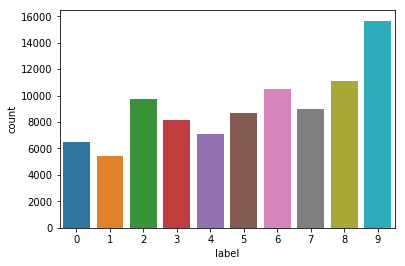

In [16]:
g = sns.countplot(y_train)

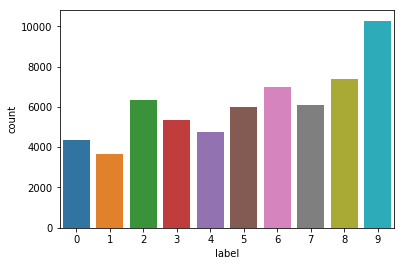

In [17]:
g = sns.countplot(y_test)

## One-Hot Encode train data

In [18]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(91776, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## One-Hot Encode test data

In [20]:
y_test = to_categorical(y_test, num_classes=10)
y_test.shape

(61185, 10)

In [21]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Split test to test and validation

In [22]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [23]:
X_test.shape, X_val.shape

((30592, 28, 28, 1), (30593, 28, 28, 1))

In [24]:
y_test.shape, y_val.shape

((30592, 10), (30593, 10))

## Build the model

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 91776 samples, validate on 30593 samples
Epoch 1/20
 - 105s - loss: 0.8202 - acc: 0.7177 - val_loss: 0.0722 - val_acc: 0.9835
Epoch 2/20
 - 104s - loss: 0.1192 - acc: 0.9645 - val_loss: 0.0214 - val_acc: 0.9956
Epoch 3/20
 - 104s - loss: 0.0547 - acc: 0.9848 - val_loss: 0.0116 - val_acc: 0.9979
Epoch 4/20
 - 104s - loss: 0.0364 - acc: 0.9897 - val_loss: 0.0084 - val_acc: 0.9982
Epoch 5/20
 - 107s - loss: 0.0293 - acc: 0.9921 - val_loss: 0.0053 - val_acc: 0.9986
Epoch 6/20
 - 113s - loss: 0.0249 - acc: 0.9933 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 7/20
 - 112s - loss: 0.0230 - acc: 0.9940 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 8/20
 - 112s - loss: 0.0247 - acc: 0.9938 - val_loss: 0.0041 - val_acc: 0.9986
Epoch 9/20
 - 106s - loss: 0.0239 - acc: 0.9943 - val_loss: 0.0030 - val_acc: 0.9988
Epoch 10/20
 - 76s - loss: 0.0248 - acc: 0.9940 - val_loss: 0.0030 - val_acc: 0.9987
Epoch 11/20
 - 76s - loss: 0.0258 - acc: 0.9939 - va

## Training Loss and Acc

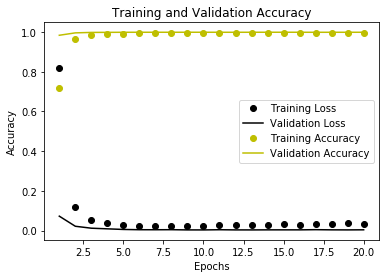

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, 21)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


## Evaluate

In [29]:
evaluation = model.evaluate(X_test, y_test)
print(evaluation)

30592/30592 [==============================] - 6s 192us/step
[0.003942353200746575, 0.9984309623430963]


## Predictions

In [30]:
import random
import time

BOW_IMAGES = list(TEST_IMAGES_BASE.glob("*bow*"))
WOB_IMAGES = list(TEST_IMAGES_BASE.glob("*wob*"))

random.shuffle(BOW_IMAGES)
random.shuffle(WOB_IMAGES)

RANDOM_BOW_IMAGES = BOW_IMAGES[:5]
RANDOM_WOB_IMAGES = WOB_IMAGES[:5]

In:  0.03644871711730957


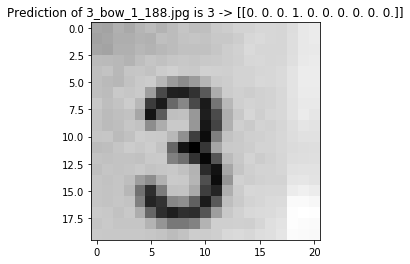

In:  0.0014259815216064453


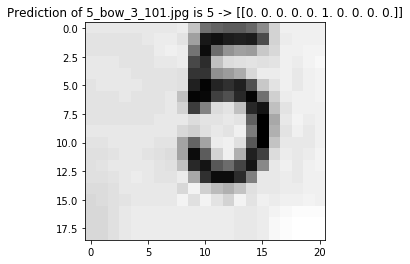

In:  0.0017213821411132812


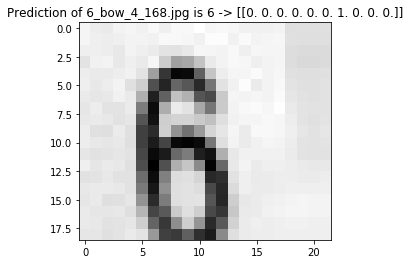

In:  0.001882314682006836


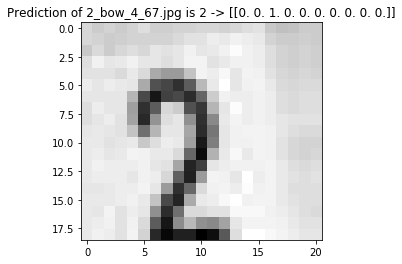

In:  0.0024449825286865234


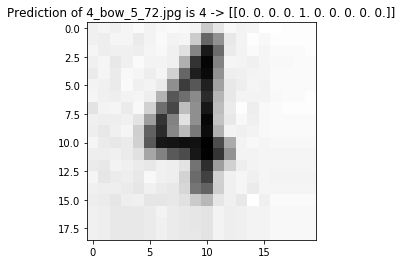

In:  0.0028319358825683594


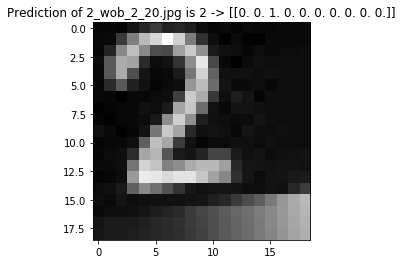

In:  0.0028786659240722656


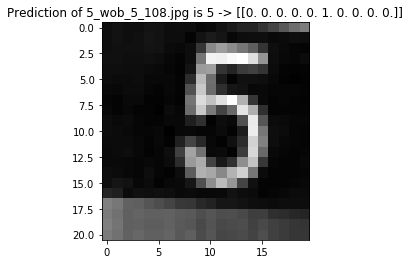

In:  0.0014705657958984375


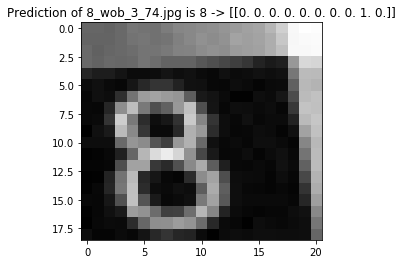

In:  0.0017185211181640625


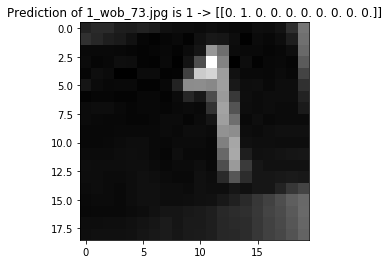

In:  0.0013265609741210938


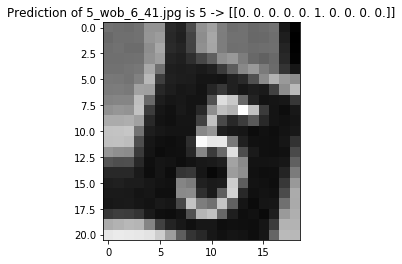

In [31]:
for random_bow_image in RANDOM_BOW_IMAGES + RANDOM_WOB_IMAGES:
    image = cv2.imread(str(random_bow_image), 0)
    vectorized_image = cv2.resize(image, (28, 28)).reshape(1, 28, 28, 1)
    
    starttime = time.time()
    predictions = model.predict(vectorized_image)
    prediction = np.argmax(predictions)
    print("In: ", time.time() - starttime)
    
    plt.title("Prediction of {} is {} -> {}".format(random_bow_image.name, prediction, predictions))
    plt.imshow(image, cmap="gray")
    plt.show()

## Save Model

In [32]:
model.save(str(ROOT_DIR / "hns" / "models" / "numbers.h5"))

## Feed garbage

in 0.0041158199310302734


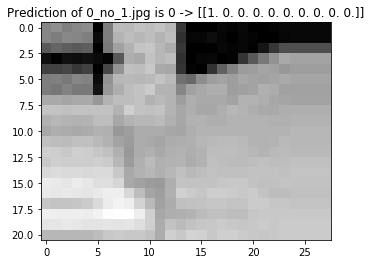

in 0.0027053356170654297


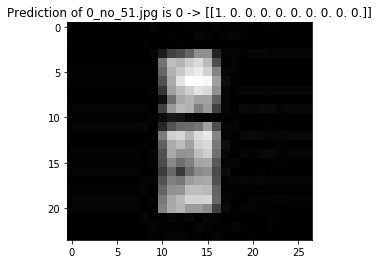

in 0.002378225326538086


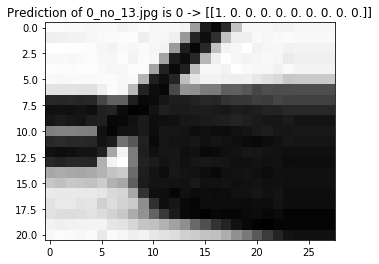

in 0.002774477005004883


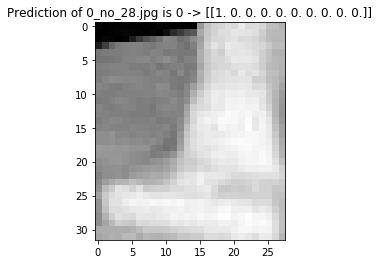

in 0.002794981002807617


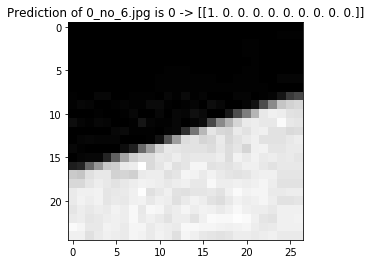

in 0.002799510955810547


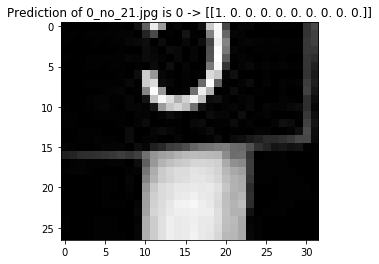

in 0.002550840377807617


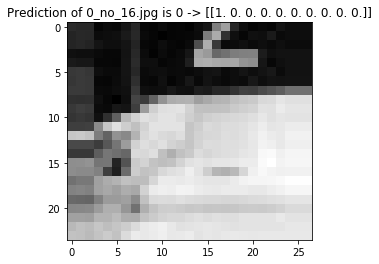

in 0.0074999332427978516


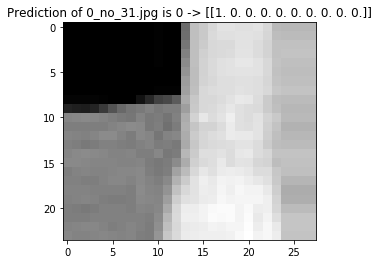

in 0.0023126602172851562


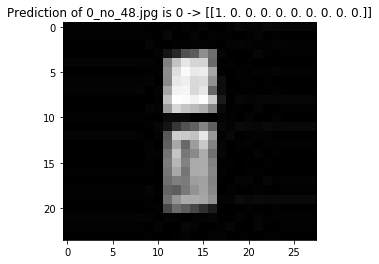

in 0.0033109188079833984


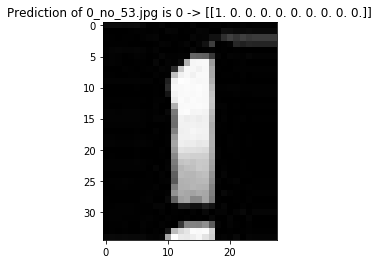

in 0.0059282779693603516


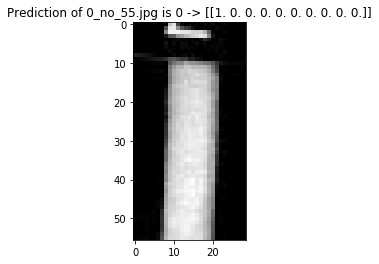

in 0.005901336669921875


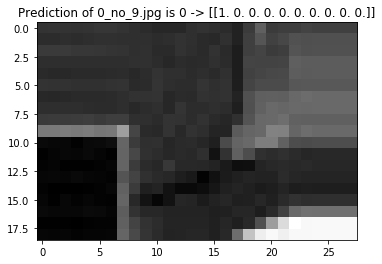

in 0.005674600601196289


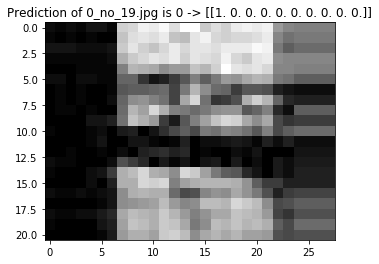

in 0.0047223567962646484


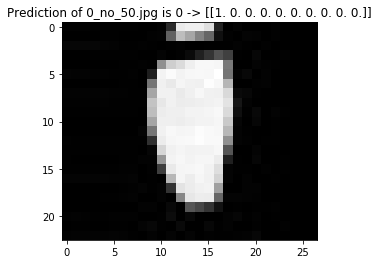

in 0.0015959739685058594


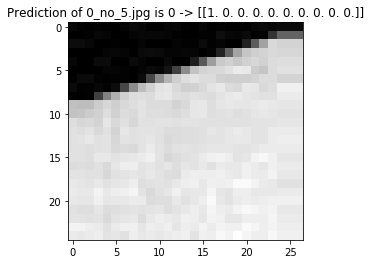

in 0.005574226379394531


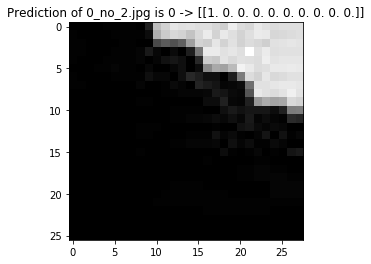

in 0.00606846809387207


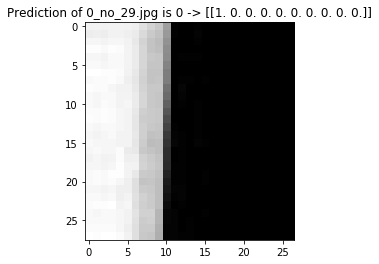

in 0.0023844242095947266


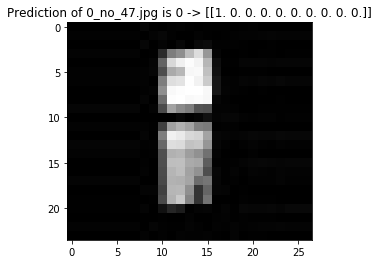

in 0.002397775650024414


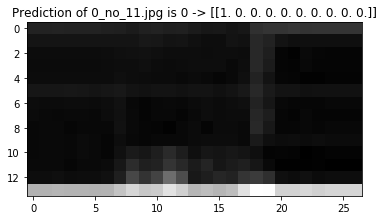

in 0.0029785633087158203


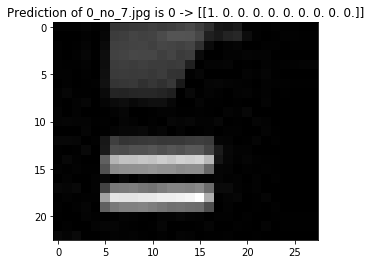

in 0.0029730796813964844


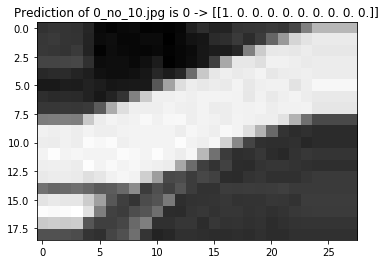

in 0.007863044738769531


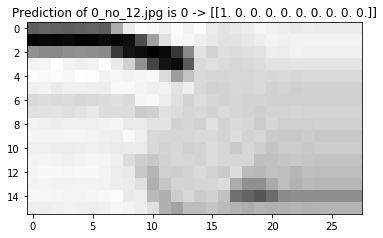

in 0.004483222961425781


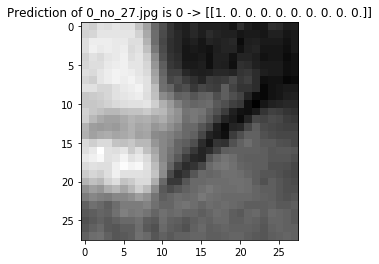

in 0.003188610076904297


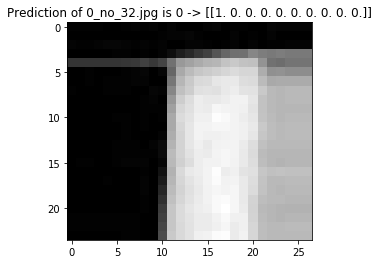

in 0.0026085376739501953


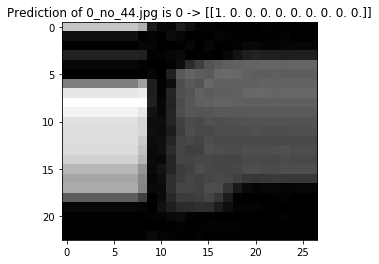

in 0.005734682083129883


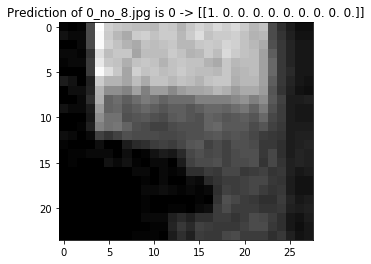

in 0.0020024776458740234


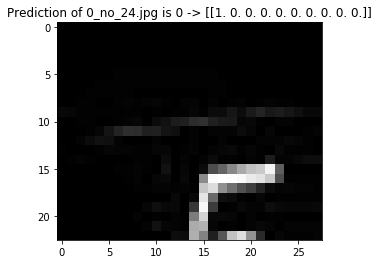

in 0.0020842552185058594


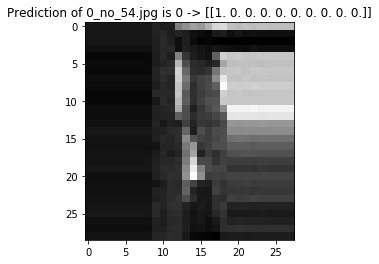

in 0.0054798126220703125


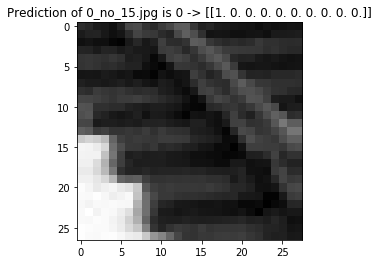

in 0.0021295547485351562


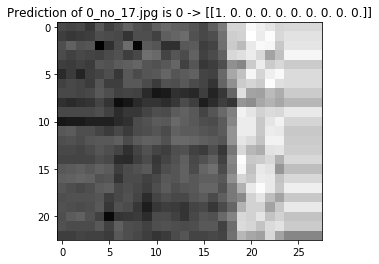

in 0.0013346672058105469


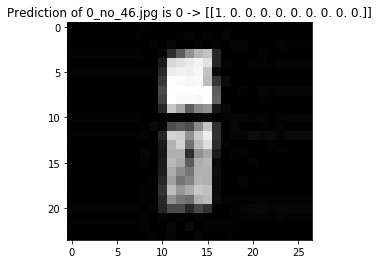

in 0.0015871524810791016


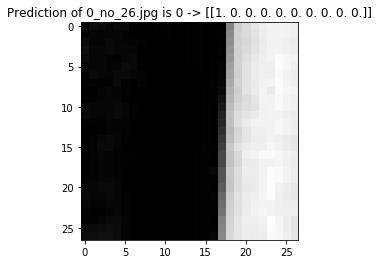

in 0.004895687103271484


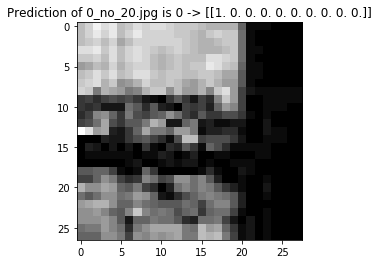

in 0.005667924880981445


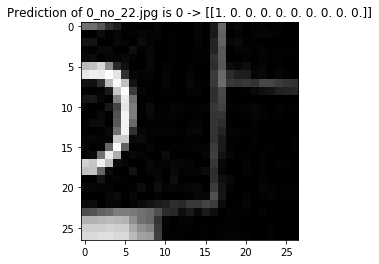

in 0.0014362335205078125


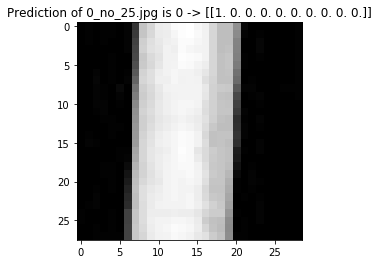

in 0.0023260116577148438


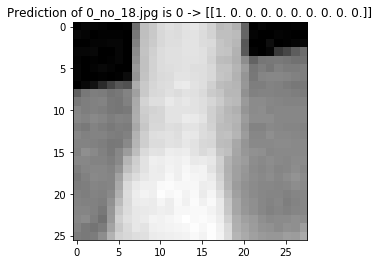

in 0.001644134521484375


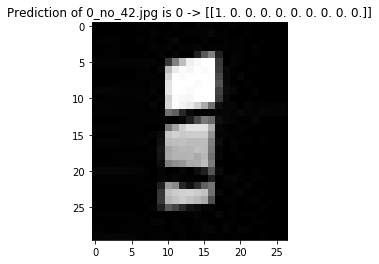

in 0.0033762454986572266


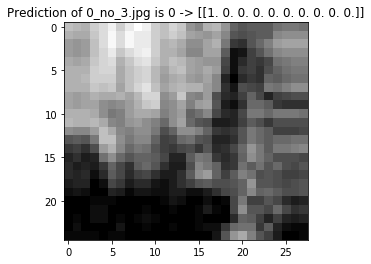

in 0.00165557861328125


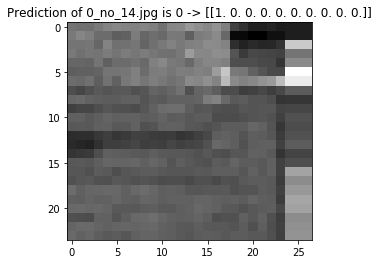

in 0.0016901493072509766


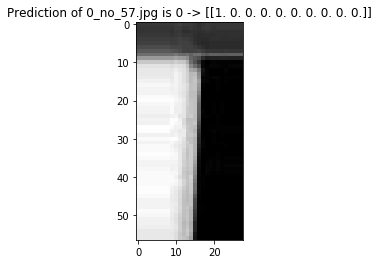

in 0.0019524097442626953


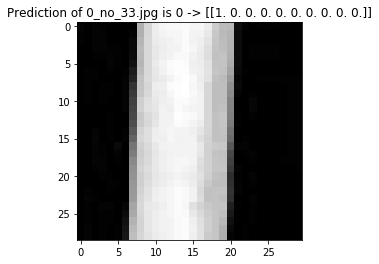

in 0.002023935317993164


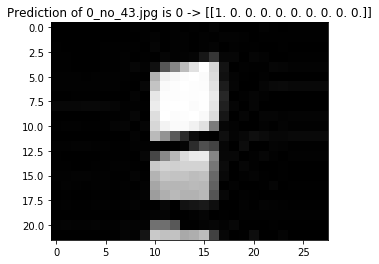

in 0.0020270347595214844


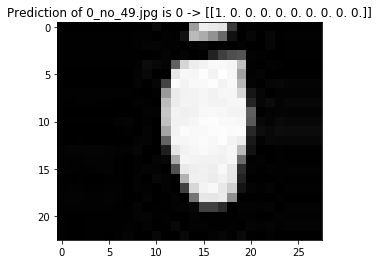

in 0.0045168399810791016


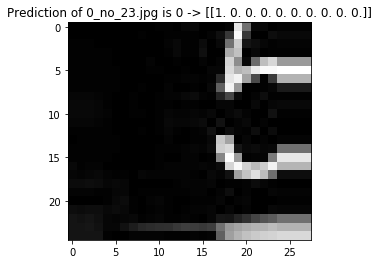

in 0.0019292831420898438


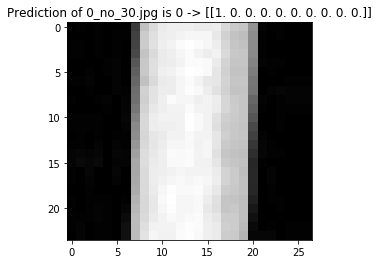

in 0.0038704872131347656


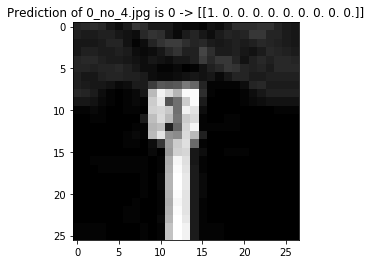

In [33]:
GARBAGE_IMAGES = TEST_IMAGES_BASE.parent / "labeled_numbers"

for garbage_image_path in GARBAGE_IMAGES.glob("*_no_*.jpg"):
    image = cv2.imread(str(garbage_image_path), 0)
    vectorized_image = cv2.resize(image, (28, 28)).reshape(1, 28, 28, 1)
    
    starttime = time.time()
    predictions = model.predict(vectorized_image)
    prediction = np.argmax(predictions)
    
    print("in", time.time() - starttime)
    
    plt.title("Prediction of {} is {} -> {}".format(garbage_image_path.name, prediction, predictions))
    plt.imshow(image, cmap="gray")
    plt.show()

In:  0.001374959945678711


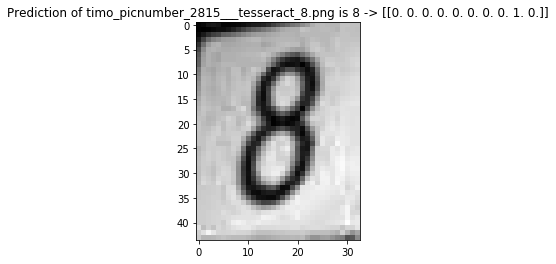

In:  0.0017998218536376953


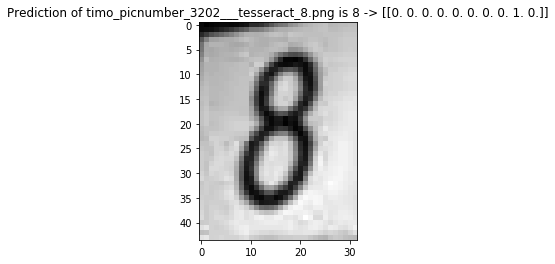

In:  0.001790761947631836


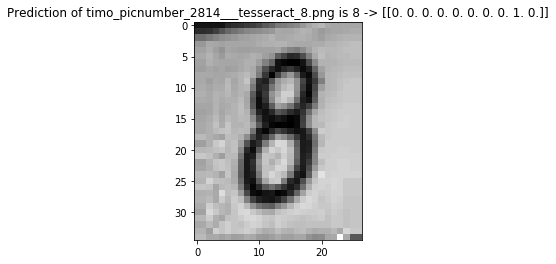

In:  0.0016169548034667969


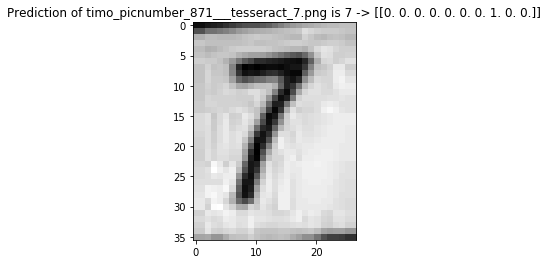

In:  0.001932382583618164


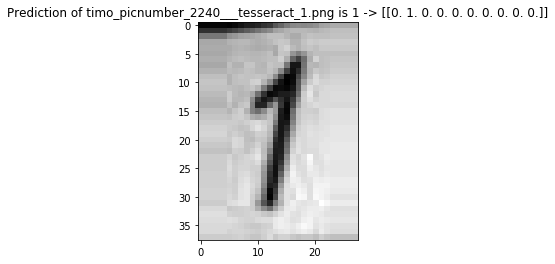

In:  0.002149343490600586


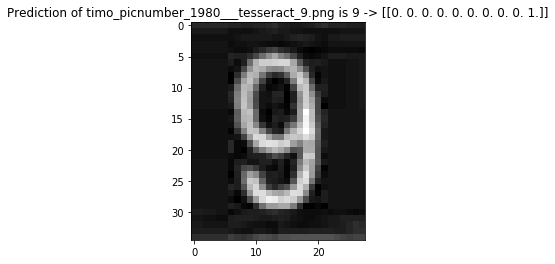

In:  0.0018510818481445312


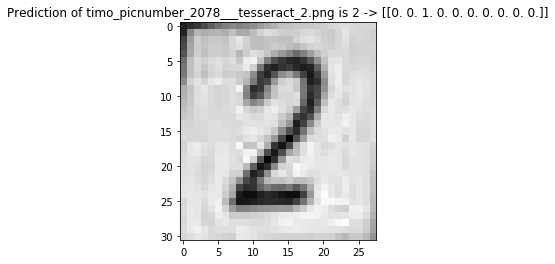

In:  0.0022208690643310547


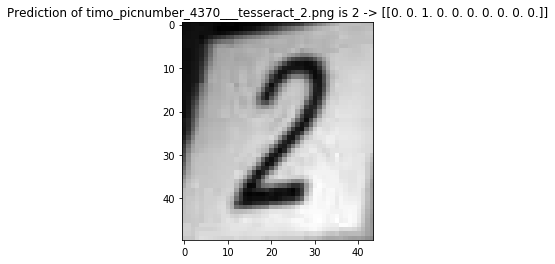

In:  0.0015017986297607422


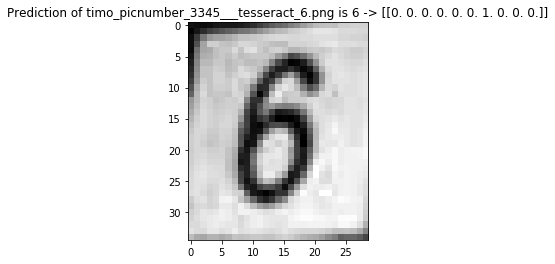

In:  0.002183675765991211


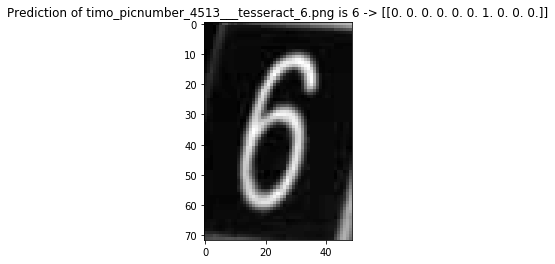

In:  0.0016508102416992188


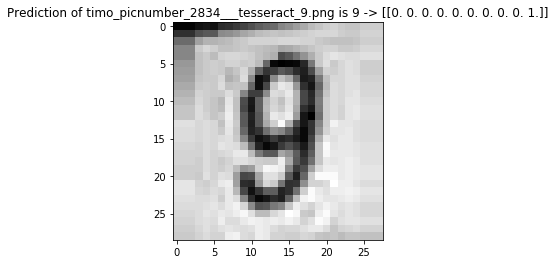

In:  0.0014243125915527344


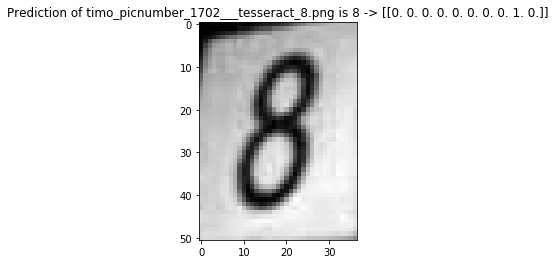

In:  0.0025484561920166016


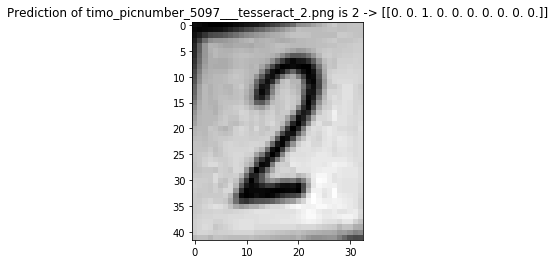

In:  0.003237485885620117


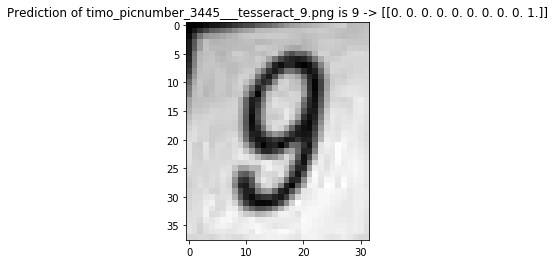

In:  0.001971006393432617


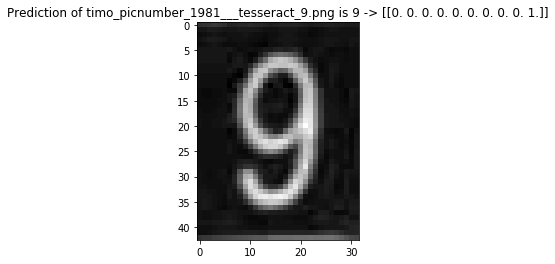

In:  0.002010822296142578


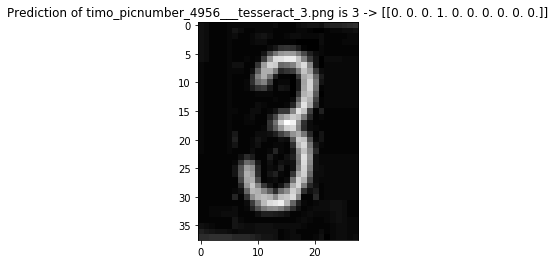

In:  0.002058267593383789


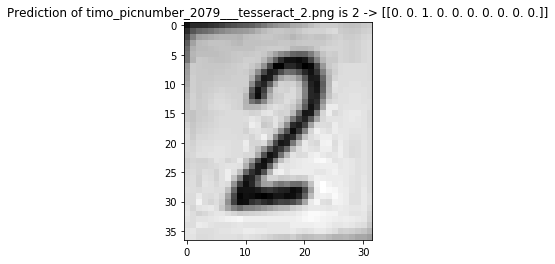

In:  0.006258487701416016


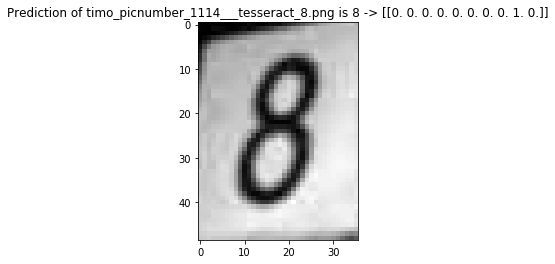

In:  0.0015192031860351562


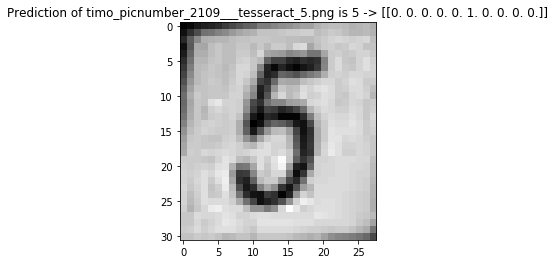

In:  0.0013899803161621094


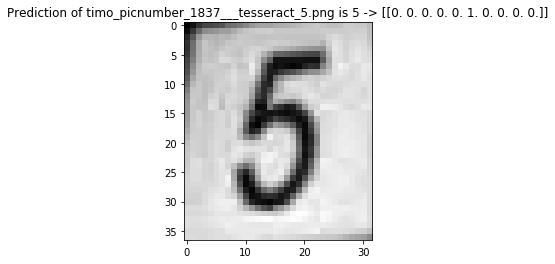

In:  0.0017650127410888672


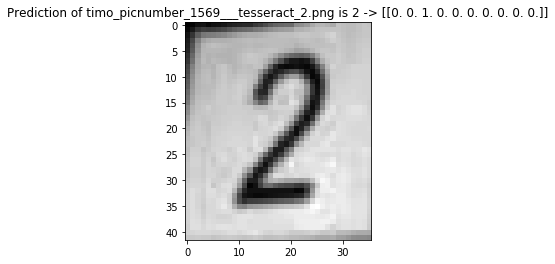

In:  0.009786128997802734


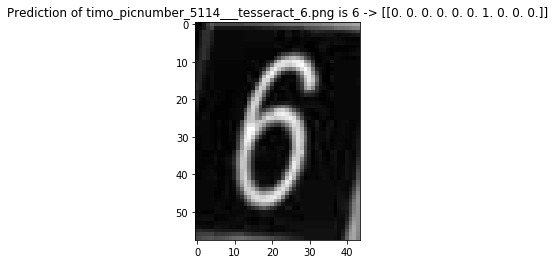

In:  0.002363443374633789


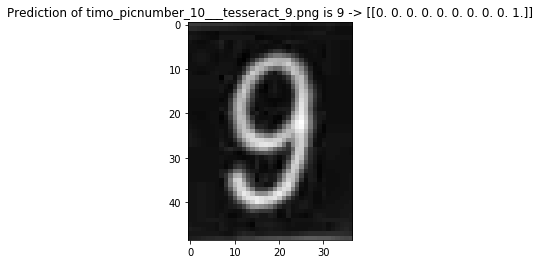

In:  0.001531839370727539


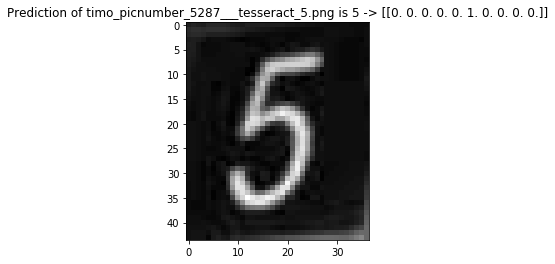

In:  0.002062559127807617


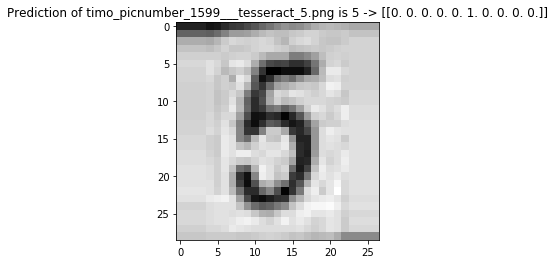

In:  0.0019197463989257812


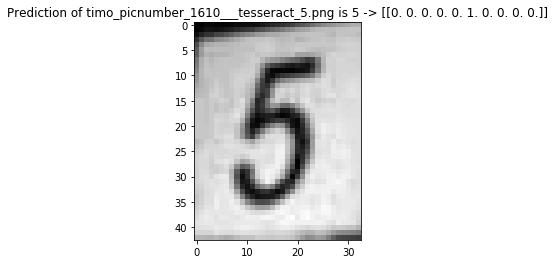

In:  0.0018811225891113281


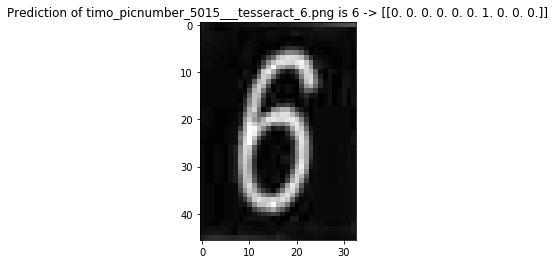

In:  0.0015826225280761719


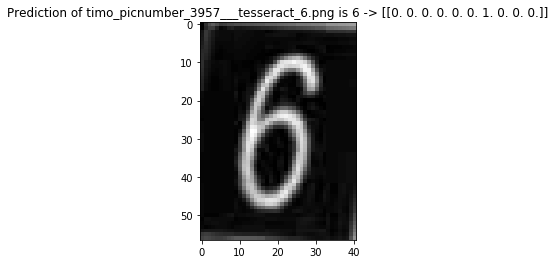

In:  0.001474618911743164


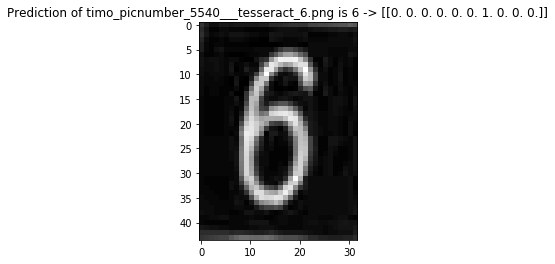

In:  0.0012712478637695312


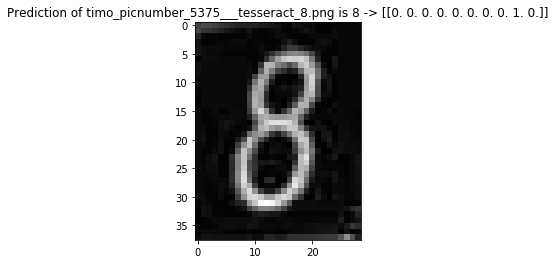

In:  0.0012822151184082031


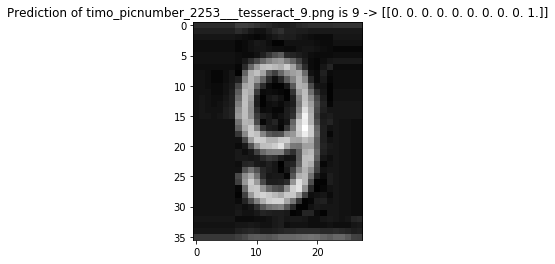

In:  0.0013401508331298828


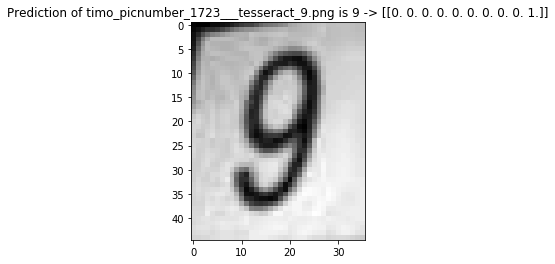

In:  0.0017795562744140625


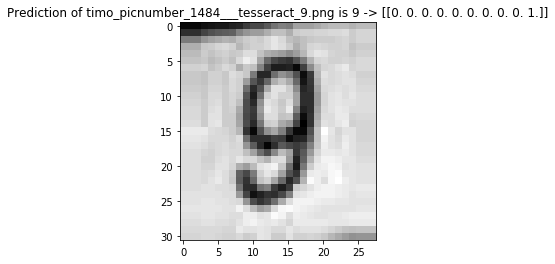

In:  0.001485586166381836


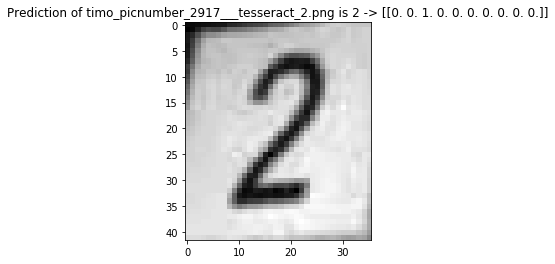

In:  0.0019047260284423828


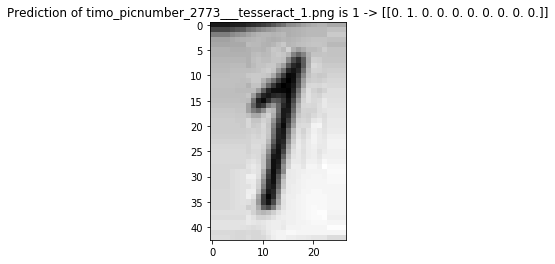

In:  0.0015039443969726562


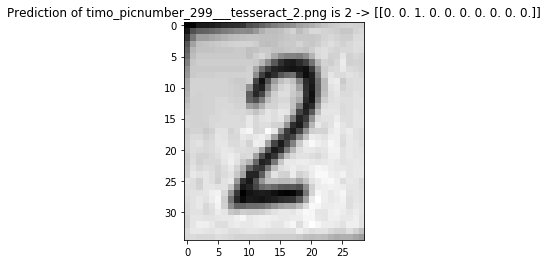

In:  0.0018734931945800781


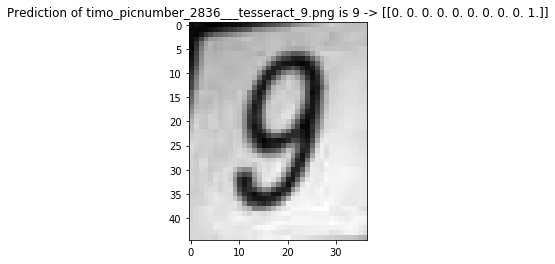

In:  0.0019719600677490234


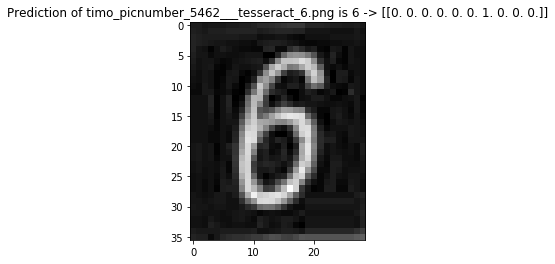

In:  0.0015842914581298828


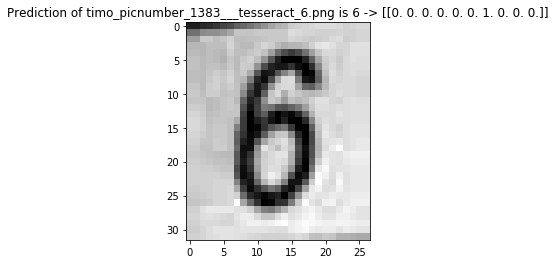

In:  0.0024216175079345703


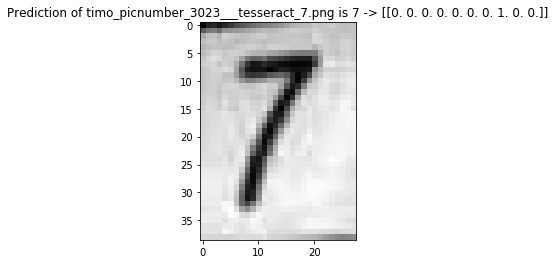

In:  0.0024712085723876953


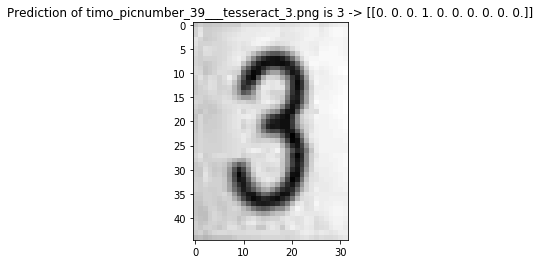

In:  0.002820253372192383


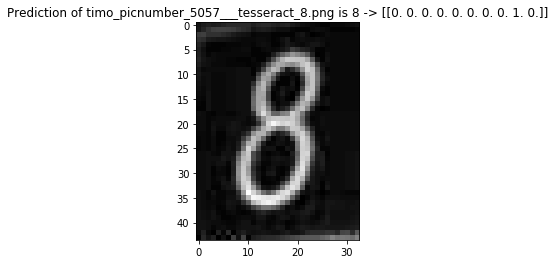

In:  0.005538225173950195


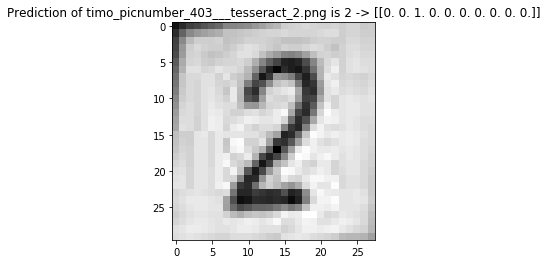

In:  0.0022614002227783203


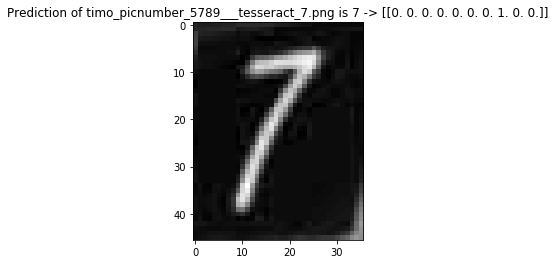

In:  0.0022580623626708984


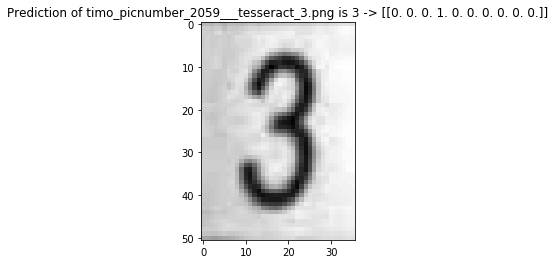

In:  0.0015807151794433594


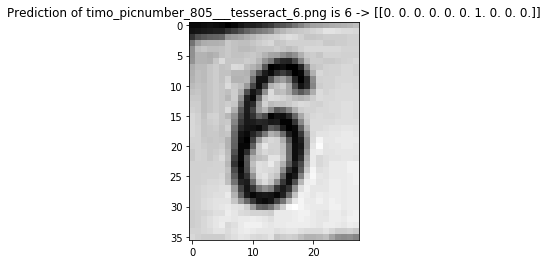

In:  0.001500844955444336


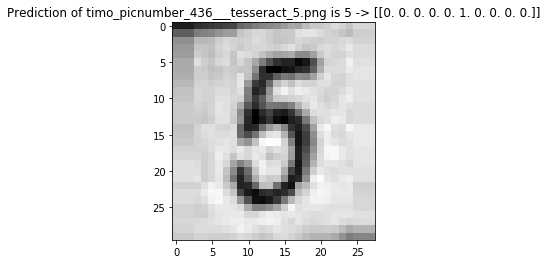

In:  0.0017626285552978516


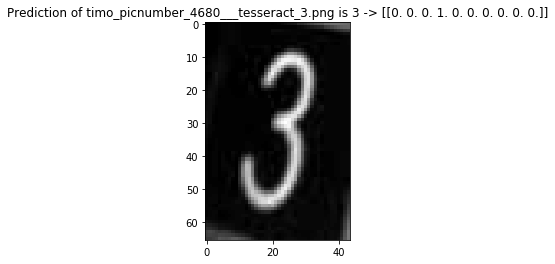

In:  0.0018889904022216797


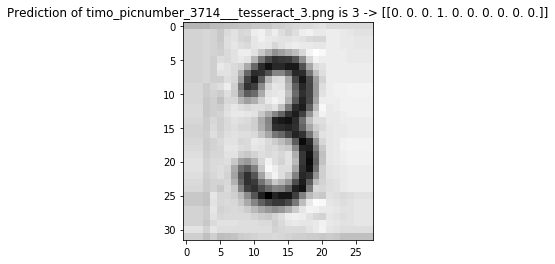

In:  0.0018258094787597656


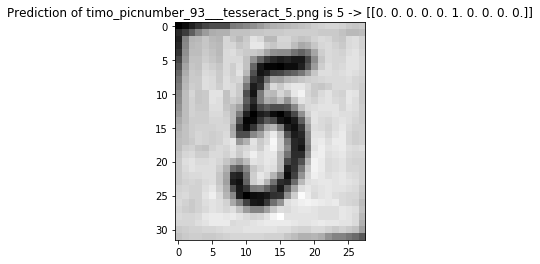

In:  0.0019137859344482422


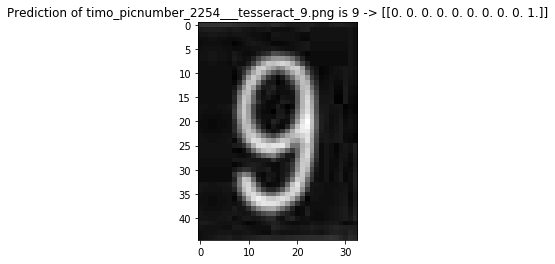

In:  0.003119230270385742


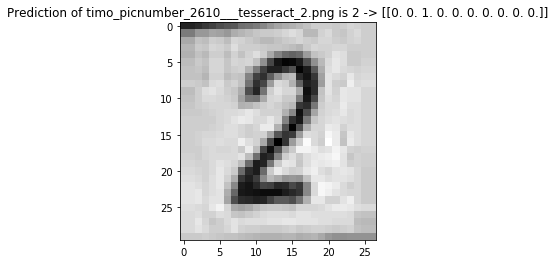

In:  0.0036780834197998047


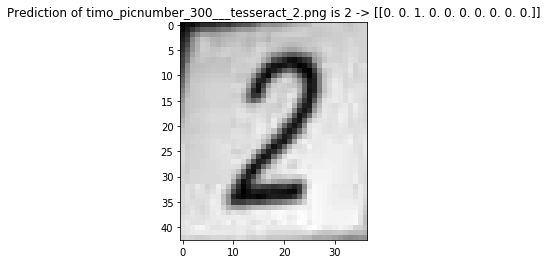

In:  0.0030584335327148438


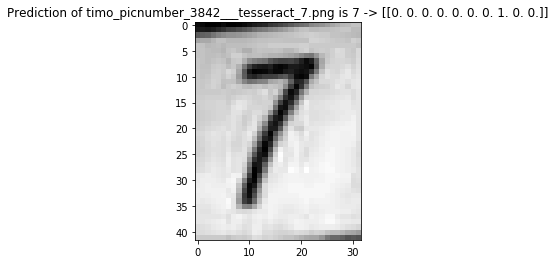

In:  0.002903461456298828


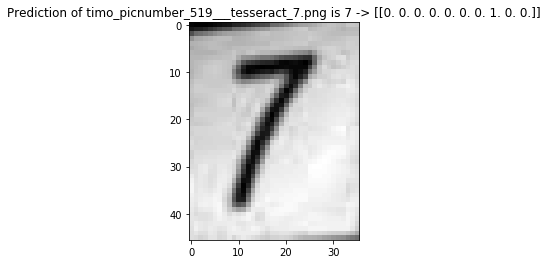

In:  0.0029125213623046875


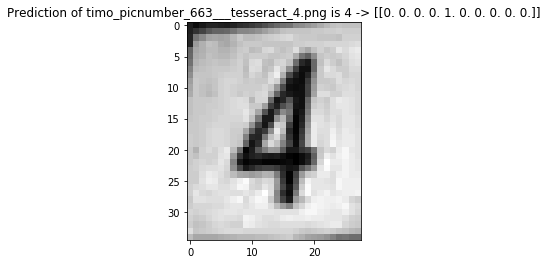

In:  0.003093242645263672


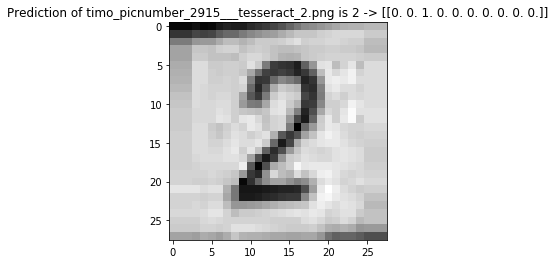

In:  0.002634286880493164


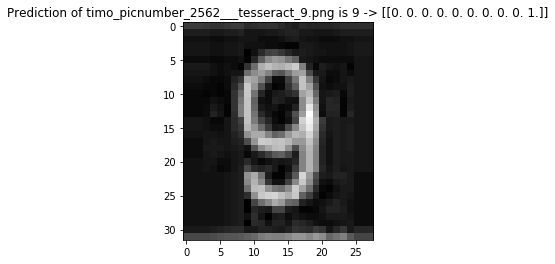

In:  0.0014243125915527344


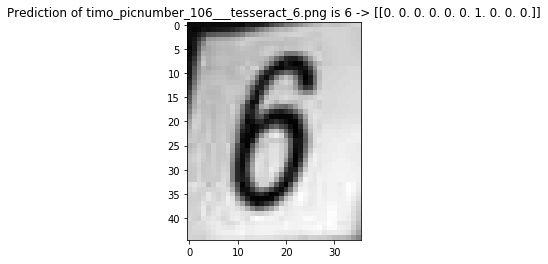

In:  0.0016674995422363281


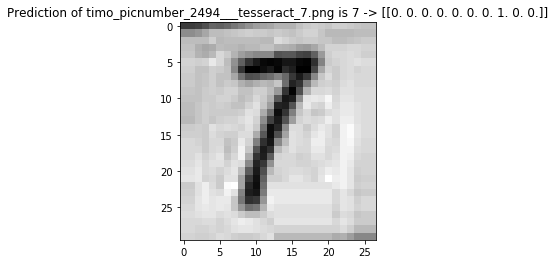

In:  0.005754947662353516


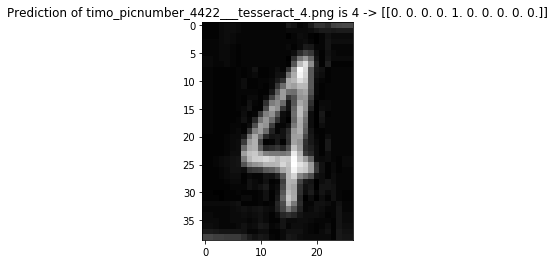

In:  0.0019195079803466797


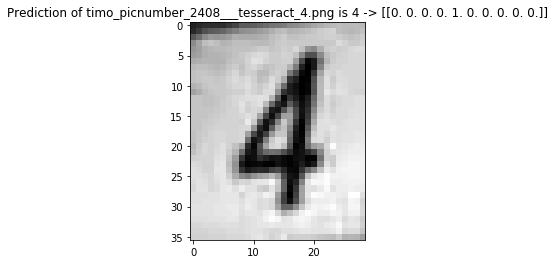

In:  0.004280805587768555


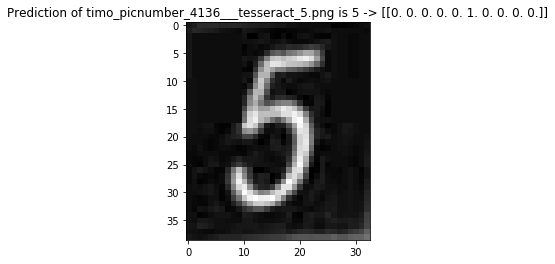

In:  0.0014412403106689453


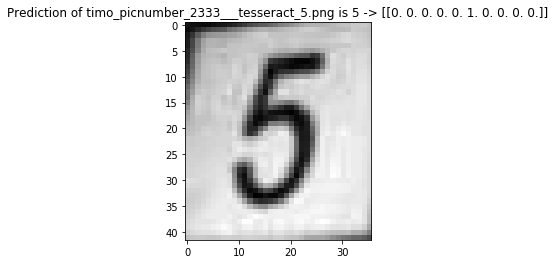

In:  0.001486063003540039


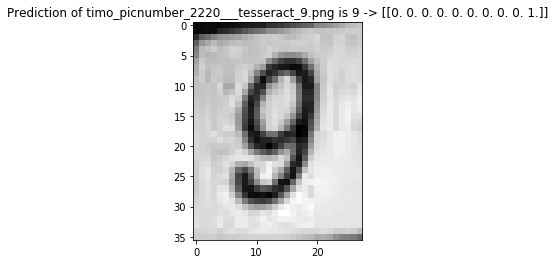

In:  0.0018510818481445312


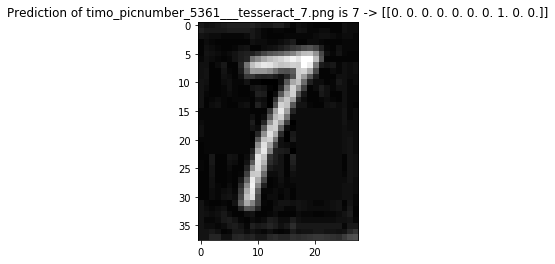

In:  0.005185365676879883


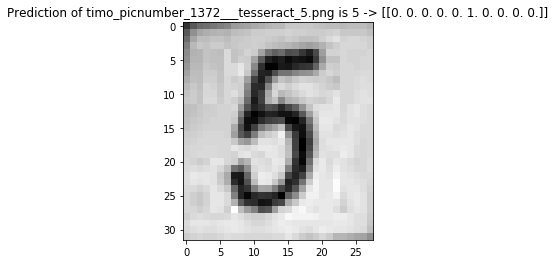

In:  0.0049800872802734375


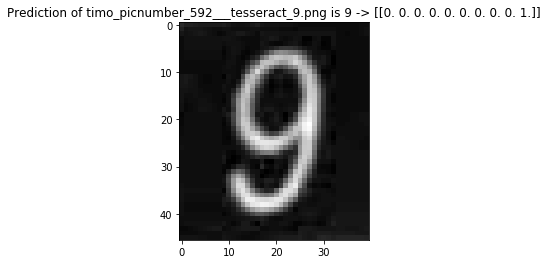

In:  0.00180816650390625


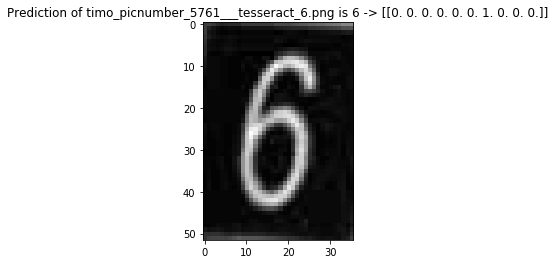

In:  0.010225057601928711


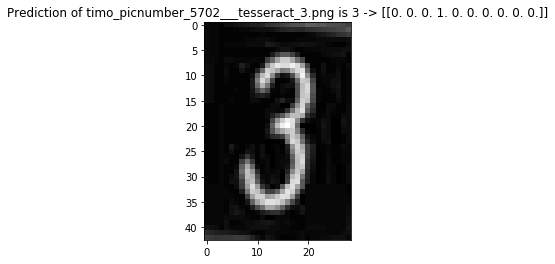

In:  0.0015778541564941406


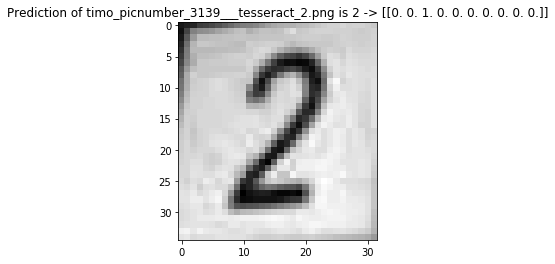

In:  0.0014057159423828125


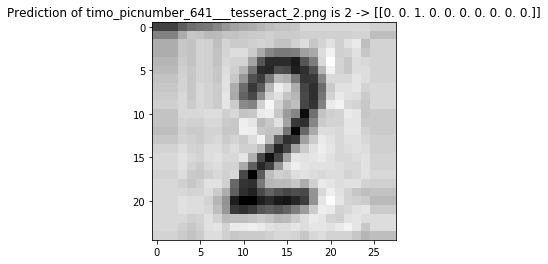

In:  0.012224435806274414


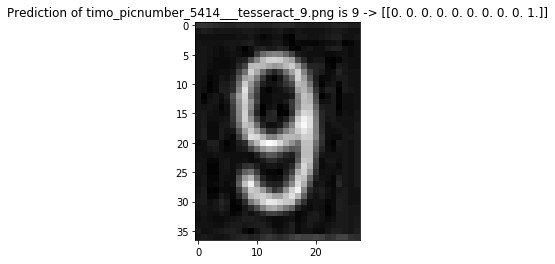

In:  0.0017745494842529297


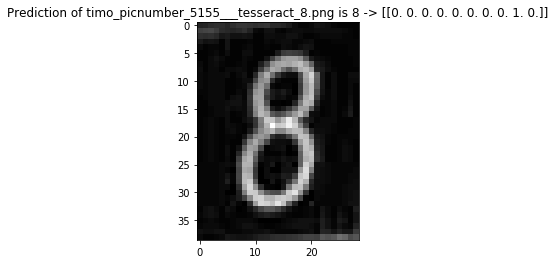

In:  0.0014646053314208984


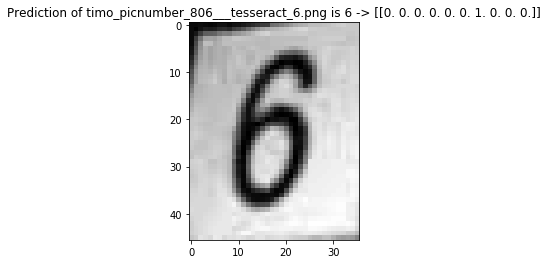

In:  0.00125885009765625


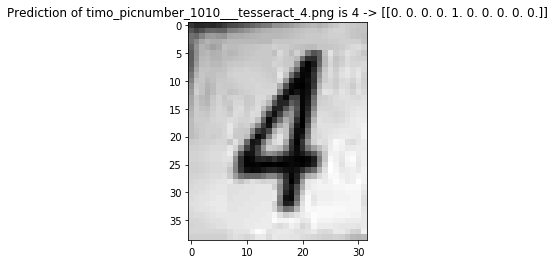

In:  0.0018715858459472656


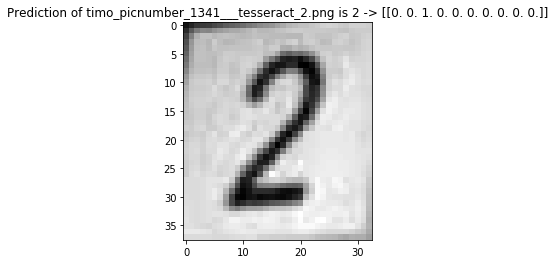

In:  0.0016298294067382812


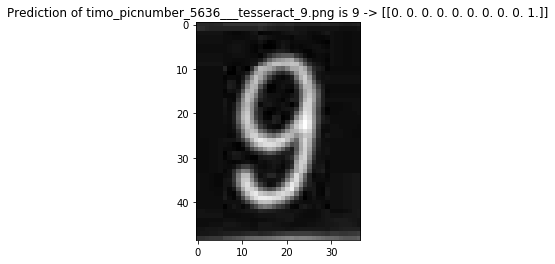

In:  0.0013973712921142578


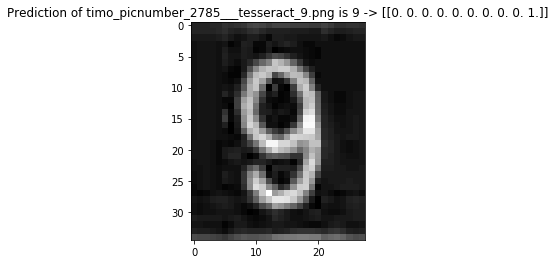

In:  0.0012869834899902344


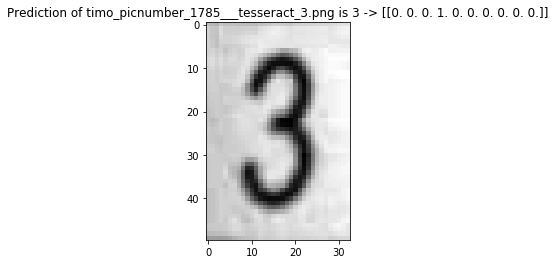

In:  0.0015175342559814453


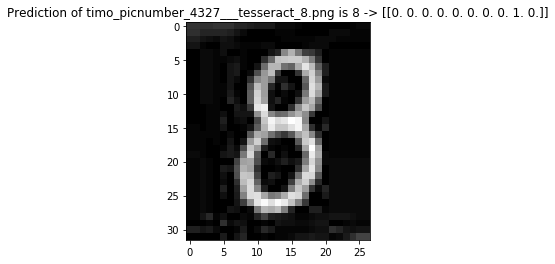

In:  0.001756429672241211


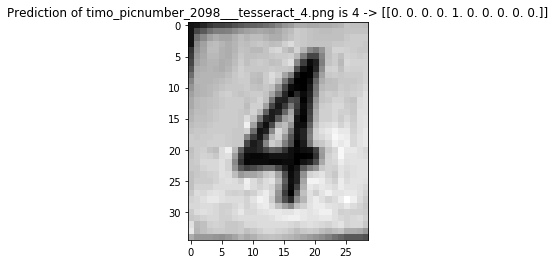

In:  0.0014865398406982422


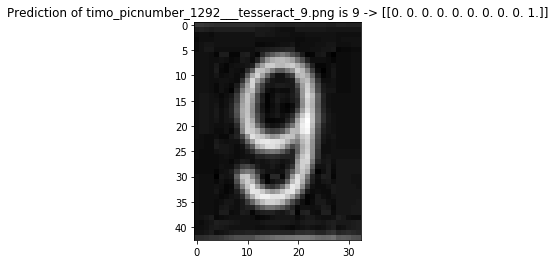

In:  0.0015692710876464844


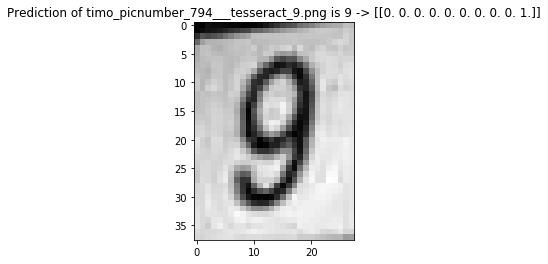

In:  0.0014498233795166016


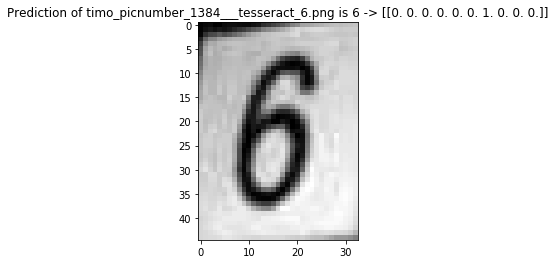

In:  0.0014197826385498047


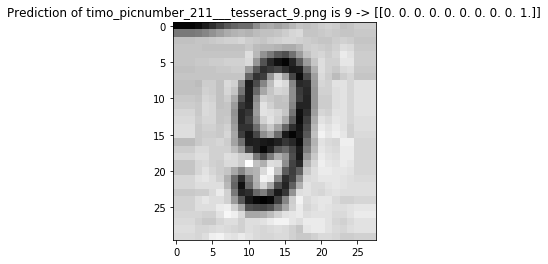

In:  0.0017445087432861328


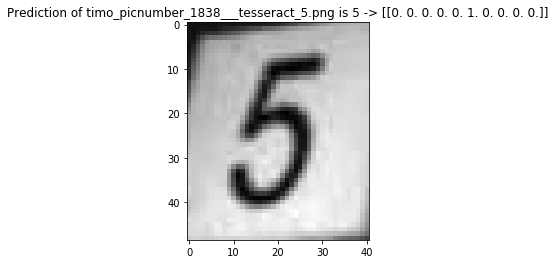

In:  0.0016298294067382812


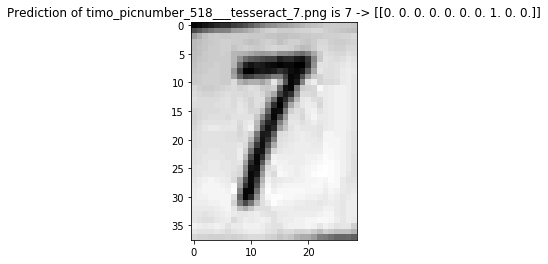

In:  0.001680135726928711


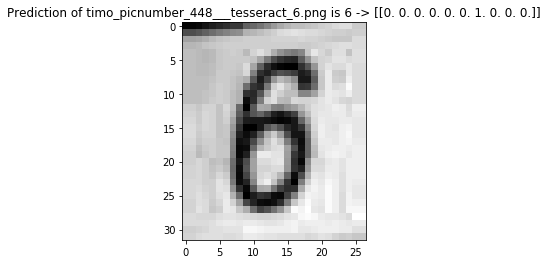

In:  0.0016770362854003906


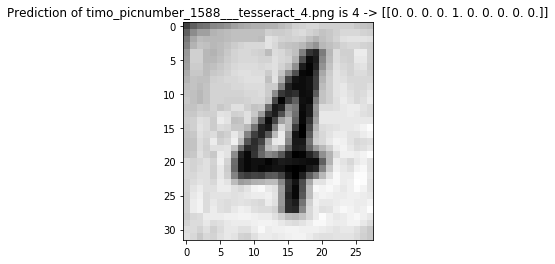

In:  0.001470804214477539


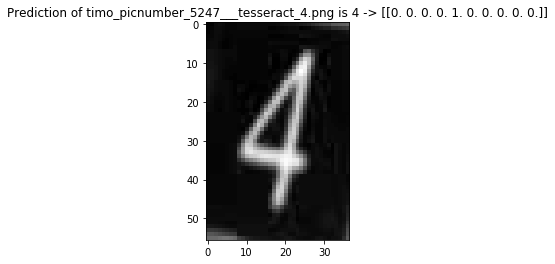

In:  0.0017590522766113281


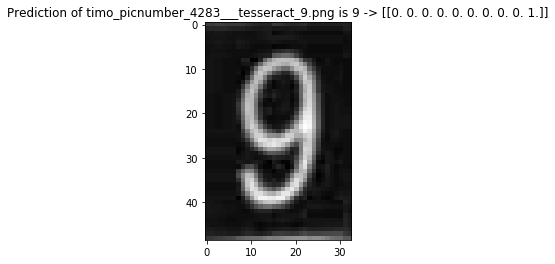

In:  0.0022690296173095703


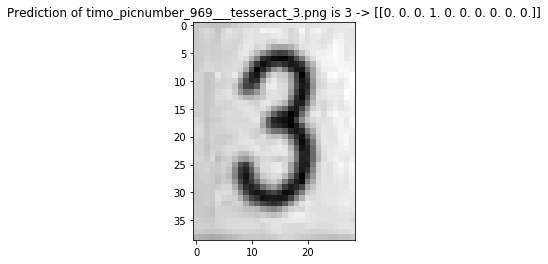

In:  0.004701852798461914


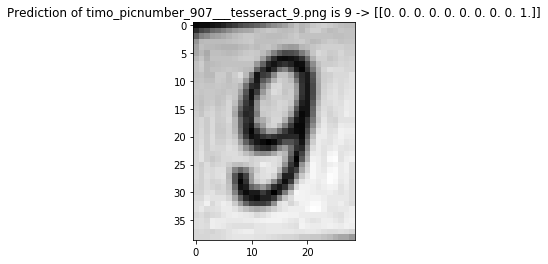

In:  0.00601649284362793


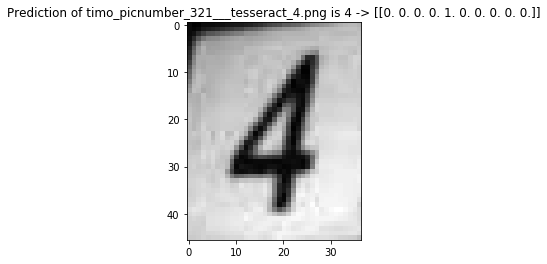

In:  0.0014314651489257812


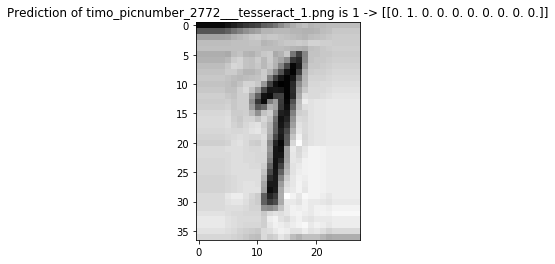

In:  0.00473332405090332


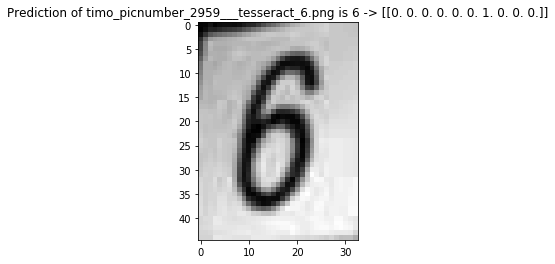

In:  0.0038650035858154297


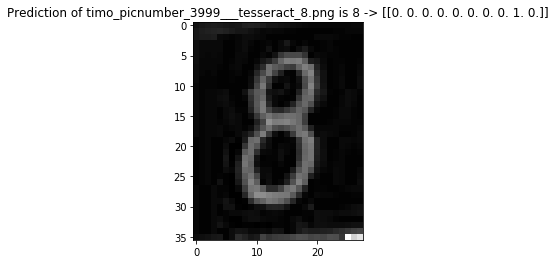

In:  0.005254507064819336


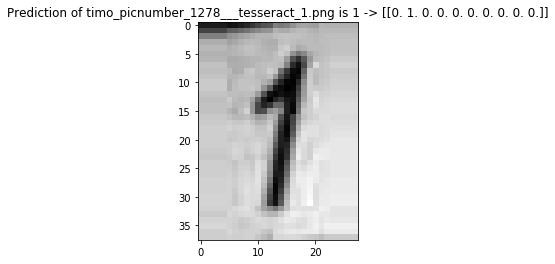

In:  0.0017783641815185547


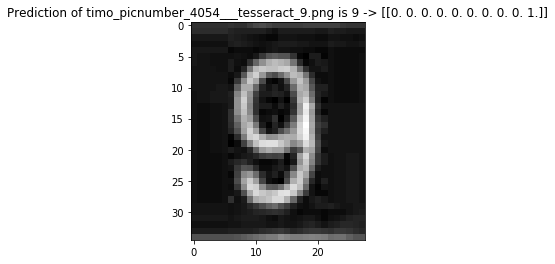

In:  0.002185344696044922


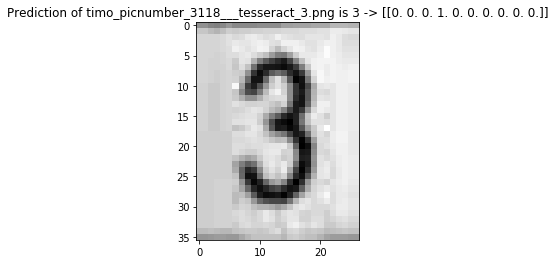

In:  0.004322528839111328


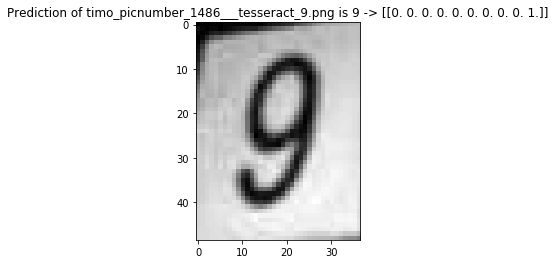

In:  0.0027642250061035156


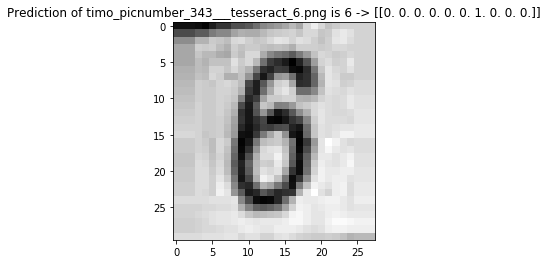

In:  0.002197742462158203


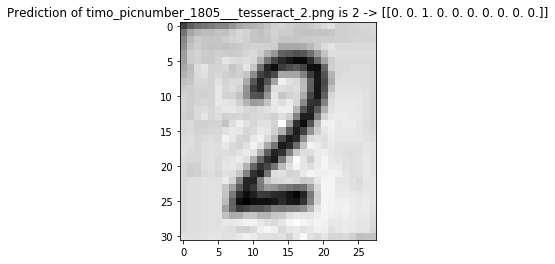

In:  0.0017664432525634766


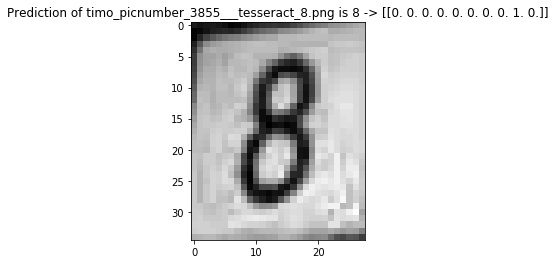

In:  0.002518177032470703


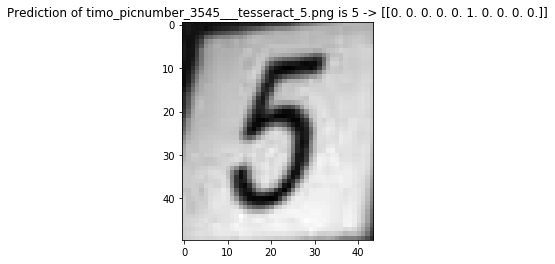

In:  0.0022041797637939453


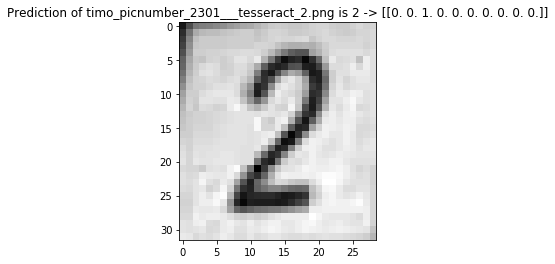

In:  0.0021741390228271484


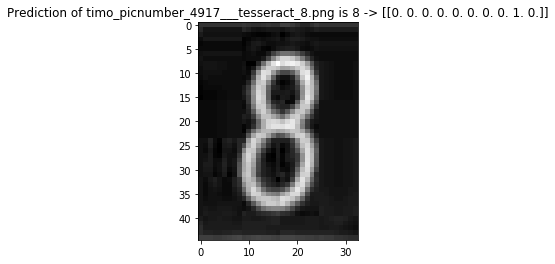

In:  0.0021474361419677734


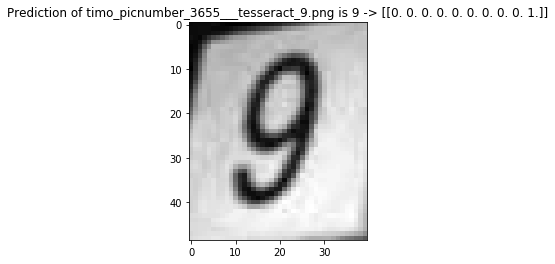

In:  0.0024459362030029297


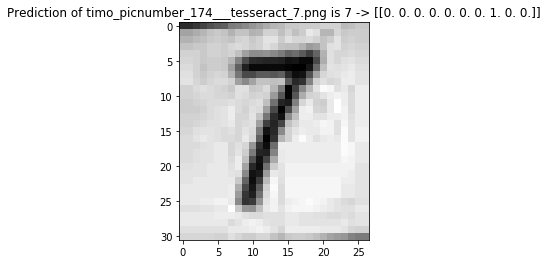

In:  0.0015180110931396484


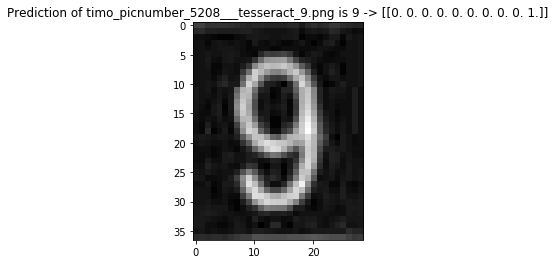

In:  0.0018110275268554688


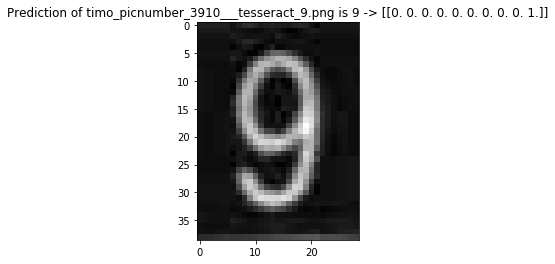

In:  0.0017168521881103516


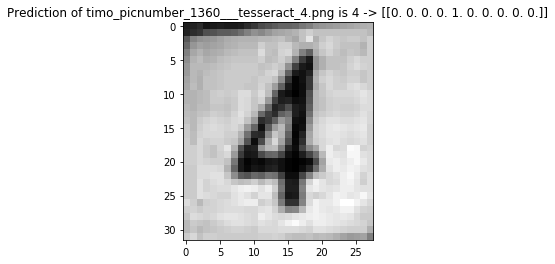

In:  0.0021965503692626953


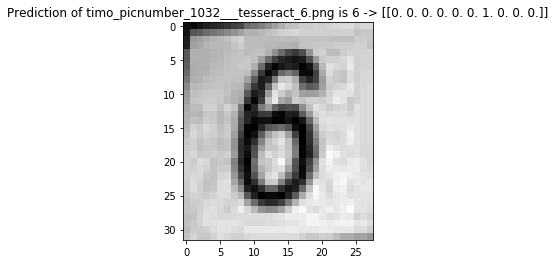

In:  0.008455038070678711


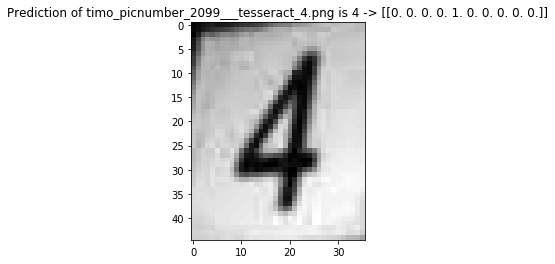

In:  0.002312183380126953


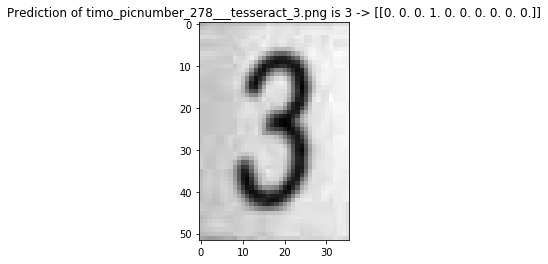

In:  0.011710405349731445


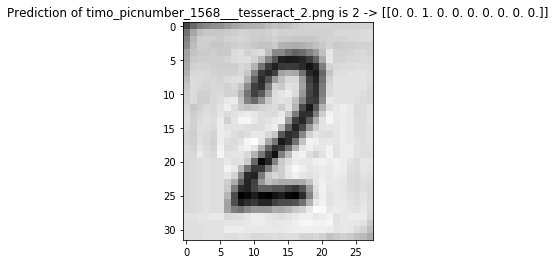

In:  0.0071146488189697266


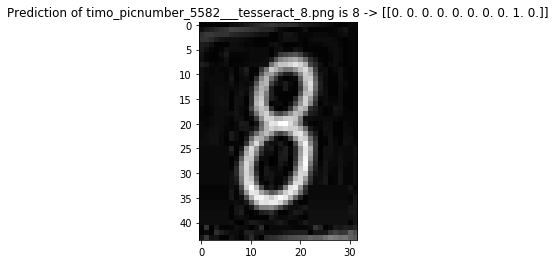

In:  0.0013909339904785156


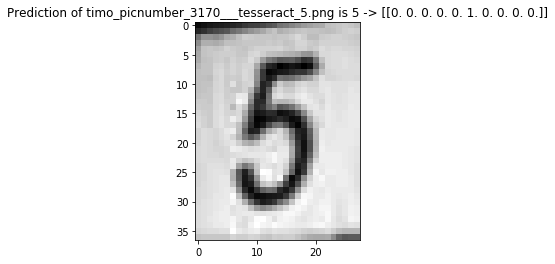

In:  0.0015265941619873047


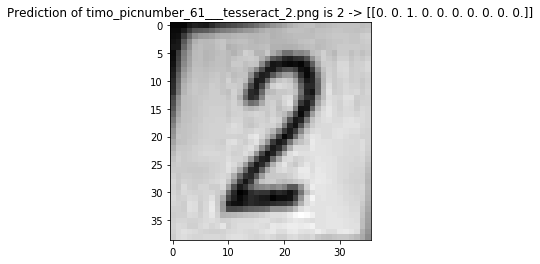

In:  0.0013303756713867188


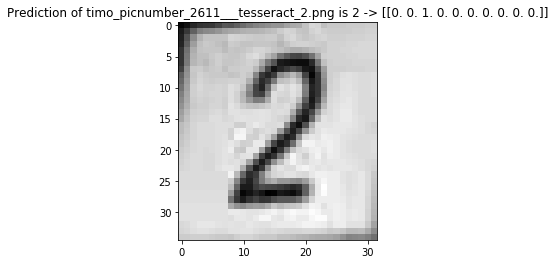

In:  0.005865335464477539


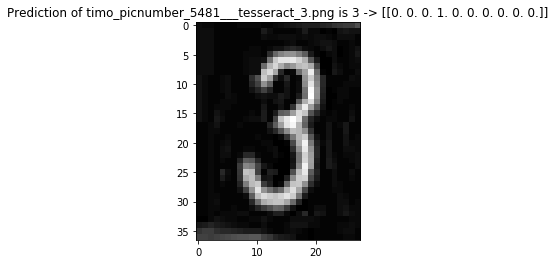

In:  0.002626180648803711


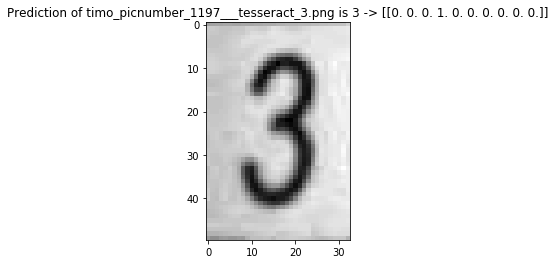

In:  0.0017545223236083984


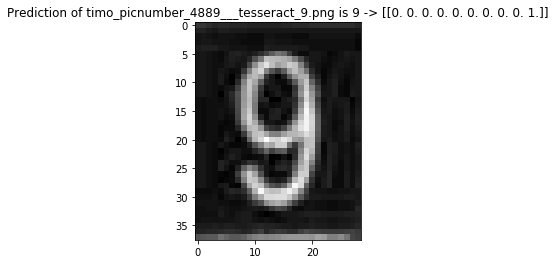

In:  0.001585245132446289


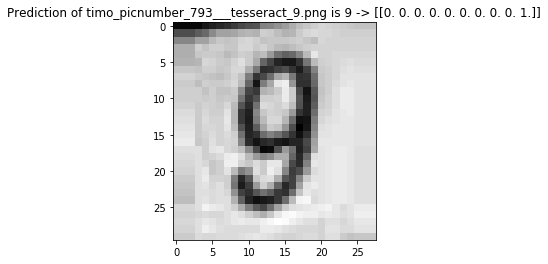

In:  0.0018694400787353516


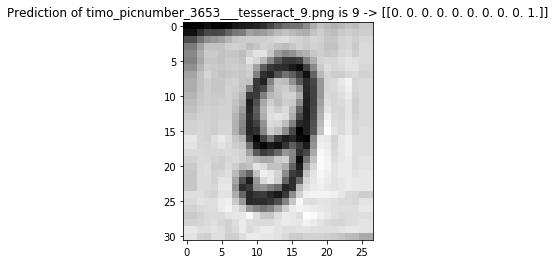

In:  0.0015683174133300781


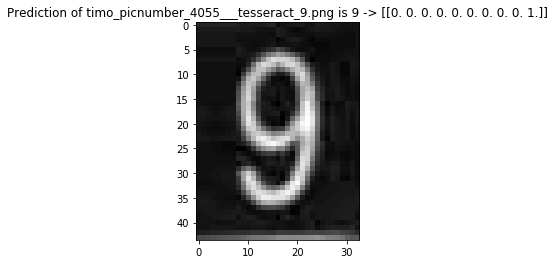

In:  0.0018801689147949219


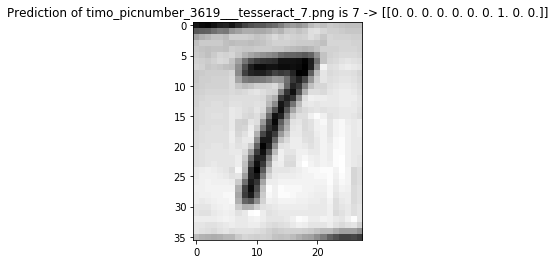

In:  0.001978635787963867


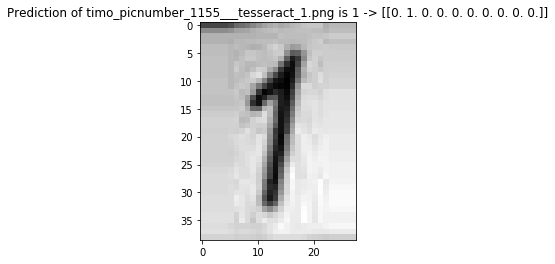

In:  0.001714944839477539


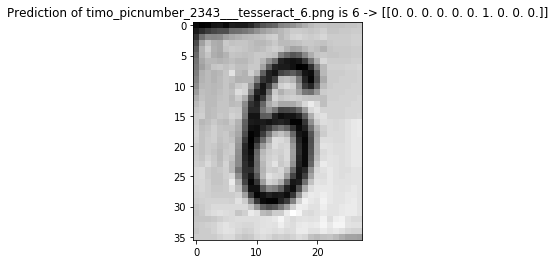

In:  0.0022373199462890625


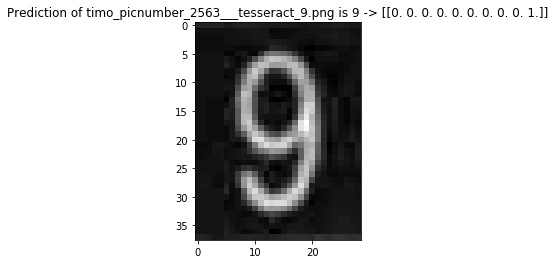

In:  0.0018734931945800781


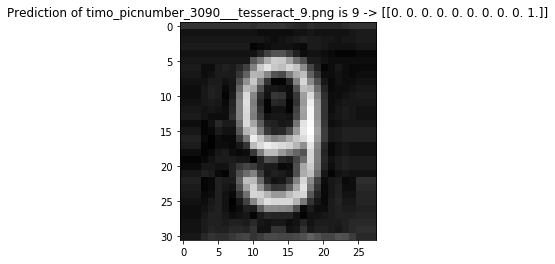

In:  0.0012774467468261719


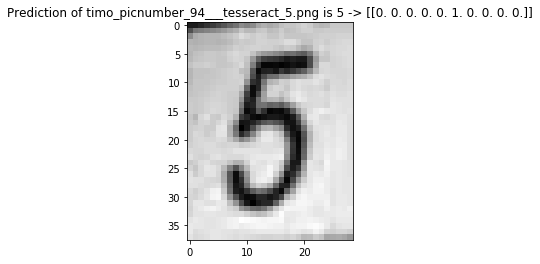

In:  0.0015554428100585938


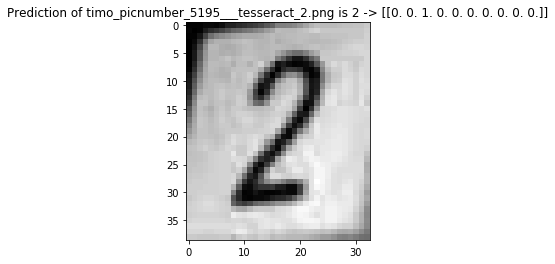

In:  0.0018978118896484375


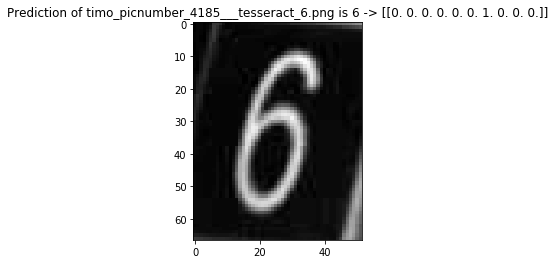

In:  0.0015308856964111328


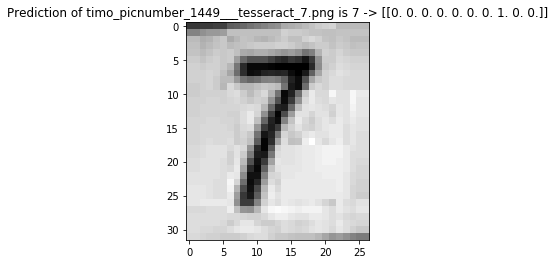

In:  0.0013315677642822266


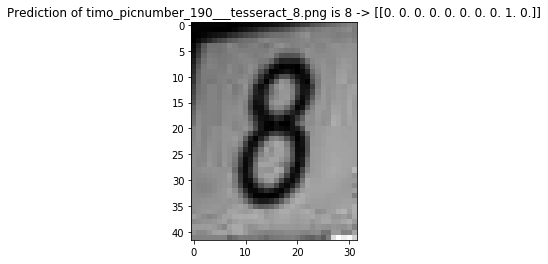

In:  0.0013780593872070312


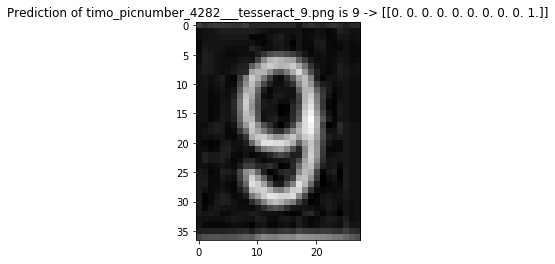

In:  0.002093076705932617


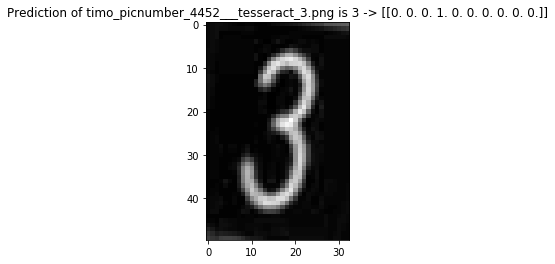

In:  0.0017409324645996094


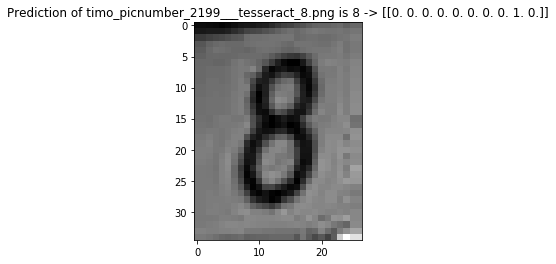

In:  0.0021448135375976562


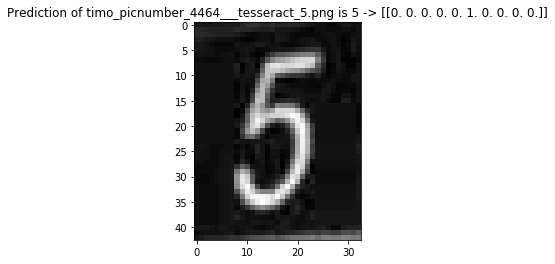

In:  0.00203704833984375


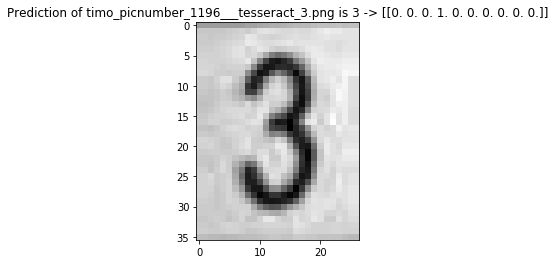

In:  0.001653909683227539


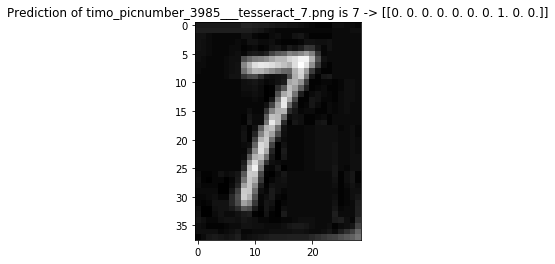

In:  0.0019605159759521484


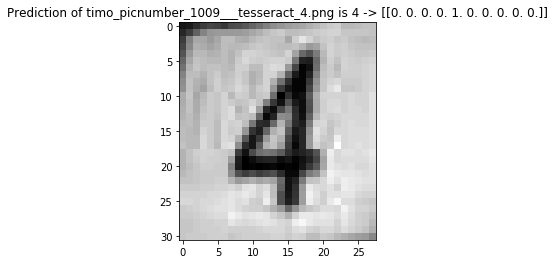

In:  0.0016930103302001953


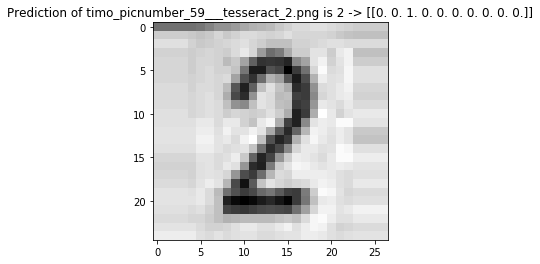

In:  0.001477956771850586


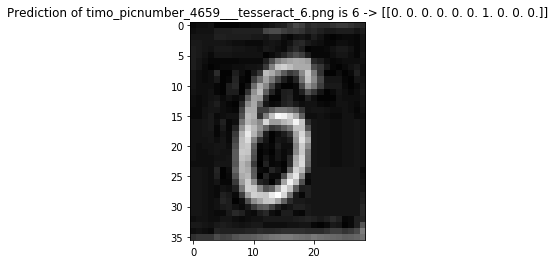

In:  0.0055103302001953125


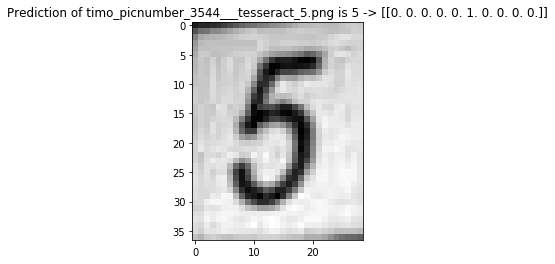

In:  0.0017287731170654297


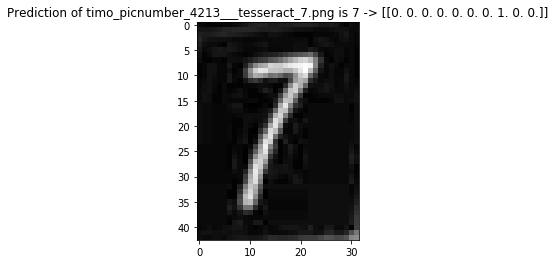

In:  0.0014679431915283203


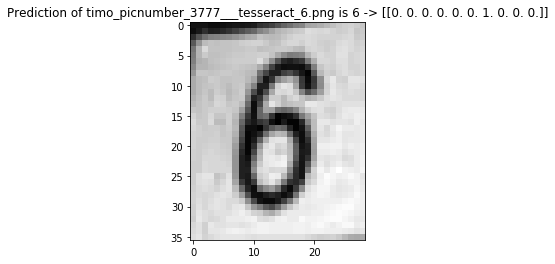

In:  0.0050165653228759766


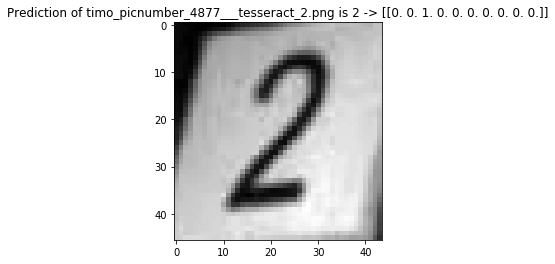

In:  0.003576517105102539


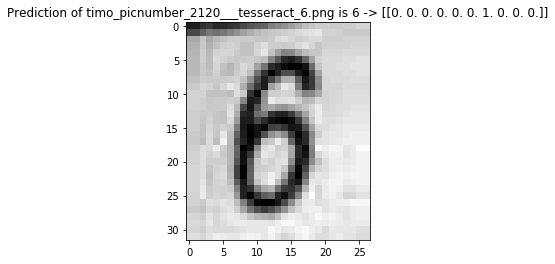

In:  0.0023543834686279297


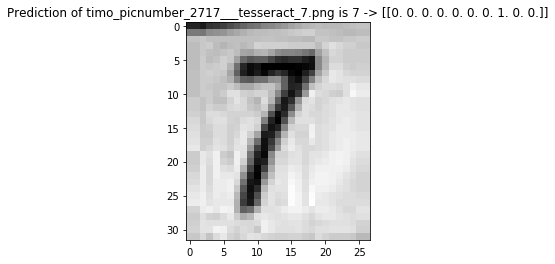

In:  0.002916097640991211


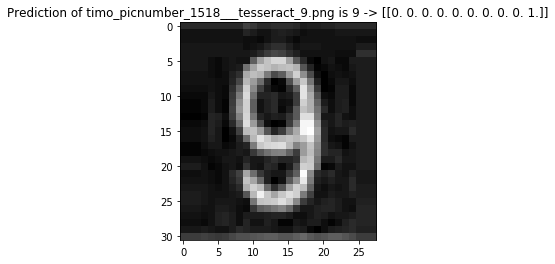

In:  0.0038602352142333984


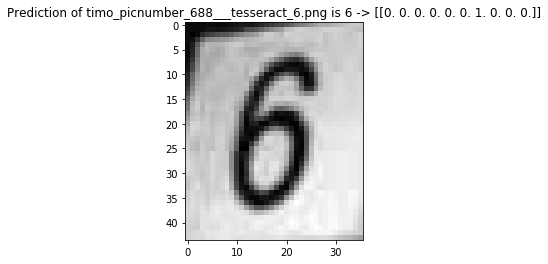

In:  0.0046651363372802734


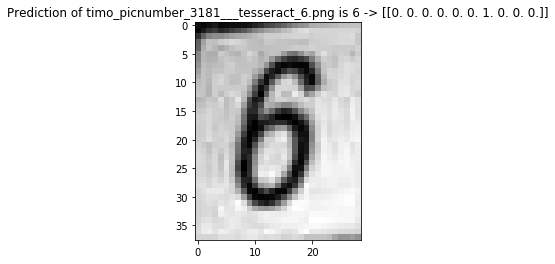

In:  0.0032210350036621094


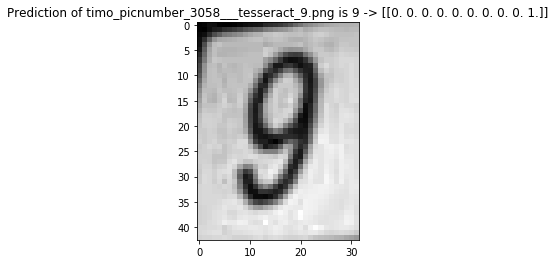

In:  0.0015866756439208984


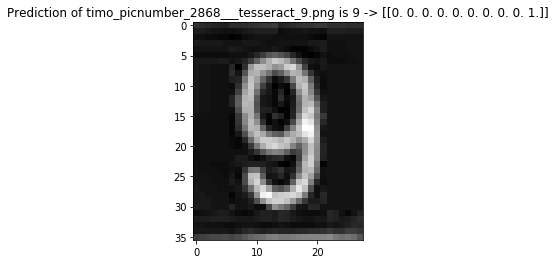

In:  0.002008199691772461


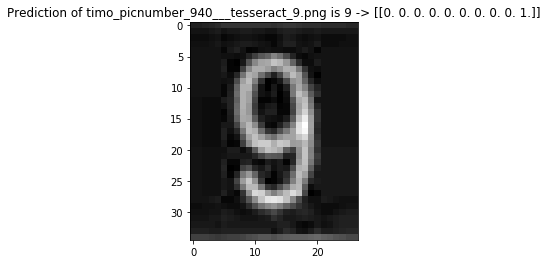

In:  0.002650737762451172


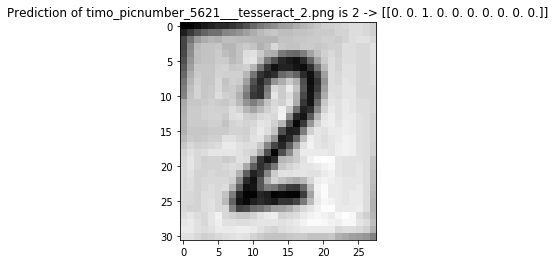

In:  0.0025572776794433594


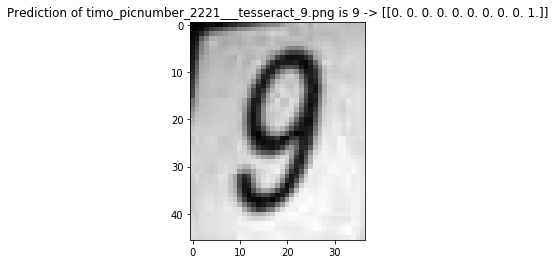

In:  0.0025229454040527344


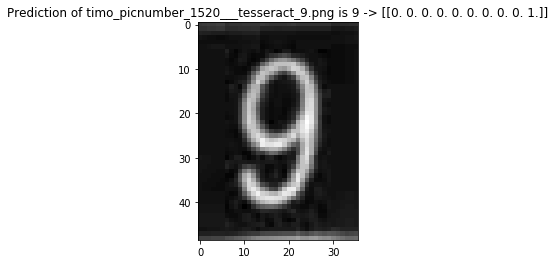

In:  0.004456281661987305


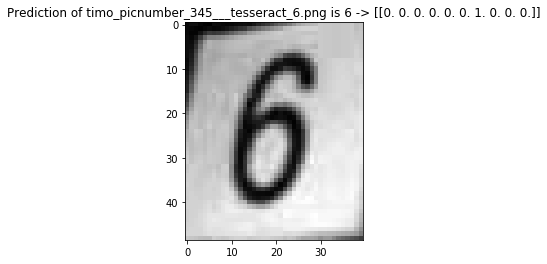

In:  0.0019176006317138672


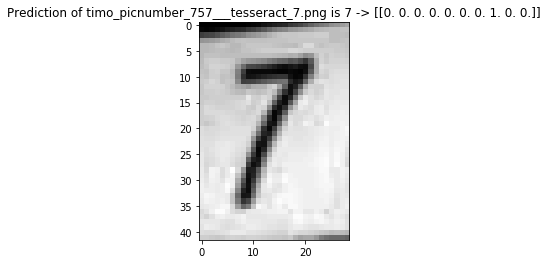

In:  0.003957033157348633


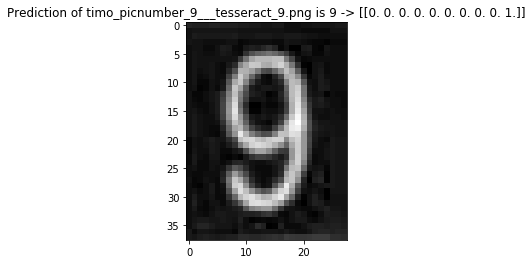

In:  0.001348257064819336


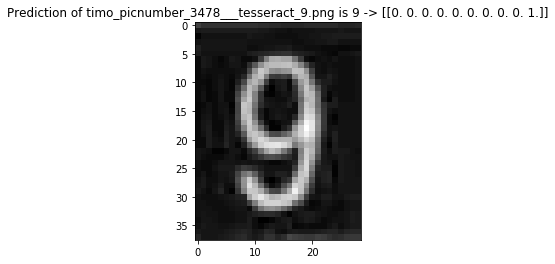

In:  0.0015807151794433594


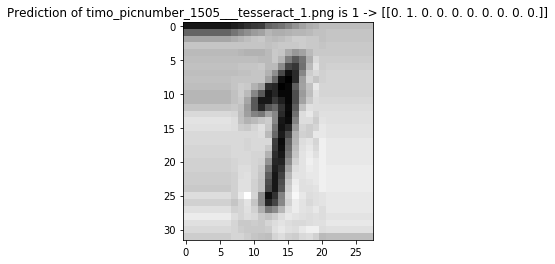

In:  0.001825094223022461


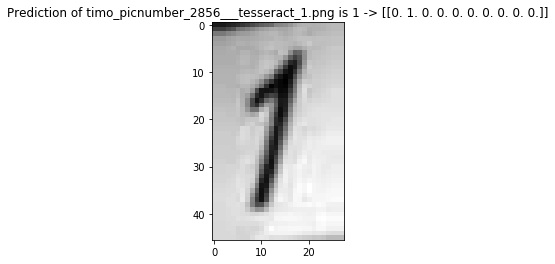

In:  0.0018472671508789062


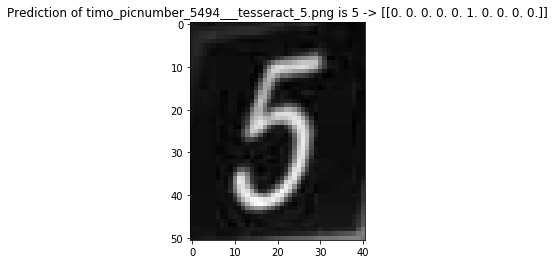

In:  0.0013270378112792969


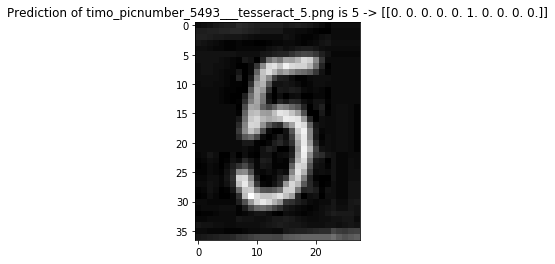

In:  0.0013265609741210938


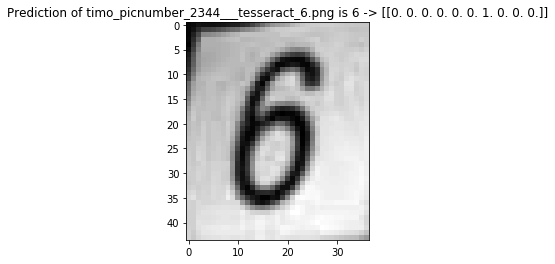

In:  0.0021665096282958984


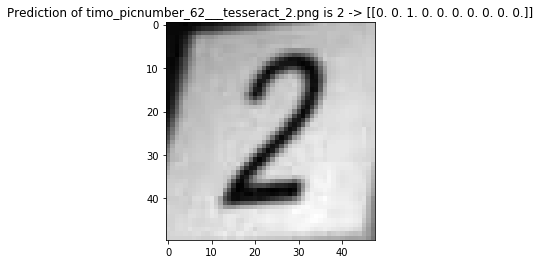

In:  0.006070613861083984


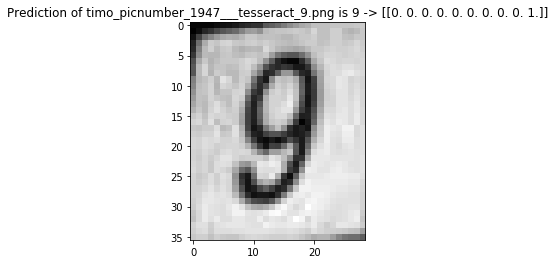

In:  0.002603769302368164


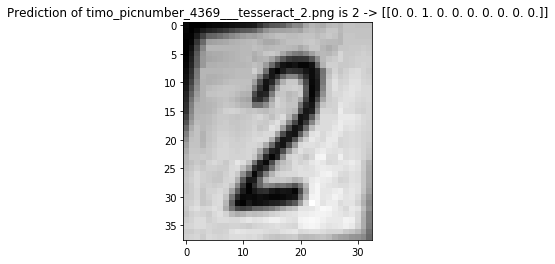

In:  0.002000570297241211


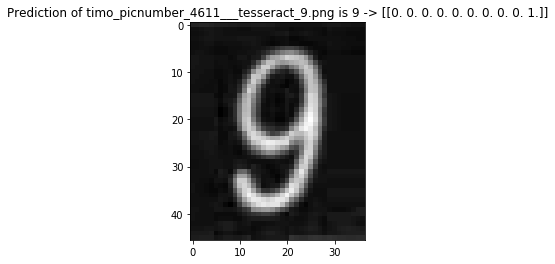

In:  0.010293006896972656


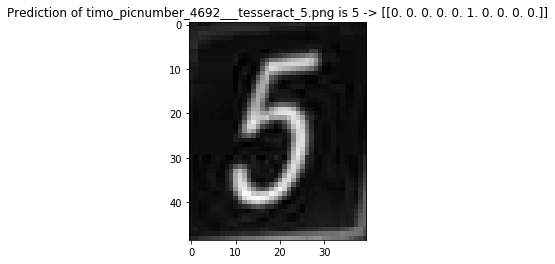

In:  0.0015227794647216797


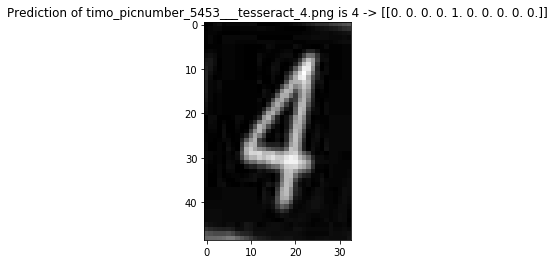

In:  0.006036520004272461


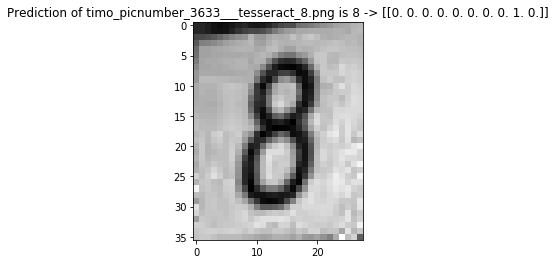

In:  0.0061223506927490234


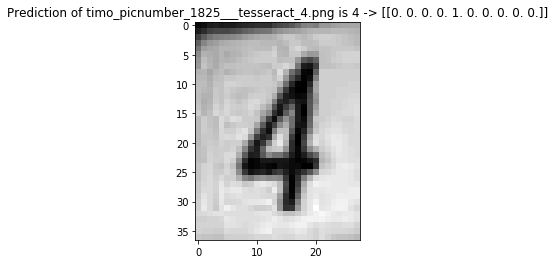

In:  0.002148866653442383


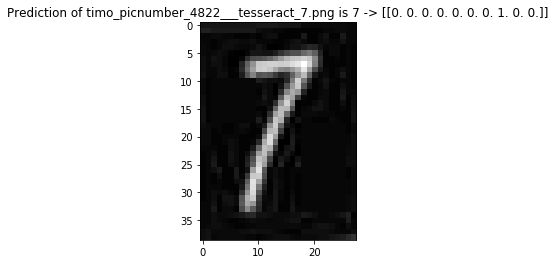

In:  0.0015625953674316406


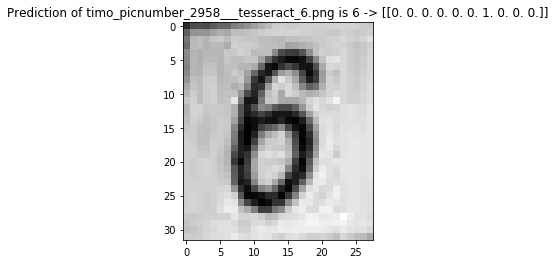

In:  0.0014526844024658203


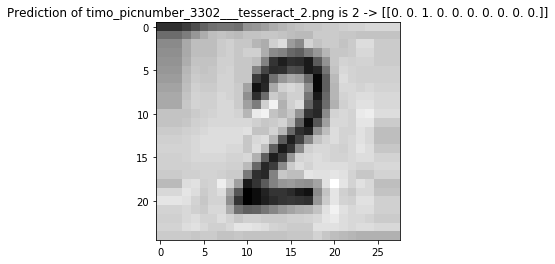

In:  0.0018072128295898438


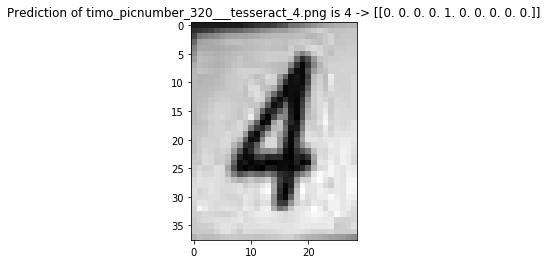

In:  0.005526542663574219


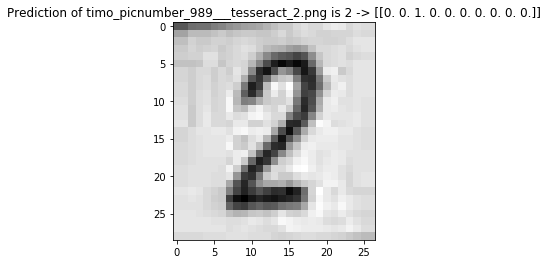

In:  0.001444101333618164


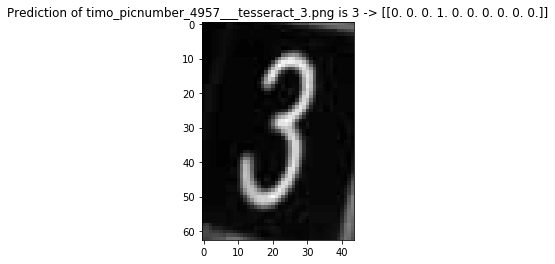

In:  0.0018963813781738281


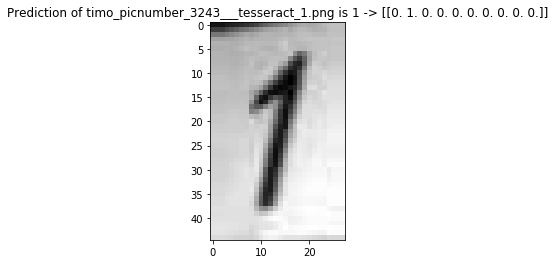

In:  0.0037102699279785156


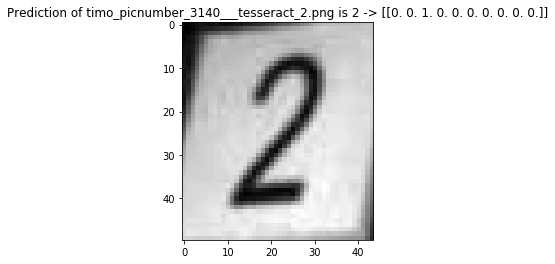

In:  0.0015642642974853516


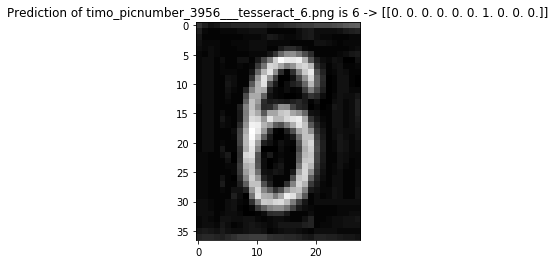

In:  0.0015993118286132812


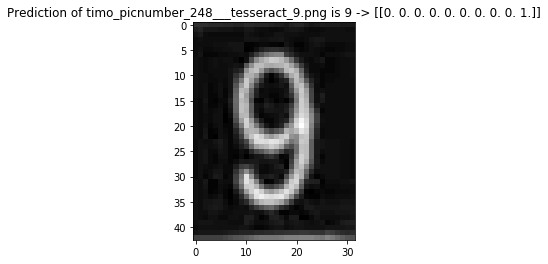

In:  0.0040323734283447266


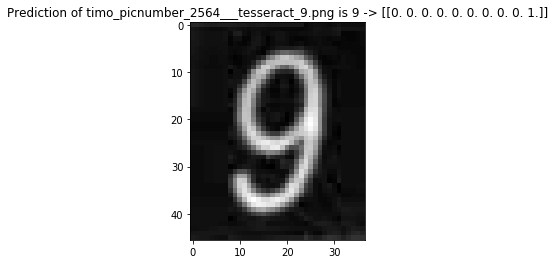

In:  0.0017209053039550781


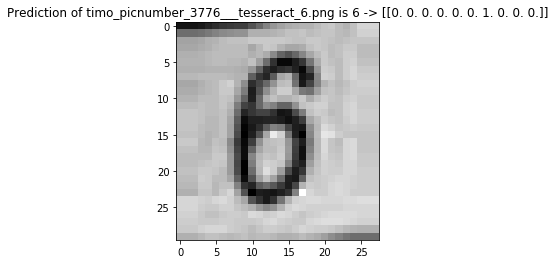

In:  0.0016009807586669922


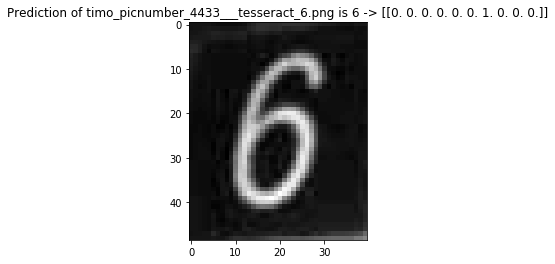

In:  0.005955934524536133


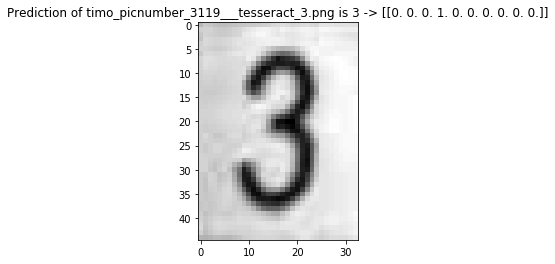

In:  0.0023741722106933594


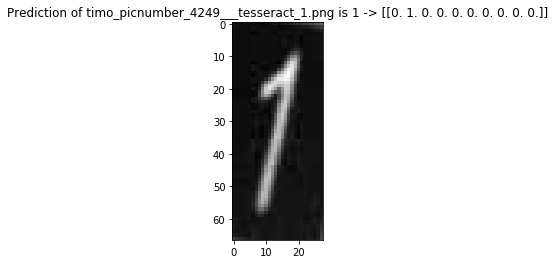

In:  0.0027806758880615234


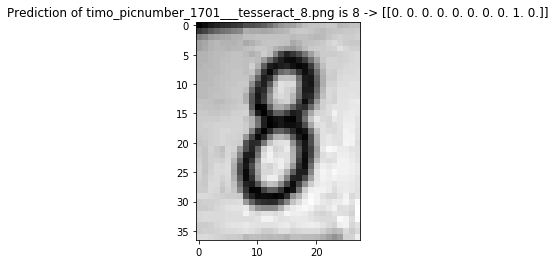

In:  0.0028603076934814453


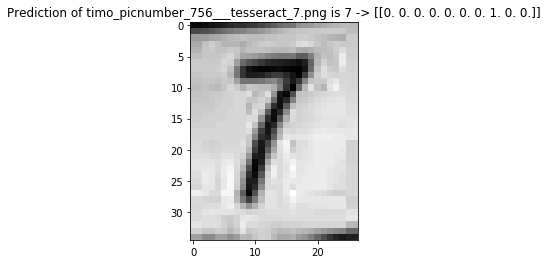

In:  0.0028400421142578125


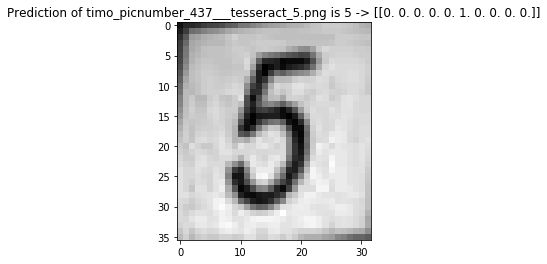

In:  0.0013396739959716797


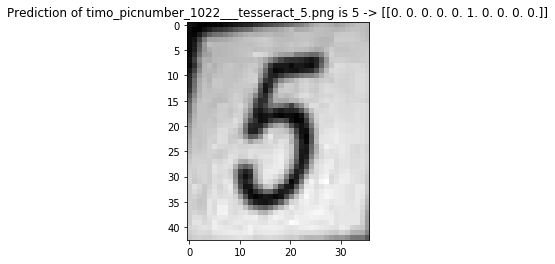

In:  0.001627206802368164


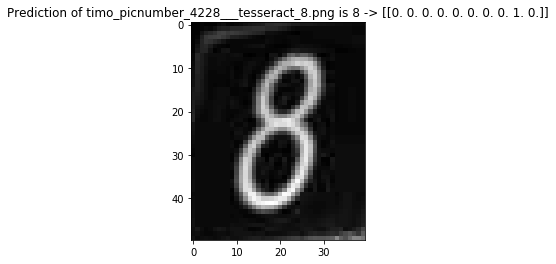

In:  0.0014429092407226562


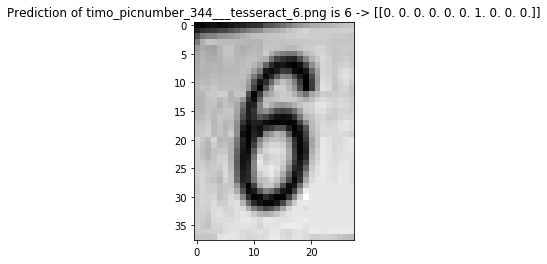

In:  0.002181529998779297


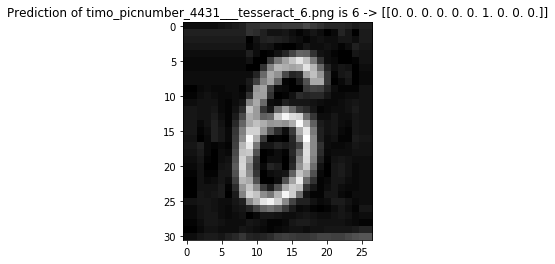

In:  0.002382516860961914


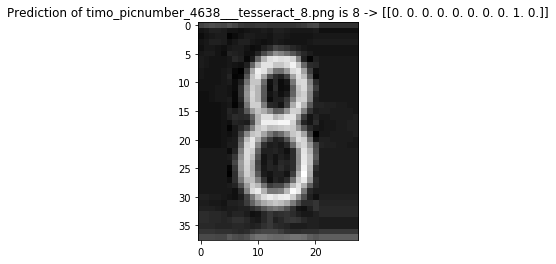

In:  0.0023992061614990234


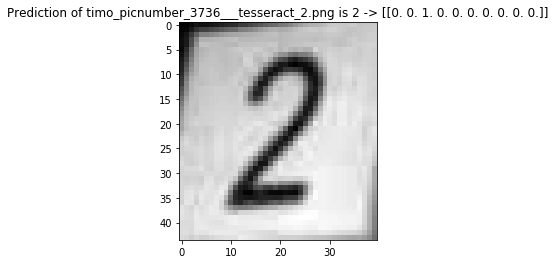

In:  0.0037539005279541016


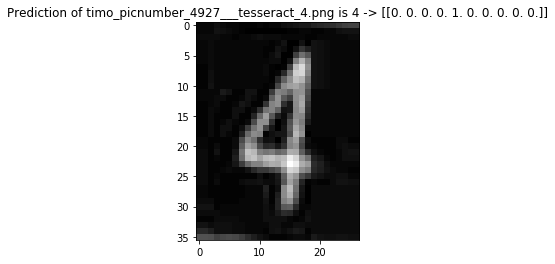

In:  0.001889944076538086


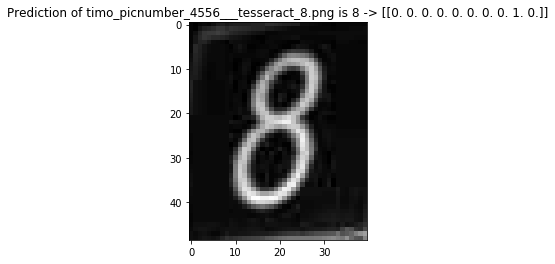

In:  0.001955270767211914


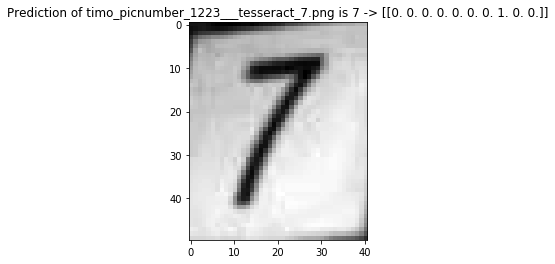

In:  0.0020880699157714844


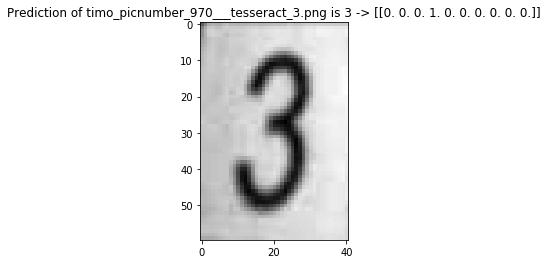

In:  0.0021169185638427734


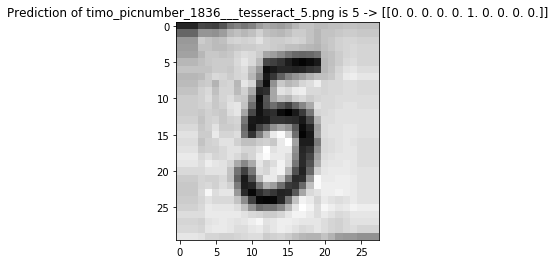

In:  0.007944107055664062


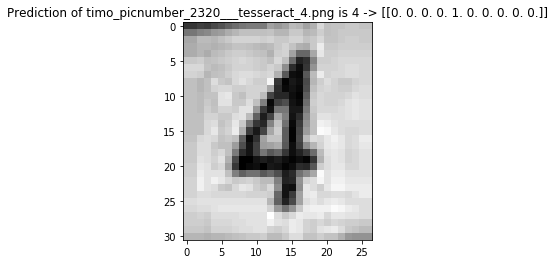

In:  0.0017044544219970703


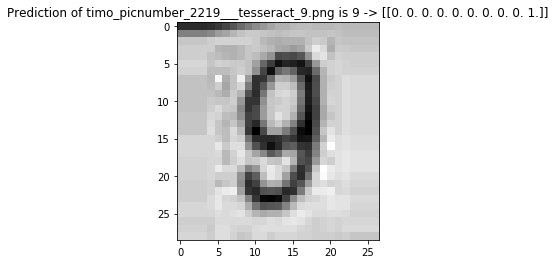

In:  0.014319419860839844


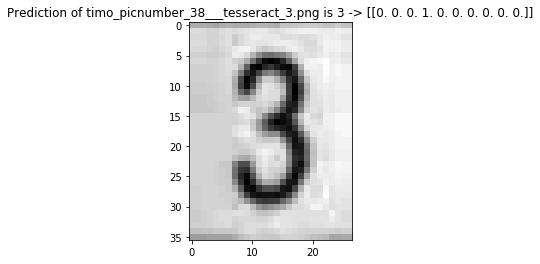

In:  0.0032973289489746094


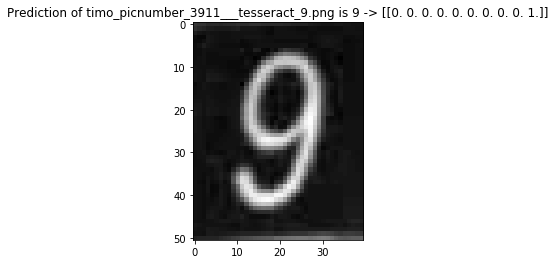

In:  0.0014853477478027344


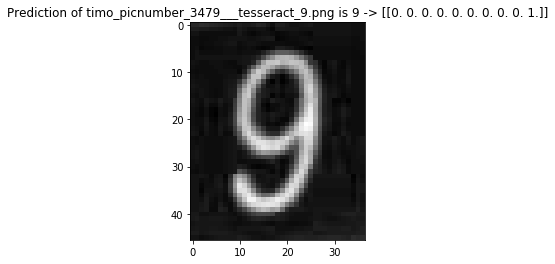

In:  0.001901865005493164


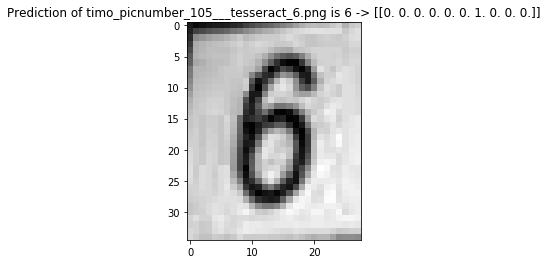

In:  0.0021076202392578125


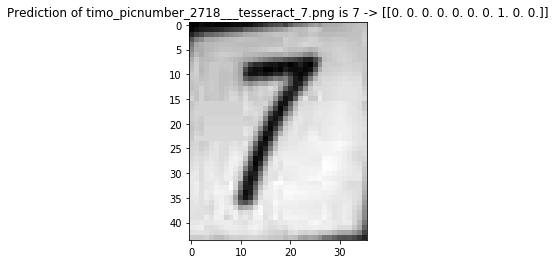

In:  0.0019440650939941406


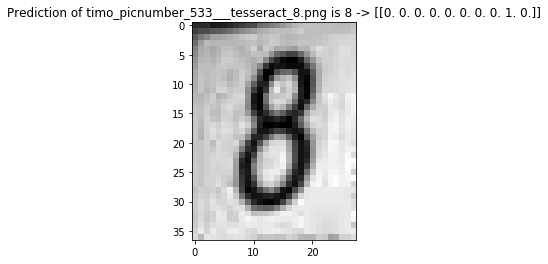

In:  0.006438255310058594


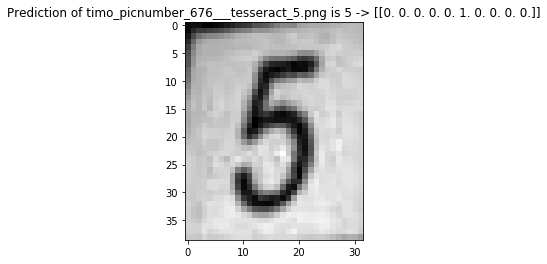

In:  0.0014224052429199219


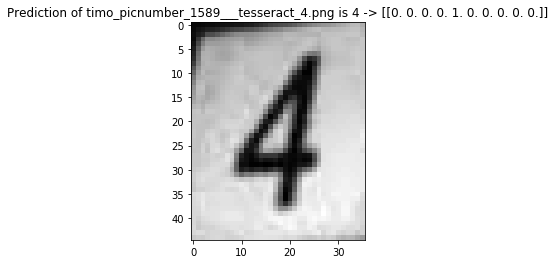

In:  0.001960277557373047


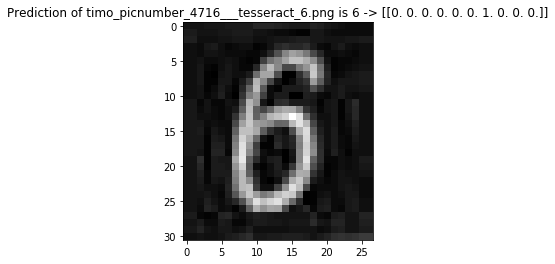

In:  0.002036571502685547


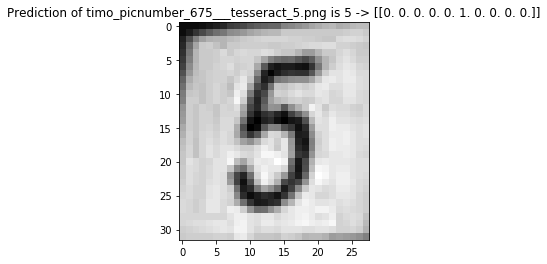

In:  0.002011537551879883


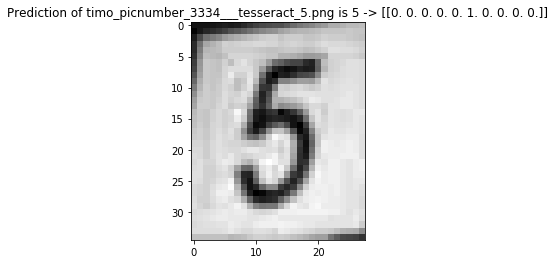

In:  0.0019350051879882812


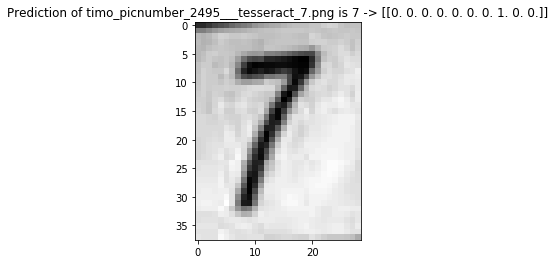

In:  0.0016520023345947266


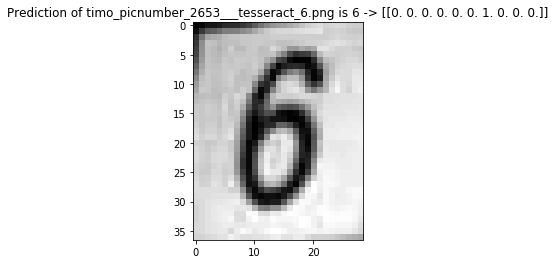

In:  0.001964092254638672


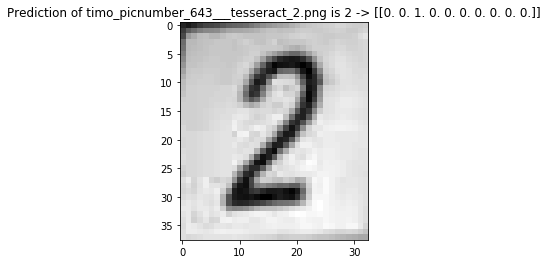

In:  0.00153350830078125


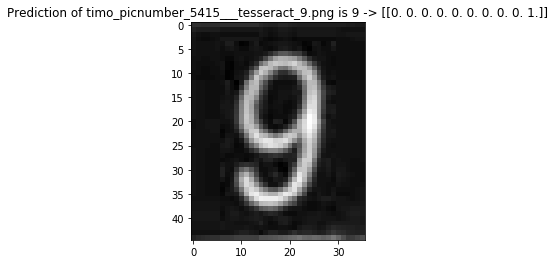

In:  0.0018973350524902344


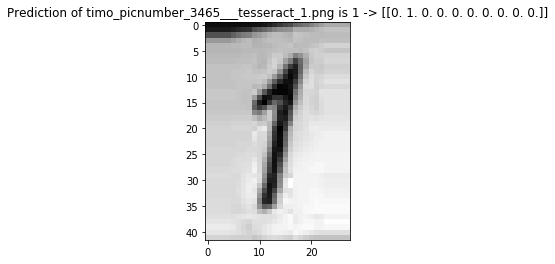

In:  0.0017273426055908203


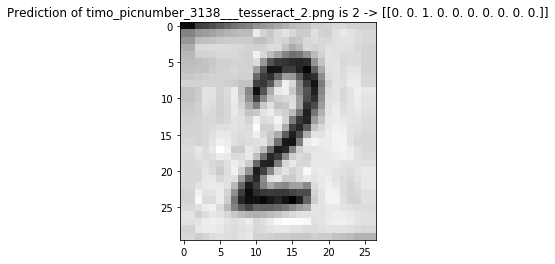

In:  0.0014307498931884766


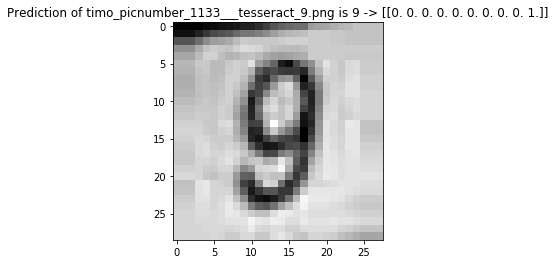

In:  0.001382589340209961


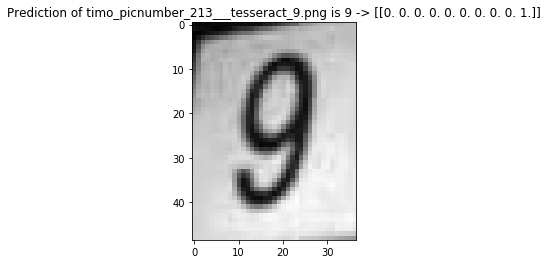

In:  0.0027484893798828125


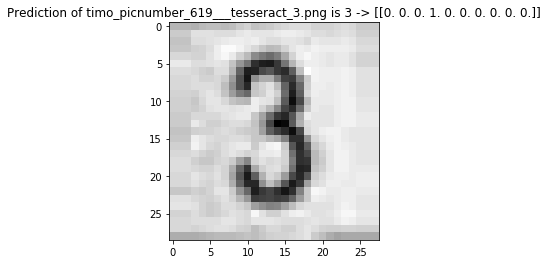

In:  0.007857799530029297


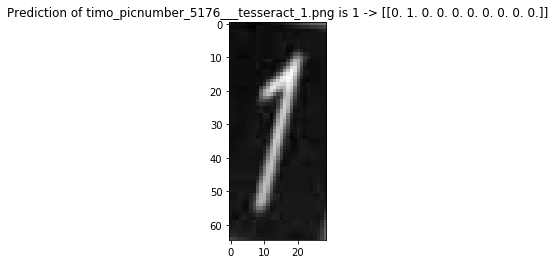

In:  0.002621173858642578


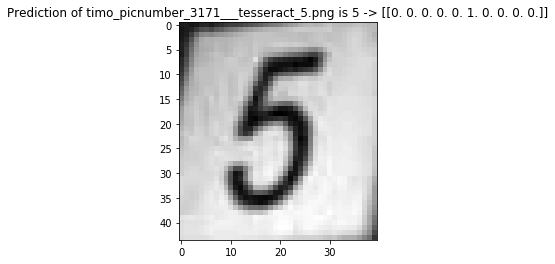

In:  0.0030889511108398438


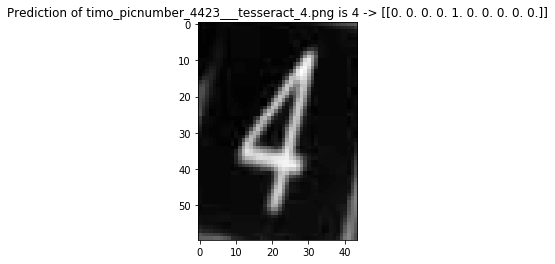

In:  0.0020279884338378906


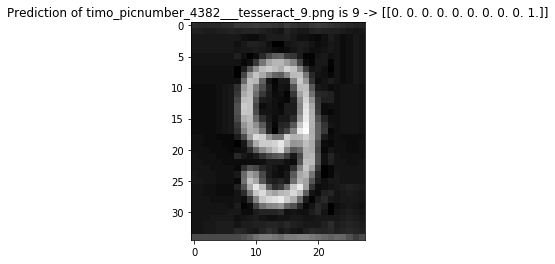

In:  0.003099679946899414


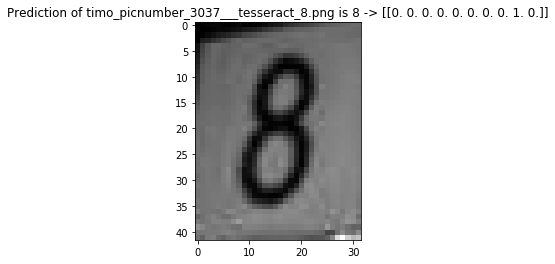

In:  0.0024919509887695312


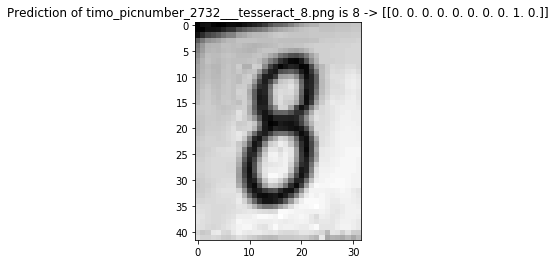

In:  0.0027883052825927734


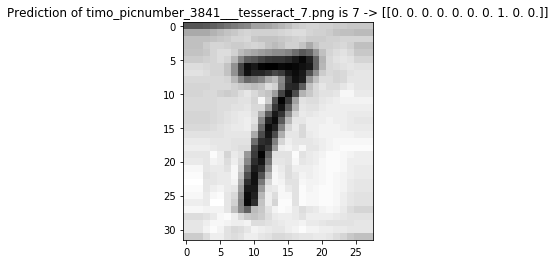

In:  0.0011897087097167969


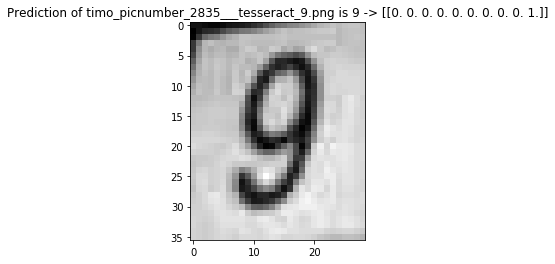

In:  0.0014903545379638672


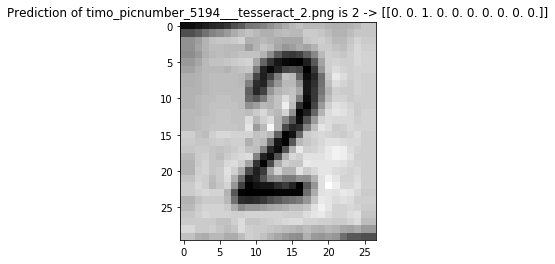

In:  0.002453327178955078


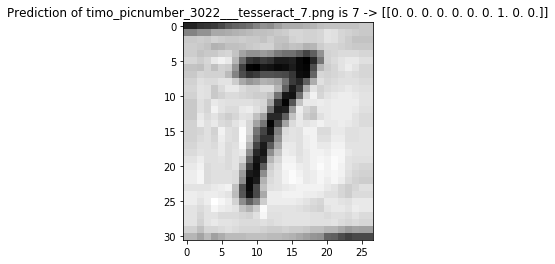

In:  0.0019834041595458984


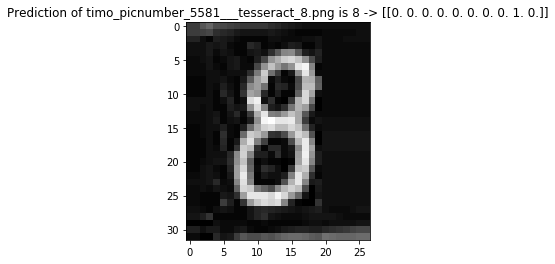

In:  0.0015344619750976562


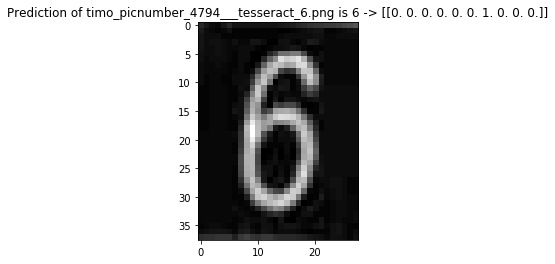

In:  0.0017762184143066406


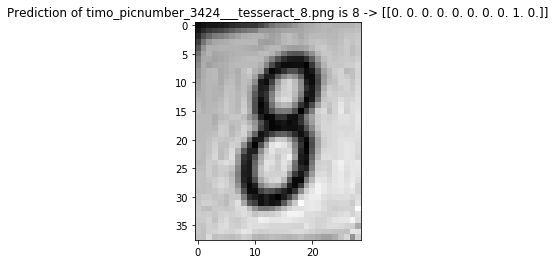

In:  0.005134105682373047


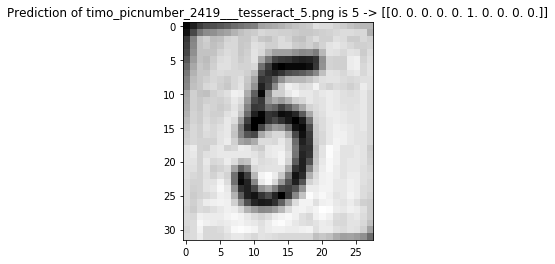

In:  0.002098560333251953


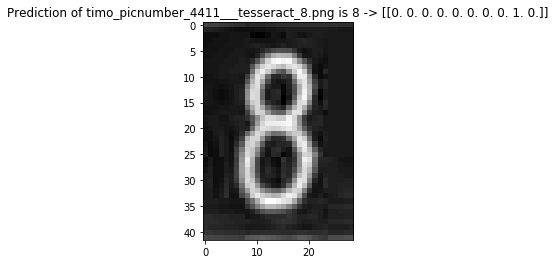

In:  0.0028417110443115234


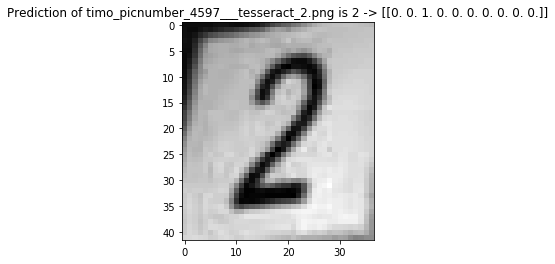

In:  0.0033173561096191406


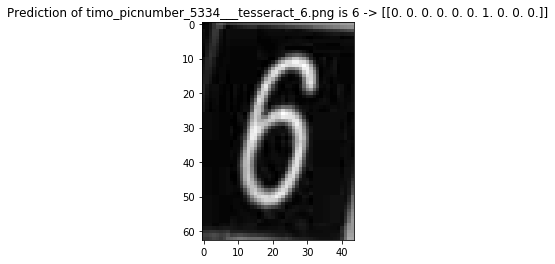

In:  0.0021948814392089844


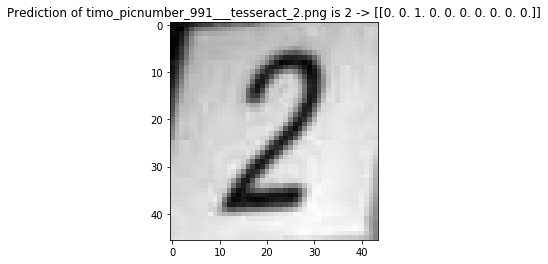

In:  0.001977205276489258


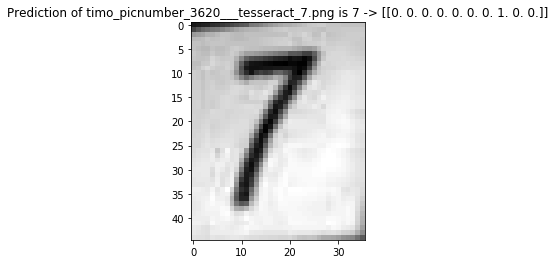

In:  0.0016942024230957031


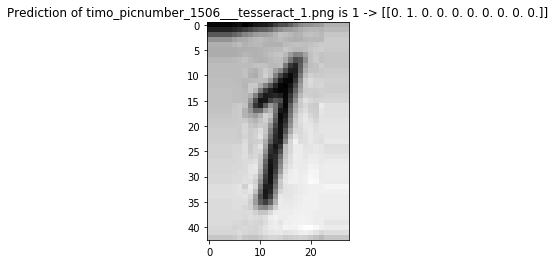

In:  0.001491546630859375


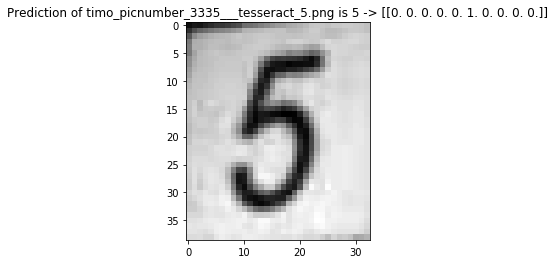

In:  0.0013892650604248047


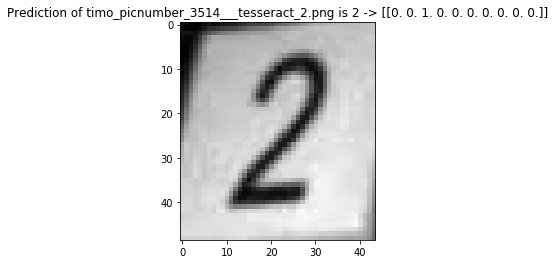

In:  0.011396646499633789


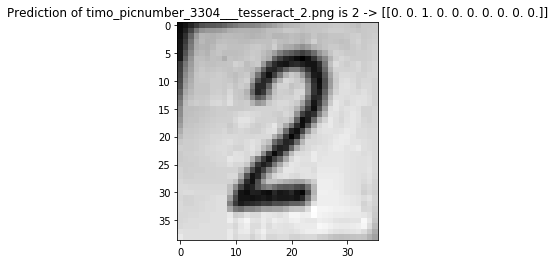

In:  0.002336263656616211


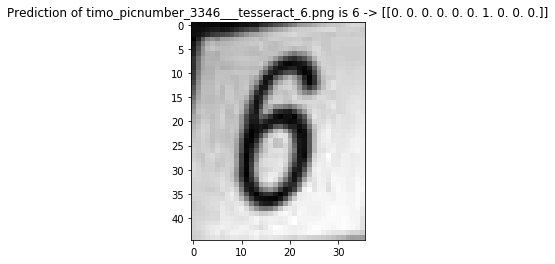

In:  0.004129648208618164


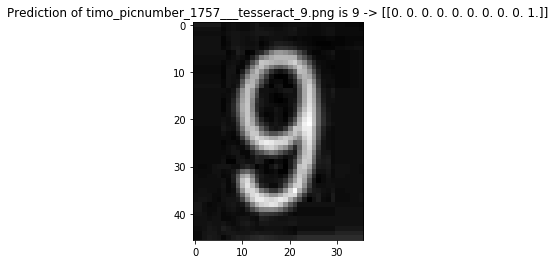

In:  0.0016486644744873047


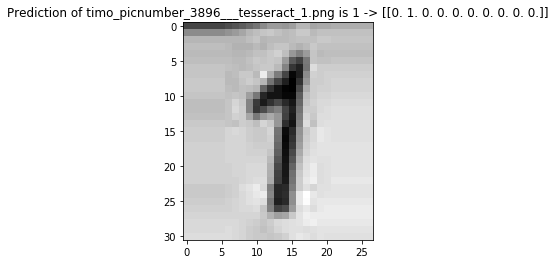

In:  0.00624537467956543


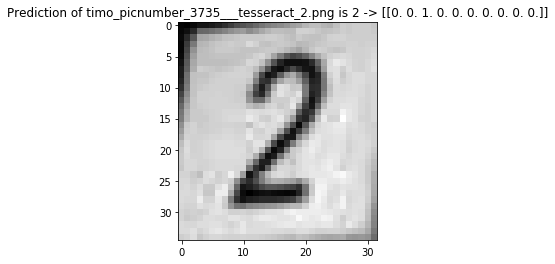

In:  0.003437519073486328


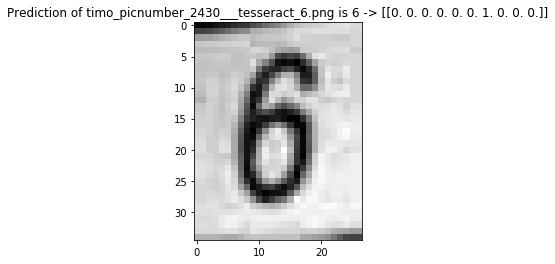

In:  0.003659486770629883


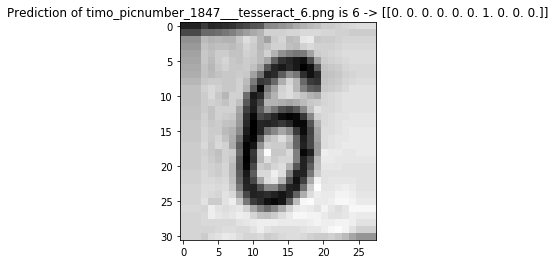

In:  0.0019044876098632812


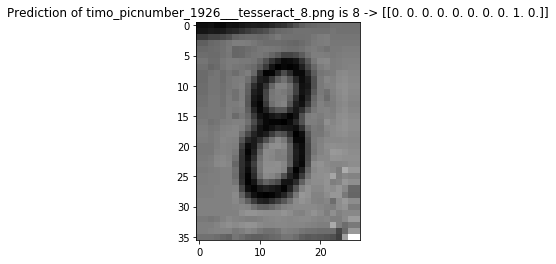

In:  0.0017333030700683594


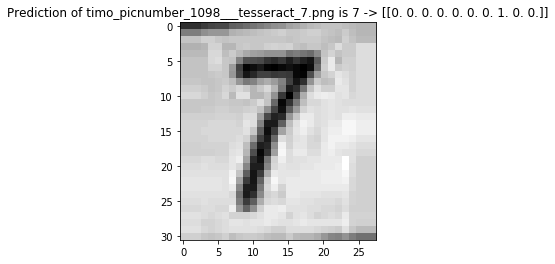

In:  0.0031676292419433594


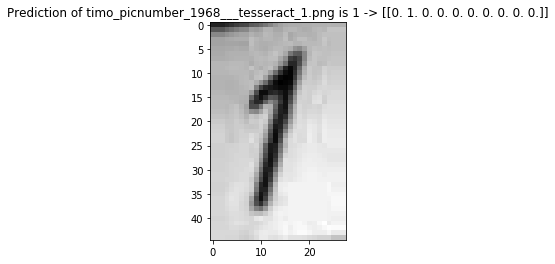

In:  0.0017597675323486328


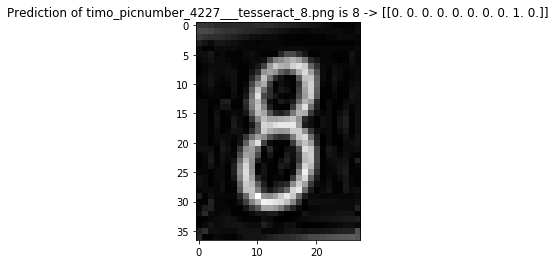

In:  0.006040811538696289


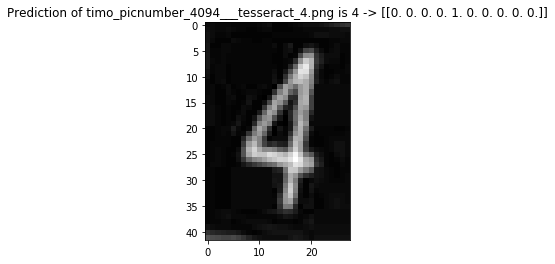

In:  0.001333475112915039


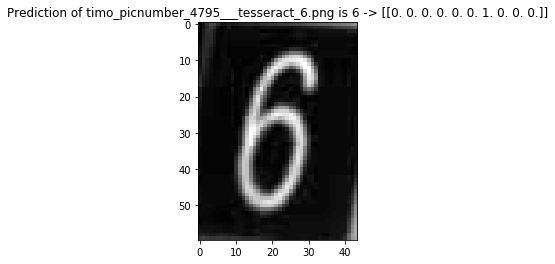

In:  0.0018131732940673828


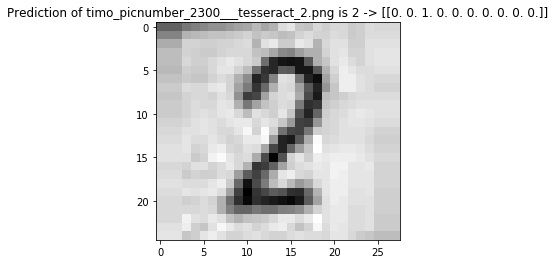

In:  0.0015208721160888672


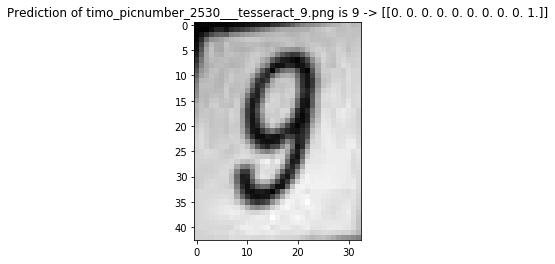

In:  0.0012974739074707031


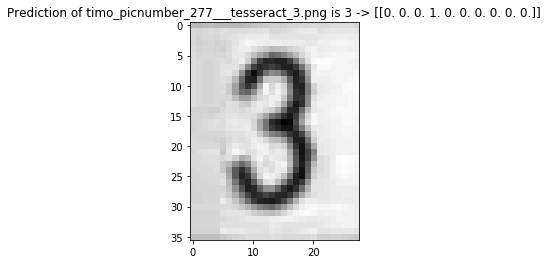

In:  0.009329080581665039


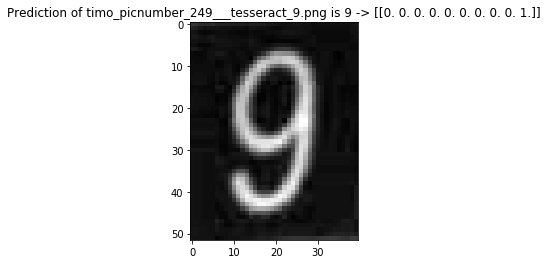

In:  0.004899740219116211


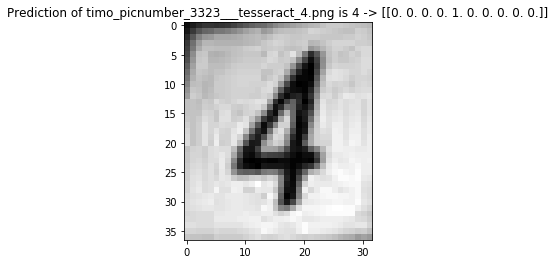

In:  0.0015676021575927734


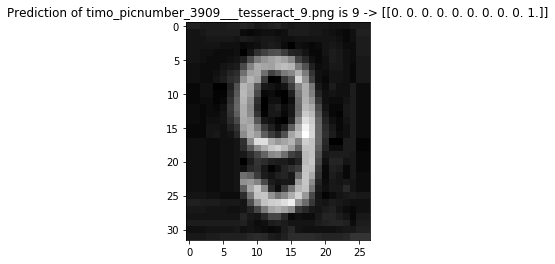

In:  0.0015871524810791016


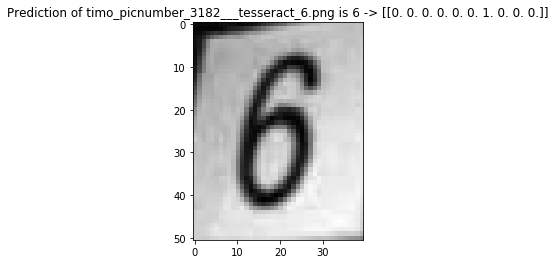

In:  0.007884025573730469


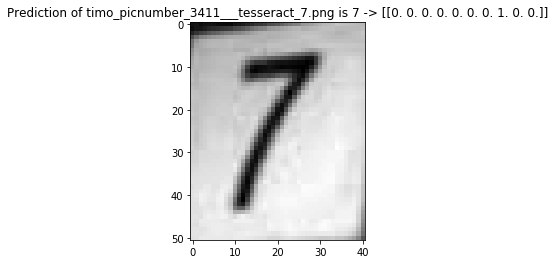

In:  0.0022127628326416016


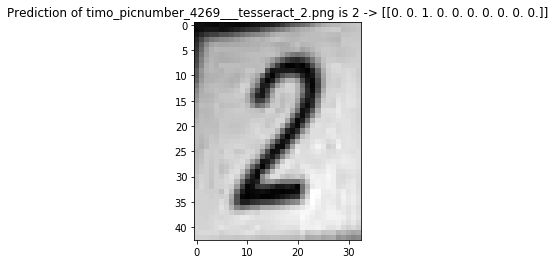

In:  0.0015940666198730469


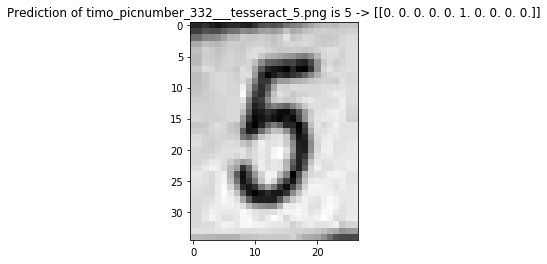

In:  0.001756429672241211


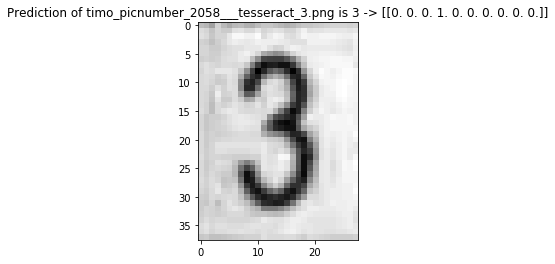

In:  0.0016453266143798828


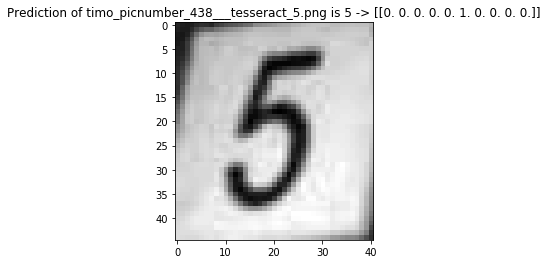

In:  0.0014240741729736328


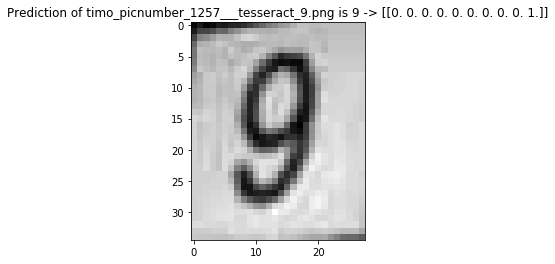

In:  0.0013904571533203125


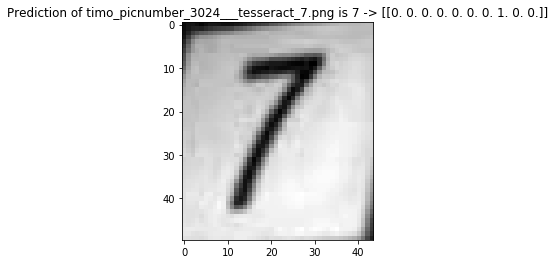

In:  0.0025691986083984375


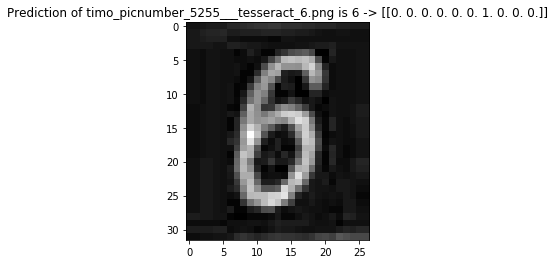

In:  0.0017399787902832031


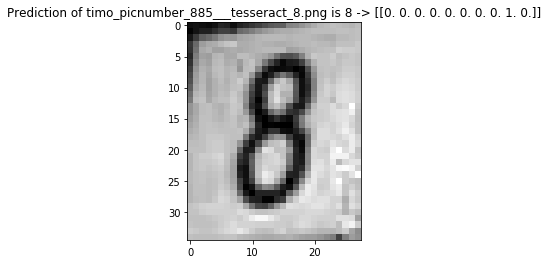

In:  0.0018422603607177734


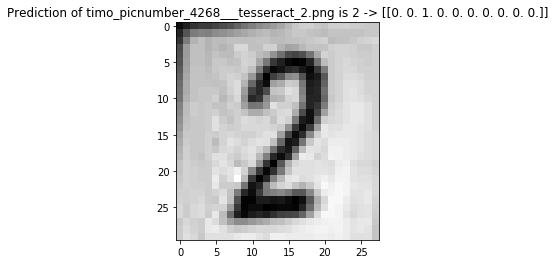

In:  0.0022461414337158203


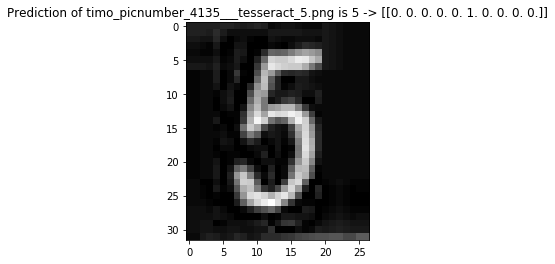

In:  0.0020427703857421875


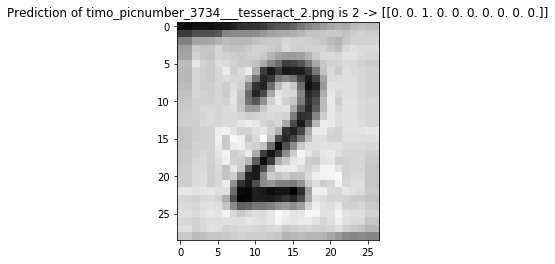

In:  0.001558542251586914


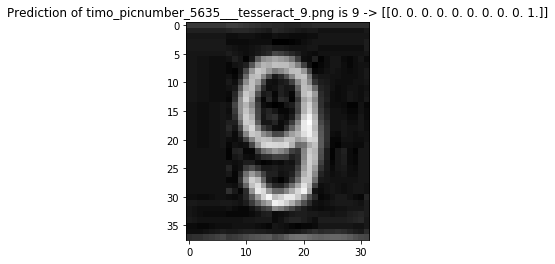

In:  0.0016546249389648438


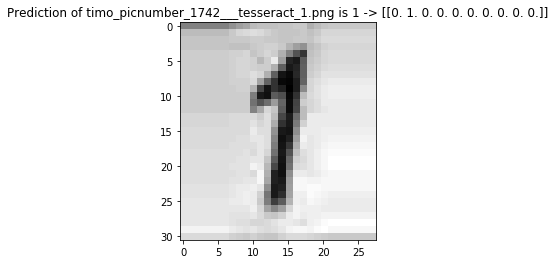

In:  0.0020940303802490234


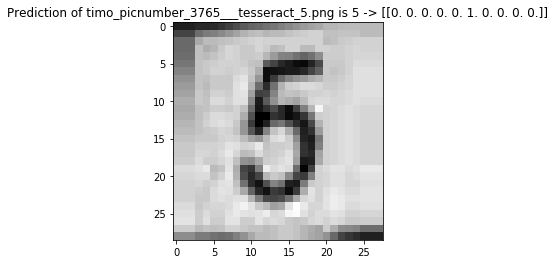

In:  0.00171661376953125


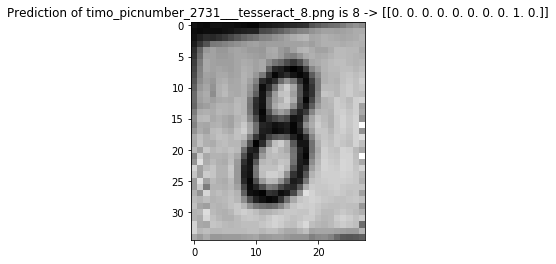

In:  0.002758026123046875


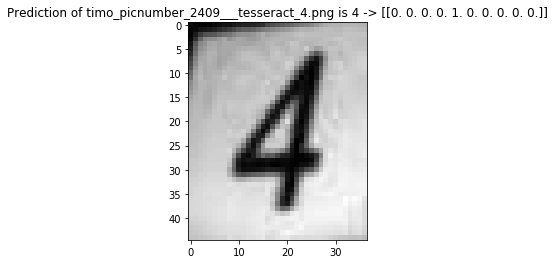

In:  0.006726980209350586


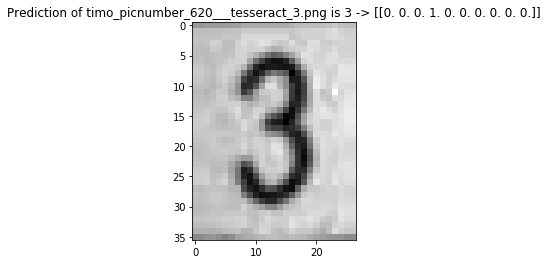

In:  0.0029261112213134766


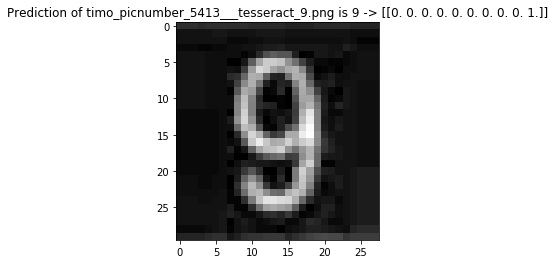

In:  0.003920316696166992


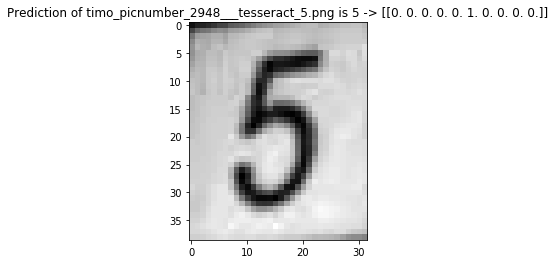

In:  0.006178855895996094


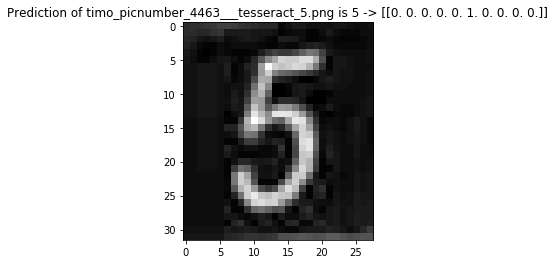

In:  0.0016438961029052734


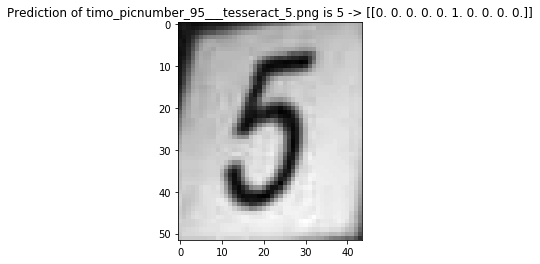

In:  0.0019583702087402344


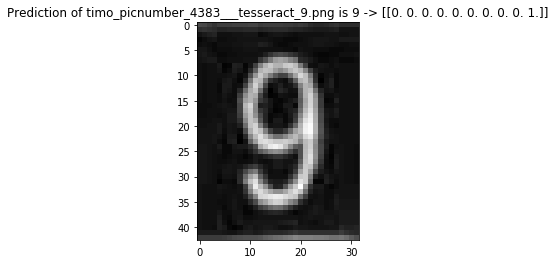

In:  0.0050470829010009766


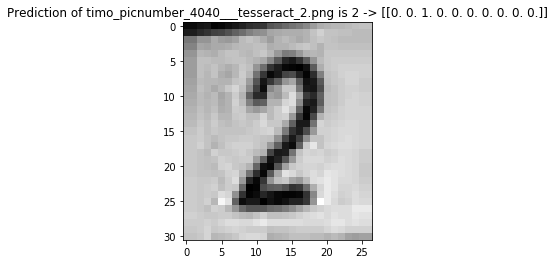

In:  0.002007722854614258


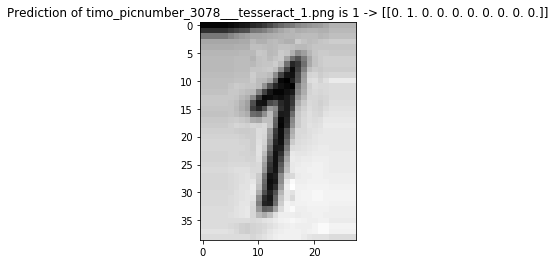

In:  0.0021958351135253906


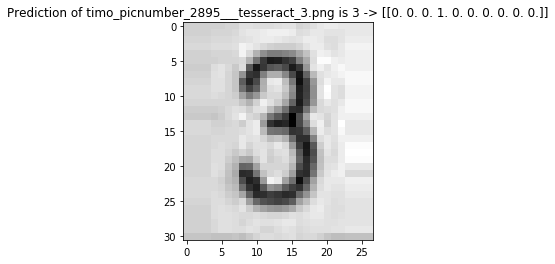

In:  0.001781463623046875


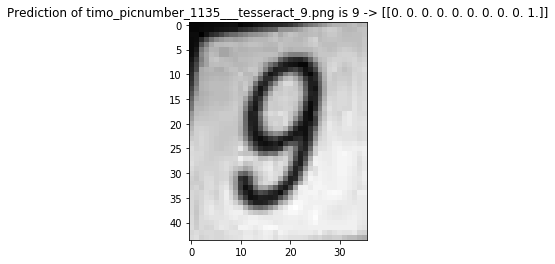

In:  0.0021986961364746094


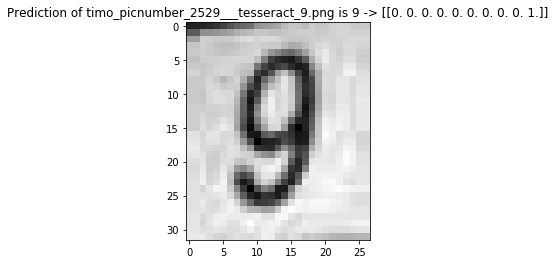

In:  0.0017559528350830078


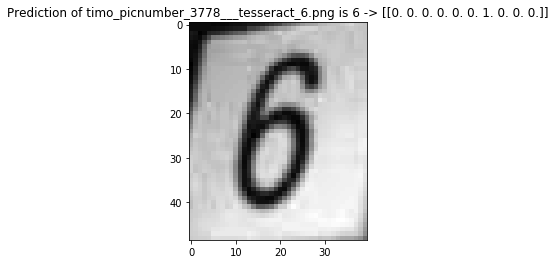

In:  0.0021736621856689453


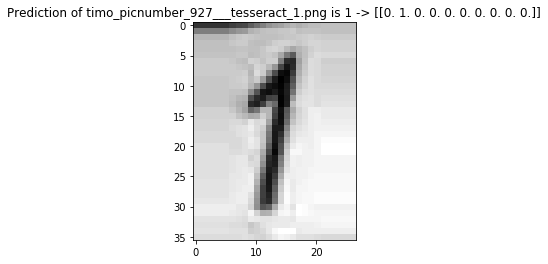

In:  0.0039052963256835938


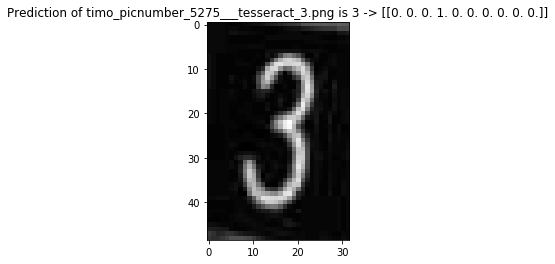

In:  0.0023598670959472656


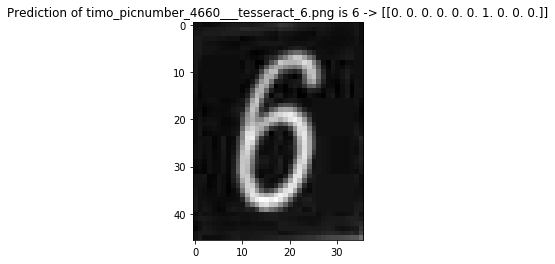

In:  0.0015497207641601562


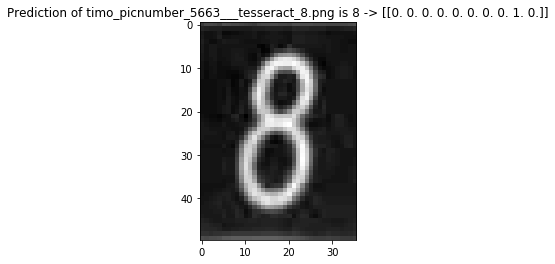

In:  0.0014719963073730469


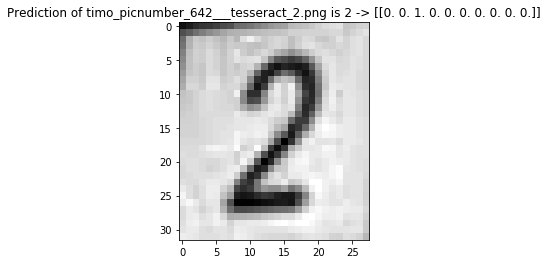

In:  0.0013339519500732422


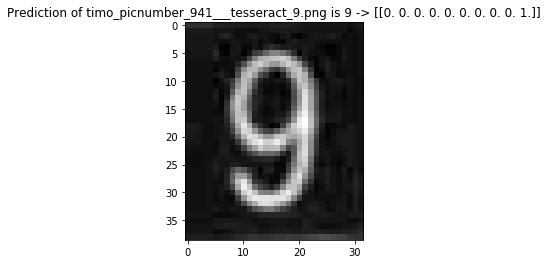

In:  0.004307270050048828


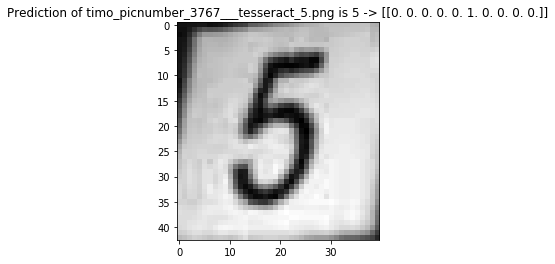

In:  0.003332376480102539


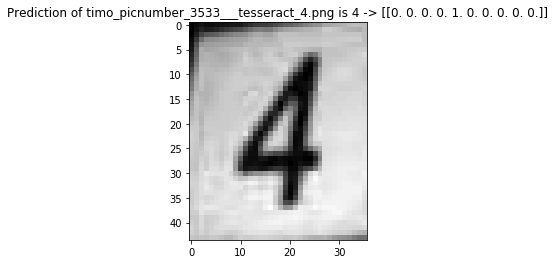

In:  0.004529476165771484


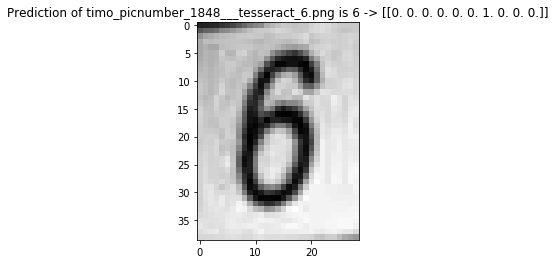

In:  0.0013506412506103516


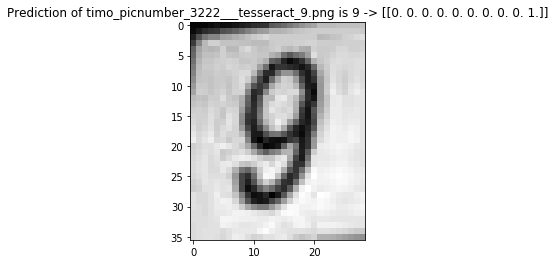

In:  0.002570629119873047


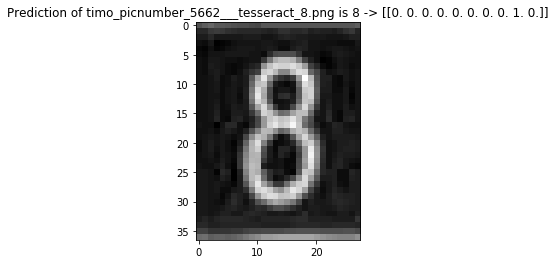

In:  0.002049684524536133


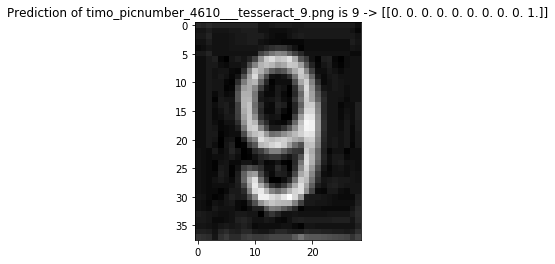

In:  0.0019702911376953125


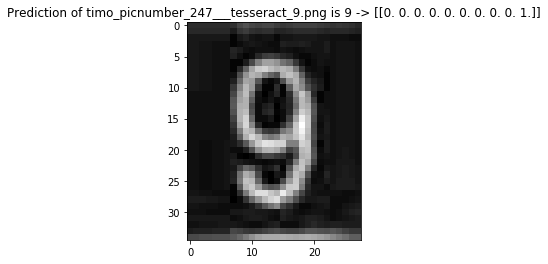

In:  0.002605915069580078


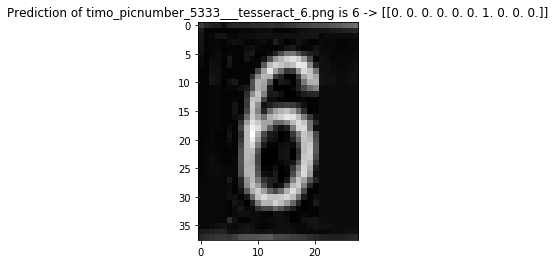

In:  0.0017311573028564453


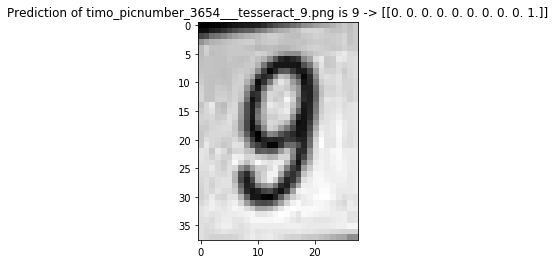

In:  0.0014624595642089844


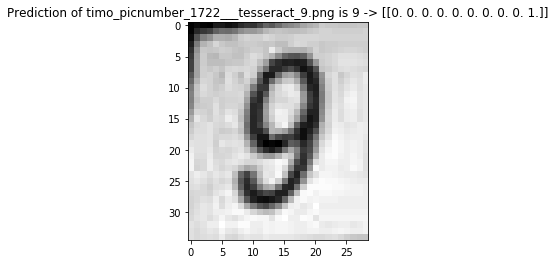

In:  0.002070903778076172


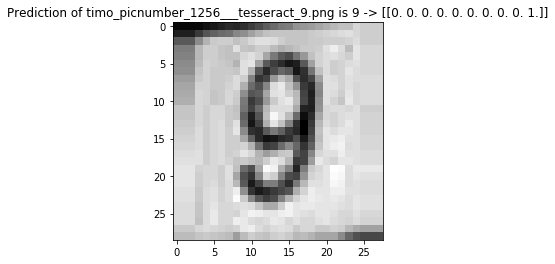

In:  0.0024662017822265625


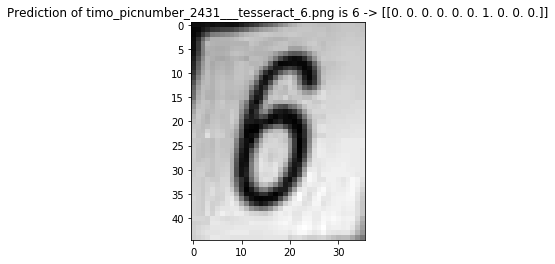

In:  0.0015239715576171875


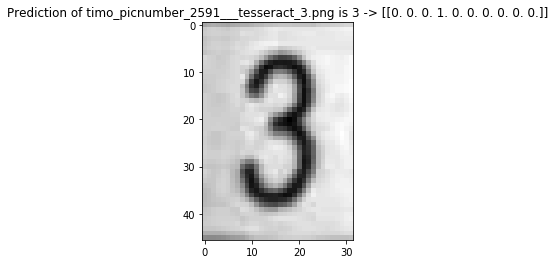

In:  0.0014536380767822266


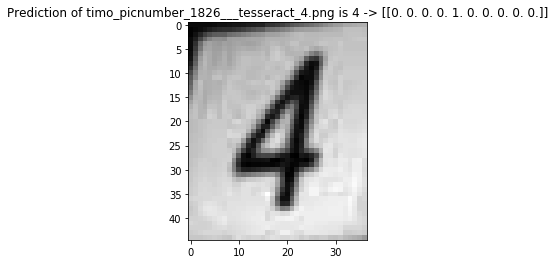

In:  0.0051991939544677734


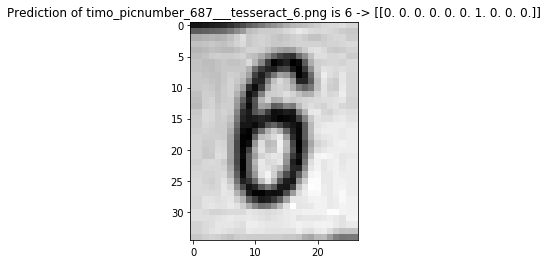

In:  0.002922534942626953


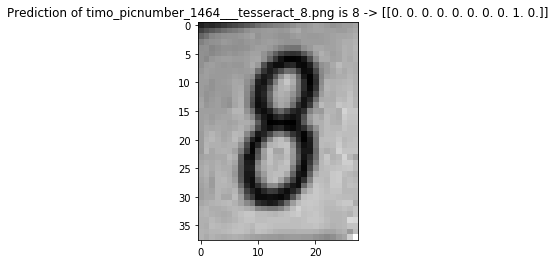

In:  0.0021355152130126953


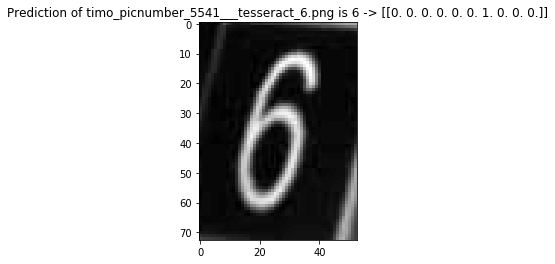

In:  0.0016057491302490234


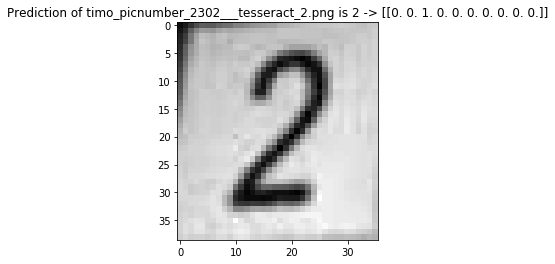

In:  0.0015230178833007812


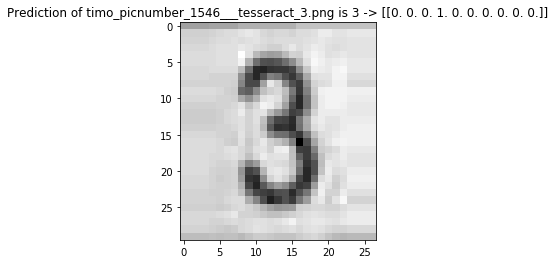

In:  0.001798868179321289


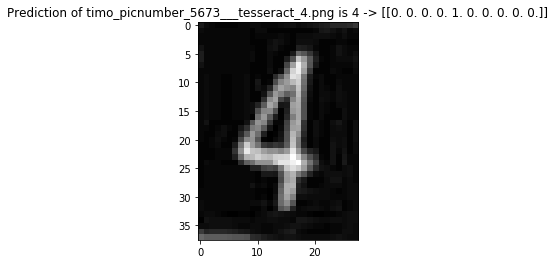

In:  0.0022056102752685547


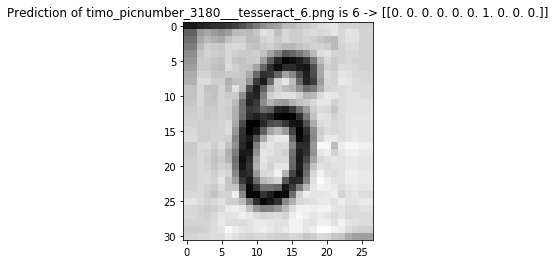

In:  0.0019562244415283203


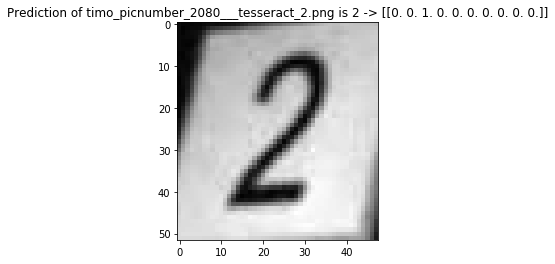

In:  0.001947164535522461


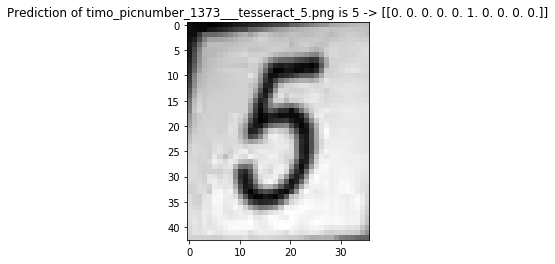

In:  0.0025408267974853516


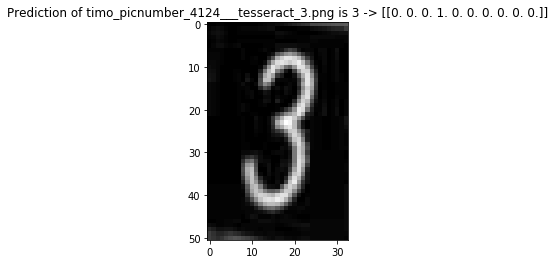

In:  0.0033440589904785156


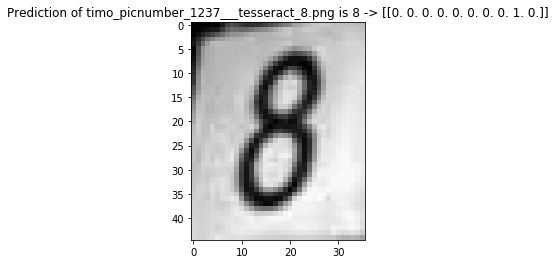

In:  0.0024378299713134766


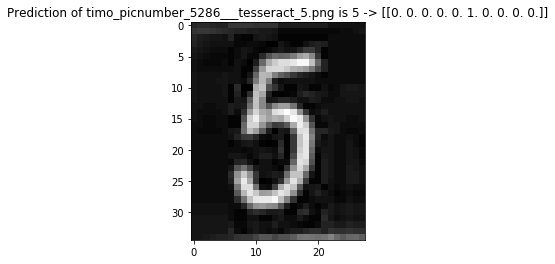

In:  0.0021805763244628906


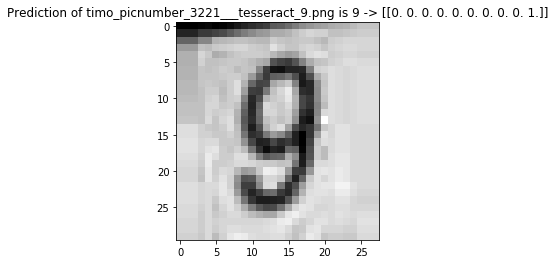

In:  0.005629301071166992


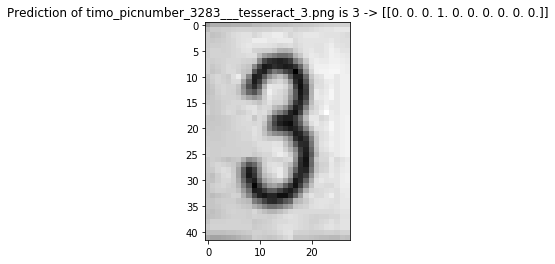

In:  0.00763702392578125


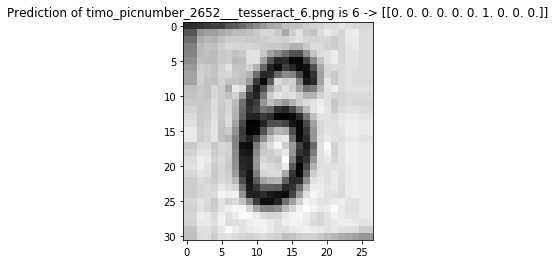

In:  0.002653360366821289


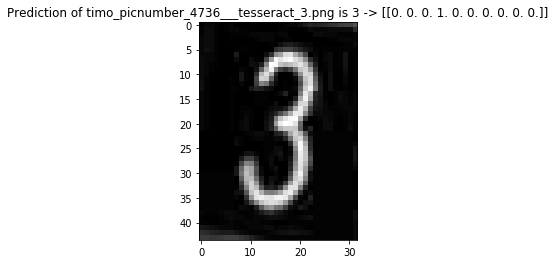

In:  0.0029604434967041016


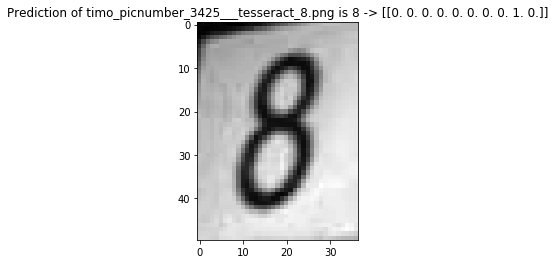

In:  0.004797458648681641


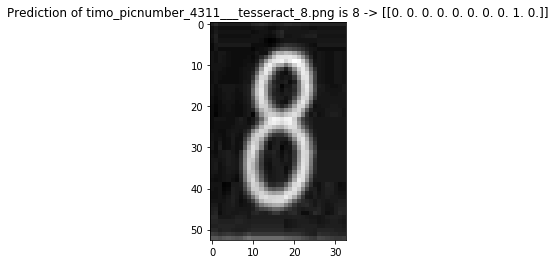

In:  0.003192901611328125


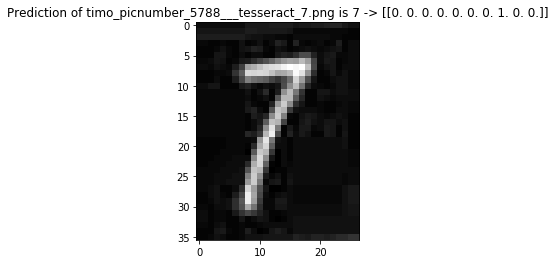

In:  0.002190113067626953


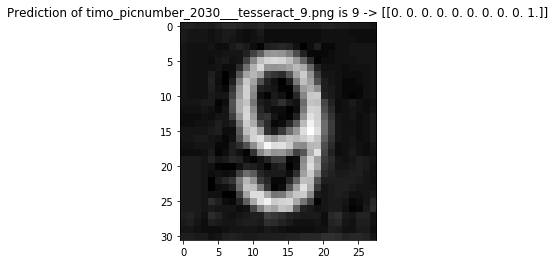

In:  0.0022444725036621094


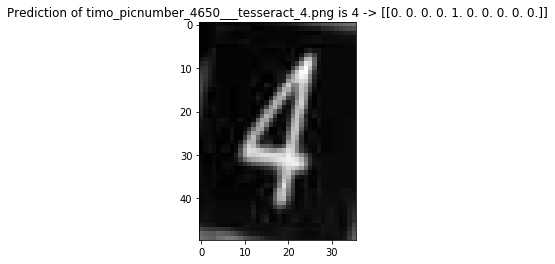

In:  0.002125978469848633


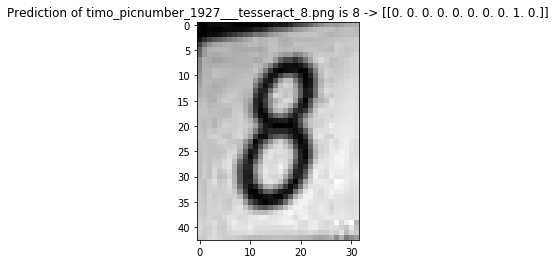

In:  0.0017743110656738281


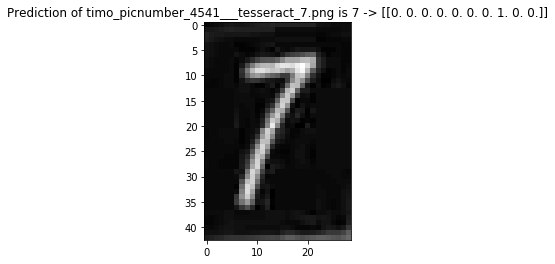

In:  0.0020194053649902344


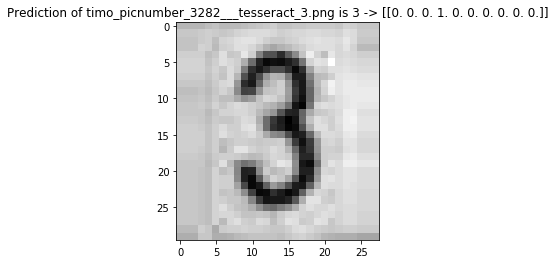

In:  0.0018682479858398438


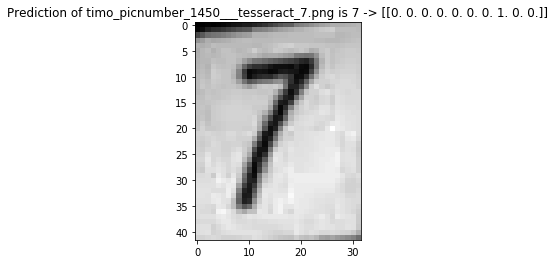

In:  0.002676248550415039


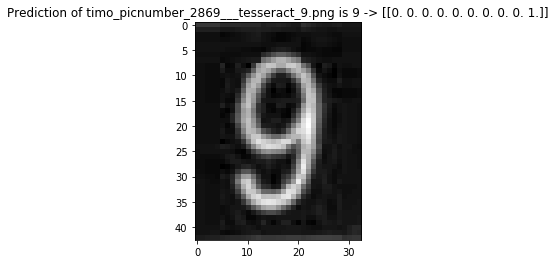

In:  0.0016484260559082031


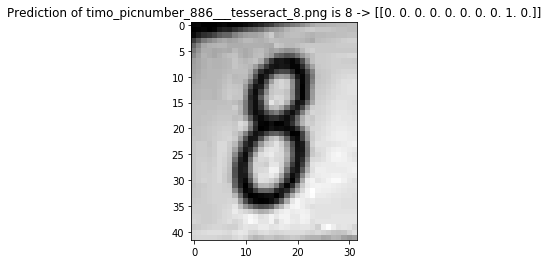

In:  0.0016484260559082031


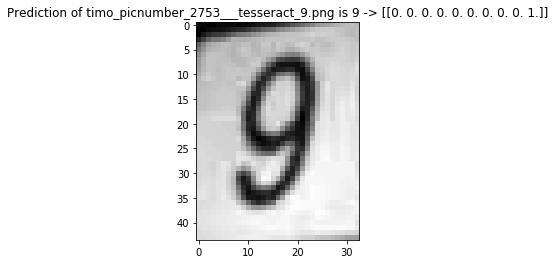

In:  0.0016694068908691406


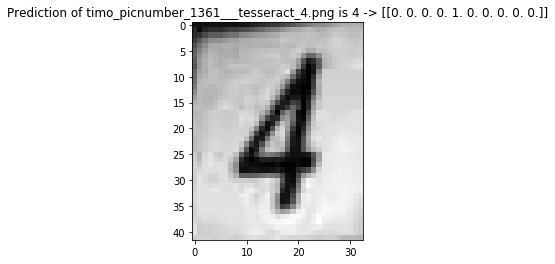

In:  0.002057790756225586


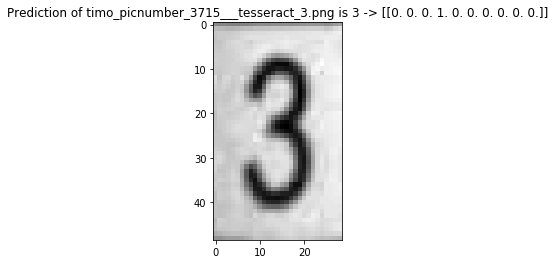

In:  0.004394054412841797


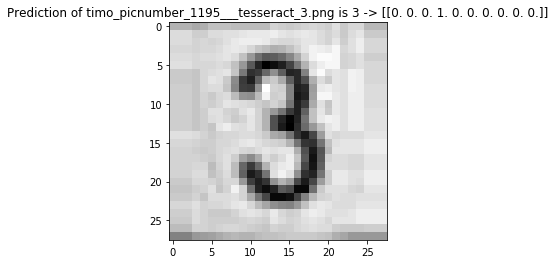

In:  0.0014595985412597656


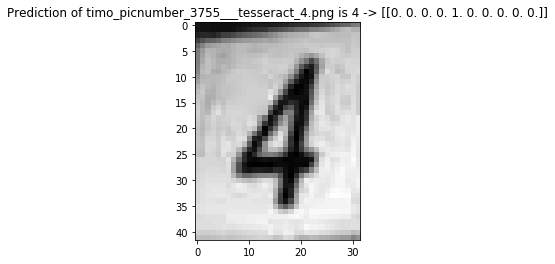

In:  0.0014560222625732422


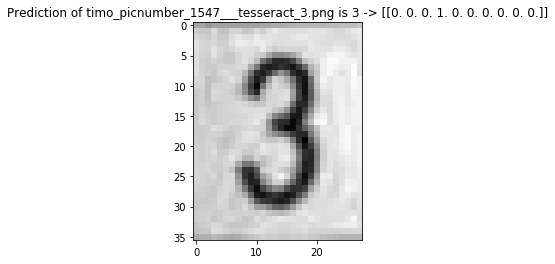

In:  0.0017614364624023438


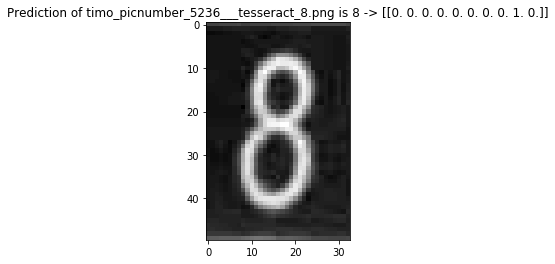

In:  0.0020432472229003906


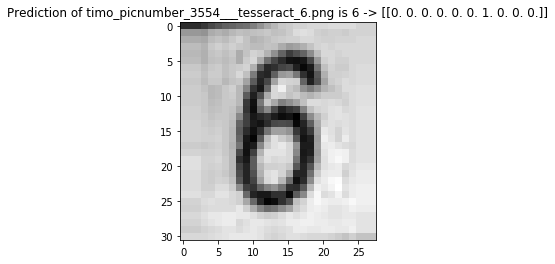

In:  0.0014891624450683594


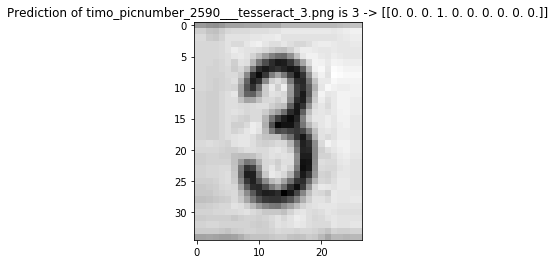

In:  0.0016548633575439453


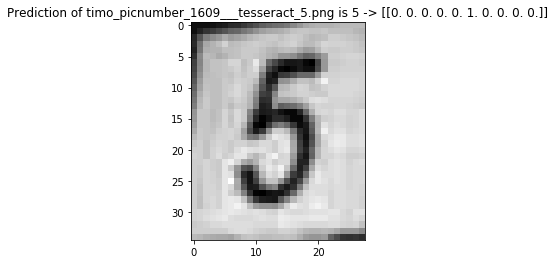

In:  0.0016613006591796875


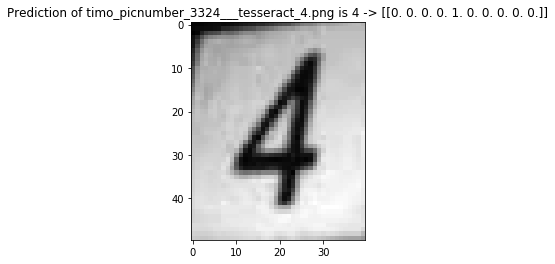

In:  0.0014400482177734375


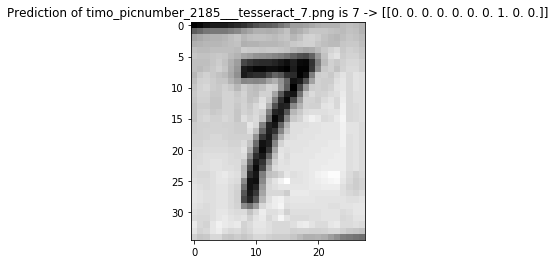

In:  0.0017135143280029297


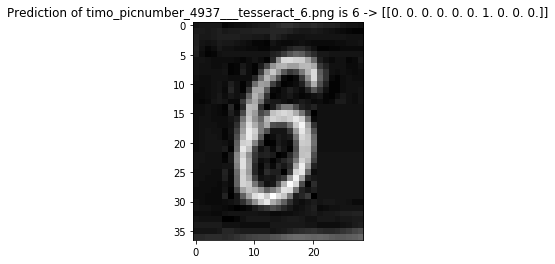

In:  0.0016679763793945312


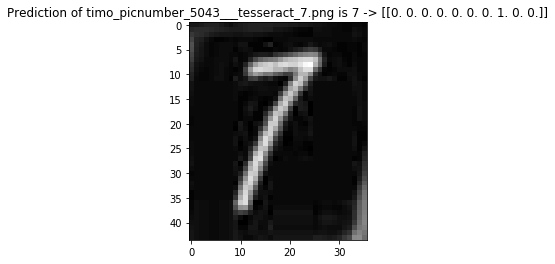

In:  0.0014524459838867188


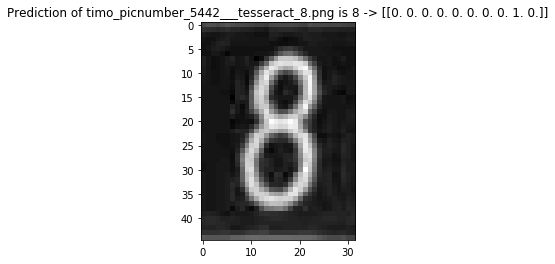

In:  0.004595756530761719


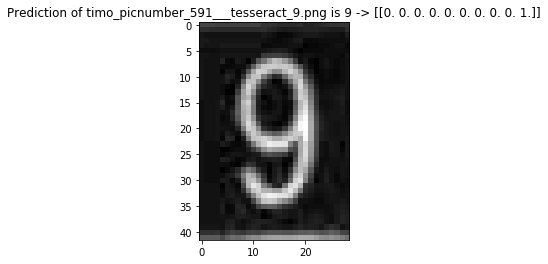

In:  0.003344297409057617


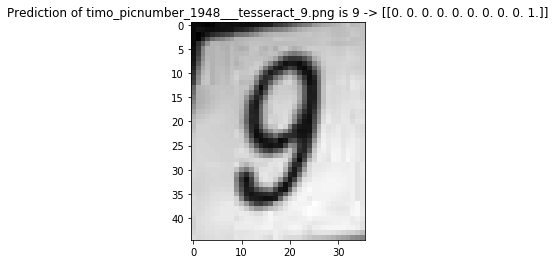

In:  0.003977060317993164


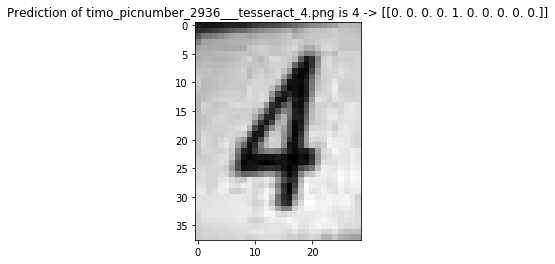

In:  0.003050565719604492


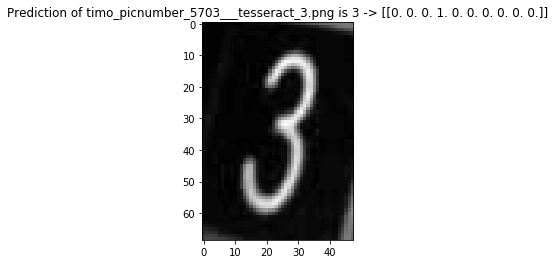

In:  0.0022041797637939453


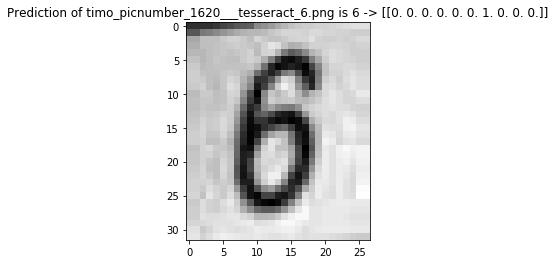

In:  0.0023453235626220703


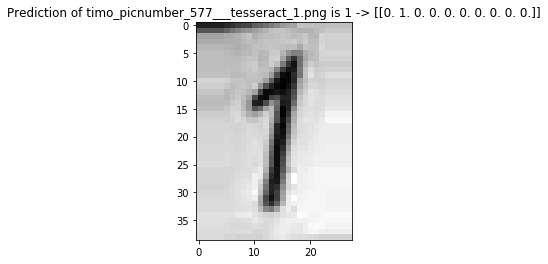

In:  0.001361846923828125


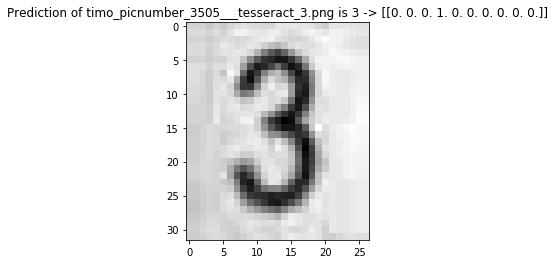

In:  0.00209808349609375


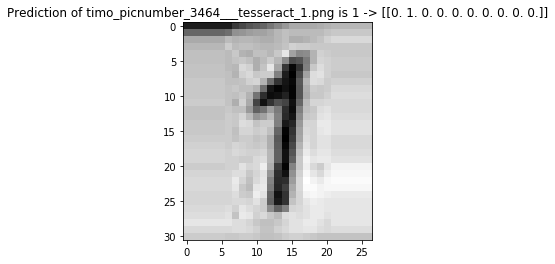

In:  0.003004312515258789


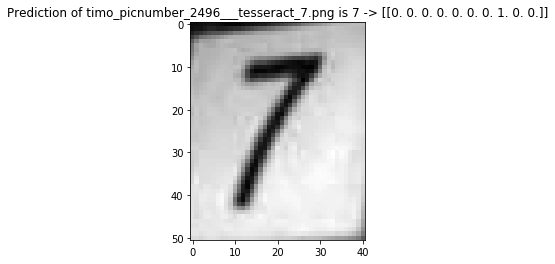

In:  0.0019152164459228516


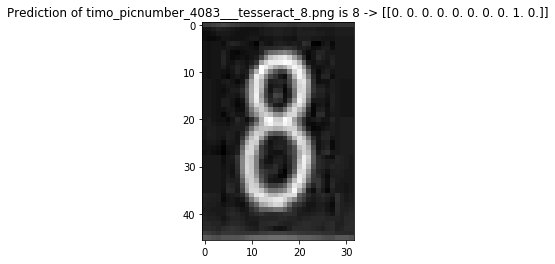

In:  0.0018570423126220703


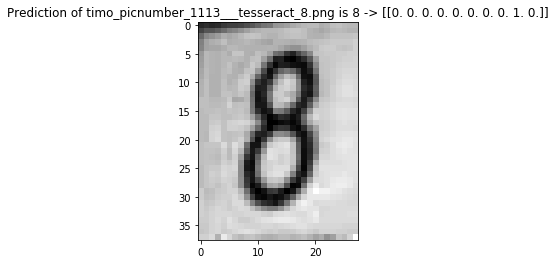

In:  0.0015118122100830078


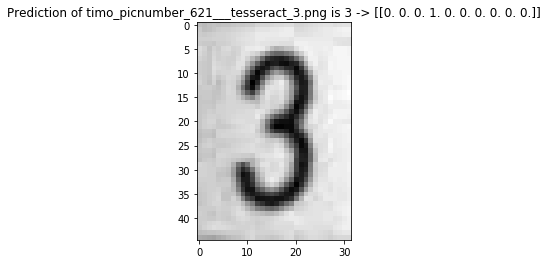

In:  0.0024750232696533203


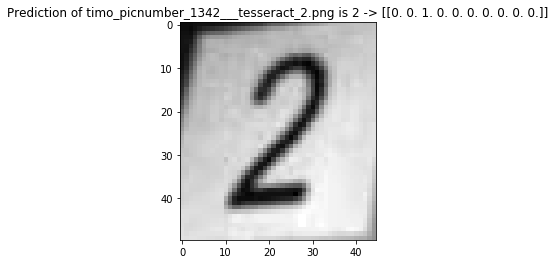

In:  0.0018355846405029297


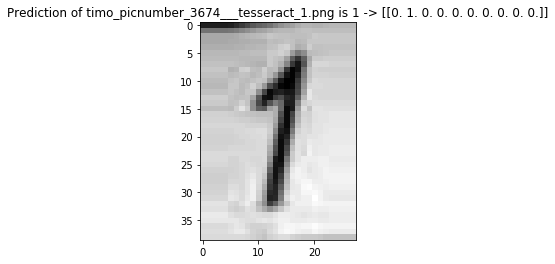

In:  0.0017833709716796875


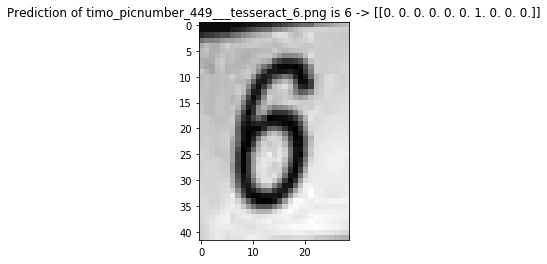

In:  0.0025730133056640625


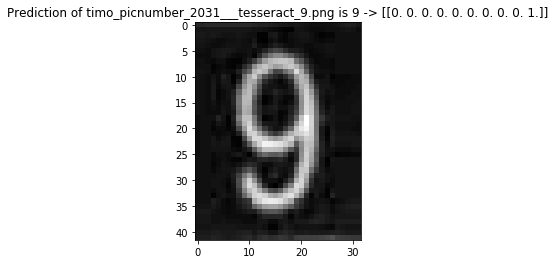

In:  0.0021615028381347656


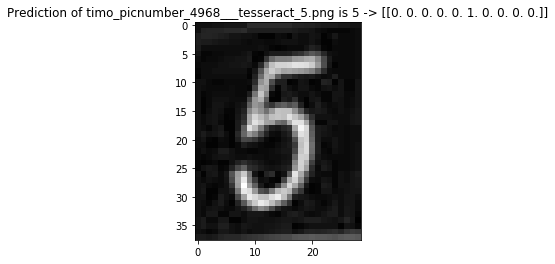

In:  0.0014300346374511719


KeyboardInterrupt: 

In [36]:
for image_path in (ROOT_DIR / "tests" / "resources" / "neu_urs_raw" / "timo").iterdir():
    image = cv2.imread(str(image_path), 0)
    if image.shape[1] < 28:
        image = cv2.copyMakeBorder(image, 0, 0, (28 - image.shape[1]) // 2, (28 - image.shape[1]) // 2, cv2.BORDER_REPLICATE)
    
    vectorized_image = cv2.resize(image, (28, 28)).reshape(1, 28, 28, 1)
    
    starttime = time.time()
    predictions = model.predict(vectorized_image)
    prediction = np.argmax(predictions)
    print("In: ", time.time() - starttime)
    
    plt.title("Prediction of {} is {} -> {}".format(image_path.name, prediction, predictions))
    plt.imshow(image, cmap="gray")
    plt.show()